In [2]:
import pygmo as pg


#using inbuild algorithm for calculating gradient
uda =  pg.nlopt('slsqp')

algo = pg.algorithm(uda)

print(algo)

Algorithm name: NLopt - slsqp: [deterministic]
	Thread safety: basic

Extra info:
	NLopt version: 2.6.1
	Solver: 'slsqp'
	Last optimisation return code: NLOPT_SUCCESS (value = 1, Generic success return value)
	Verbosity: 0
	Individual selection policy: best
	Individual replacement policy: best
	Stopping criteria:
		stopval:  disabled
		ftol_rel: disabled
		ftol_abs: disabled
		xtol_rel: 1e-08
		xtol_abs: disabled
		maxeval:  disabled
		maxtime:  disabled



In [10]:
algo.extract(pg.nlopt).ftol_rel = 1e-8
algo.set_verbosity(1)
pop = pg.population(pg.luksan_vlcek1(dim = 20), size = 1)
pop.problem.c_tol = [1e-8] * pop.problem.get_nc()

pop = algo.evolve(pop)

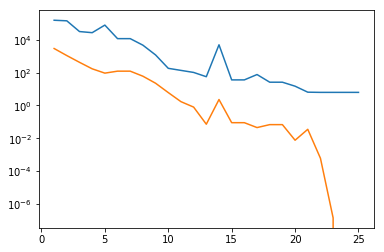

In [25]:
log = algo.extract(pg.nlopt).get_log()

from matplotlib import pyplot as plt

plt.semilogy([line[0] for line in log], [line[1] for line in log], label='obj')
plt.semilogy([line[0] for line in log], [line[3] for line in log], label='con')

plt.show()

In [30]:
#uda
import numpy as np

class udp:
    
    def fitness(self, x):
        return (np.sin(x[0]+x[1]-x[2]), x[0] + np.cos(x[2]*x[1]), x[2])
    def get_bounds(self):
        return ([-1,-1,-1],[1,1,1])
    def get_nec(self):
        return 1
    def get_nic(self):
        return 1
    def gradient(self, x):
        return pg.estimate_gradient_h(lambda x:self.fitness(x), x)
    

pop = pg.population(prob = udp(), size = 1)
pop = algo.evolve(pop)

In [35]:
log = algo.extract(pg.nlopt).get_log()
print(pop.problem.get_fevals())
print(pop.problem.get_gevals())

23
21


In [18]:
import pygmo as pg
import numpy as np
from numba import jit
class rosenbrock:
    def __init__(self, dim):
        self.dim = dim
    
    @jit
    def fitness(self, x):
        reval =np.zeros((1,))
        for i in range(len(x)-1):
            reval[0] += 100.*(x[i + 1]-x[i]**2)**2+(1.-x[i])**2
        return reval
    
    def get_bounds(self):
        return (np.full((self.dim,), -5), np.full((self.dim), 10))
    
    def get_extra_info(self):
        return "\tDimensions: " + str(self.dim)
    
prob = pg.problem(rosenbrock(200))
print(prob)
    

Problem name: <class '__main__.rosenbrock'>
	Global dimension:			200
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-5, -5, -5, -5, -5, ... ]
	Upper bounds: [10, 10, 10, 10, 10, ... ]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none

Extra info:
	Dimensions: 200


In [19]:
algo = pg.algorithm(pg.bee_colony(gen = 20, limit = 20))
pop = pg.population(prob,10)
pop = algo.evolve(pop)
print(pop.champion_f) 

<ipython-input-18-0a0077210573>:8: NumbaWarning: Function "fitness" failed type inference: Internal error at <numba.typeinfer.ArgConstraint object at 0x000001C692ED4B70>:
--%<----------------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\Assessioner\Anaconda3\lib\site-packages\numba\errors.py", line 627, in new_error_context
    yield
  File "C:\Users\Assessioner\Anaconda3\lib\site-packages\numba\typeinfer.py", line 201, in __call__
    assert ty.is_precise()
AssertionError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Assessioner\Anaconda3\lib\site-packages\numba\typeinfer.py", line 144, in propagate
    constraint(typeinfer)
  File "C:\Users\Assessioner\Anaconda3\lib\site-packages\numba\typeinfer.py", line 202, in __call__
    typeinfer.add_type(self.dst, ty, loc=self.loc)
  File "C:\Users\Assessioner\Anaconda3\lib\contextlib.py", line 130, in 

[18507197.23726592]


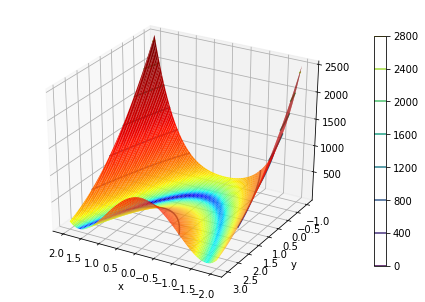

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import cm

import numpy as np

s=0.05
x = np.arange(-2, 2.+s, s)
y = np.arange(-1, 3.+s, s)
X, Y = np.meshgrid(x,y)

z = (1.-X)**2 + 100.*(Y-X*X)**2


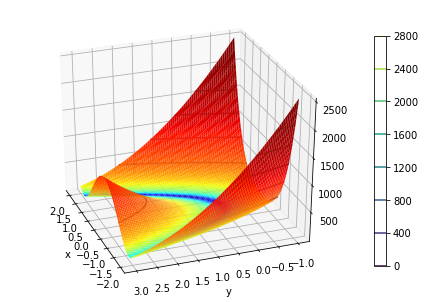

In [16]:
fig = plt.figure()
ax = Axes3D(fig, azim=160, elev=30)
ax.plot_surface(X, Y, z, rstride = 1, cstride = 1, norm = LogNorm(), cmap = cm.jet)
CS = plt.contour(X,Y,z)

plt.clabel(CS,inline=1,fontsize=10)
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('garbage/family_data.csv')
sample = pd.read_csv('garbage/sample_submission.csv')
MAX_CHOICE = 5
data['assigned_day'] = sample['assigned_day']



n = data.iloc[4999]['n_people']

mat = data[['choice_0','choice_1','choice_2','choice_3','choice_4','choice_5','choice_6','choice_7','choice_8','choice_9',]].to_numpy()
print(mat.shape)

(5000, 10)


In [5]:
import pygmo as pg
import pandas as pd

family_size_dict = data[['n_people']].to_dict()['n_people']
cols = [f'choice_{i}' for i in range(10)] 
choice_dict = data[cols].T.to_dict()
N_DAYS = 100
MAX_OCCUPANCY = 300
MIN_OCCUPANCY = 125

days = list(range(N_DAYS,0,-1))

family_size_ls = list(family_size_dict.values())
choice_dict_num = [{vv:i for i,vv in enumerate(di.values())} for di in choice_dict.values()]

penalties_dict = {
    n: [
        0,
        50,
        50 + 9 * n,
        100 + 9 * n,
        200 + 9 * n,
        200 + 18 * n,
        300 + 18 * n,
        300 + 36 * n,
        400 + 36 * n,
        500 + 36 * n + 199 * n,
        500 + 36 * n + 398 * n
    ]
    for n in range(max(family_size_dict.values())+1)
}
d = 0
def cost_function(prediction):
    penalty = 0
    prediction = prediction.astype('int32')
    # We'll use this to count the number of people scheduled each day
    daily_occupancy = {k:0 for k in days}
    #print(len(daily_occupancy))
    ct = 0
    # Looping over each family; d is the day, n is size of that family, 
    # and choice is their top choices
    for n, d, choice in zip(family_size_ls, prediction, choice_dict_num):
        # add the family member count to the daily occupancy
        ct += 1
        #print(type(d))
        #print(ct, d, daily_occupancy[d])
        daily_occupancy[d] += n
        # Calculate the penalty for not getting top preference
        if d not in choice:
            penalty += penalties_dict[n][-1]
        else:
            penalty += penalties_dict[n][choice[d]]

    # for each date, check total occupancy
    #  (using soft constraints instead of hard constraints)
    for v in daily_occupancy.values():
        if (v > MAX_OCCUPANCY) or (v < MIN_OCCUPANCY):
            penalty += 100000000

    # Calculate the accounting cost
    # The first day (day 100) is treated special
    accounting_cost = (daily_occupancy[days[0]]-125.0) / 400.0 * daily_occupancy[days[0]]**(0.5)
    # using the max function because the soft constraints might allow occupancy to dip below 125
    accounting_cost = max(0, accounting_cost)
    
    # Loop over the rest of the days, keeping track of previous count
    yesterday_count = daily_occupancy[days[0]]
    for day in days[1:]:
        today_count = daily_occupancy[day]
        diff = abs(today_count - yesterday_count)
        accounting_cost += max(0, (daily_occupancy[day]-125.0) / 400.0 * daily_occupancy[day]**(0.5 + diff / 50.0))
        yesterday_count = today_count

    penalty += accounting_cost

    return penalty


In [6]:
import random as rnd
import time

class prob:
    def __init__(self, dim):
        self.dim = dim
    
    def fitness(self, assigned_days_list):
        #print(type(assigned_days_list[0]))
        #assigned_days_list = assigned_days_list.astype('int32')
        return [cost_function(assigned_days_list)]
    
    def get_bounds(self):
        return ([1]*self.dim, [100]*self.dim)
        
    def get_nix(self):
        return self.dim
    
pro=pg.problem(prob(5000))


In [7]:
#this code is broke see the one in (audio recognizer and ga also)


algo = pg.algorithm(pg.de(gen=3))
#best = pd.read_csv('garbage/bestscore7.csv')['assigned_day']
pop = pg.population(pro, 100)
pop = algo.evolve(pop)
#pop.push_back(best)
#archi = pg.archipelago(n = 32, algo=algo, prob=pro, pop_size=100,r_pol=pg.fair_replace(rate=10))
#start = time.time()
#archi.evolve()
#archi.wait()
#end = time.time()
#print(end-start)
#print(archi.get_champions_f())

In [8]:
print(type(pop.champion_x[0]))
print(pop.champion_f)

<class 'numpy.float64'>
[10731752.7308186]


In [5]:
def save_pop(archi):
    import pandas as pd

    x = archi.get_champions_x()
    i = 0
    for n in x:
        pd.DataFrame(n).to_csv('garbage/pop'+str(i)+'.csv')
        i=i+1

In [4]:
import pandas as pd
import random as rnd
import numpy as np

mutate = 0.1
pop = []
#load population
ind = (pd.read_csv('garbage/bestscore7.csv')).to_numpy()
ind = ind[:,1]
print(ind)
ind = ind.astype('float64')
pop.append(ind)
temp = ind
print(type(temp[0]))
for i in range(99):
    temp = ind
    prob = rnd.random()
    inde = rnd.randint(1,100)
    temp[inde] = temp[inde] + rnd.randint(-8,8)
    if prob < mutate:
        inde = rnd.randint(1,100)
        te = temp[inde]
        newone = rnd.randint(1,100)
        temp[inde] = newone
        print('at inded ' + str(ind) + ' is changed to ' + str(newone))
    pop.append(temp)
pop = np.array(pop).astype('float64')
print(type(pop))
print(type(pop[0][0]))

[64  5 27 ... 27 92 25]
<class 'numpy.float64'>
at inded [64.  5. 27. ... 27. 92. 25.] is changed to 9
at inded [64.  5. 27. ... 27. 92. 25.] is changed to 67
at inded [64.  5. 27. ... 27. 92. 25.] is changed to 44
at inded [64.  5. 27. ... 27. 92. 25.] is changed to 12
at inded [64.  5. 27. ... 27. 92. 25.] is changed to 12
at inded [64.  5. 27. ... 27. 92. 25.] is changed to 97
at inded [64.  5. 30. ... 27. 92. 25.] is changed to 59
at inded [64.  5. 30. ... 27. 92. 25.] is changed to 15
at inded [64.  5. 30. ... 27. 92. 25.] is changed to 17
at inded [64.  5. 30. ... 27. 92. 25.] is changed to 65
<class 'numpy.ndarray'>
<class 'numpy.float64'>


In [4]:
import pygmo as pg

ch = pd.read_csv('garbage/bestscore7.csv')

cpop = pg.population(prob = pro, size=100)
print(type(ch))
#cpop.set_x(0,ch)
print(cpop)
#i = 0
#for chro in pop:
    #print(i)
    #print(cost_function(chro))
    #i=i+1
print(cpop)
print(cpop.champion_f)

<class 'numpy.float64'>
1 58.0 0
<class 'numpy.float64'>
2 68.0 0
<class 'numpy.float64'>
3 82.0 0
<class 'numpy.float64'>
4 94.0 0
<class 'numpy.float64'>
5 58.0 4
<class 'numpy.float64'>
6 34.0 0
<class 'numpy.float64'>
7 57.0 0
<class 'numpy.float64'>
8 90.0 0
<class 'numpy.float64'>
9 84.0 0
<class 'numpy.float64'>
10 43.0 0
<class 'numpy.float64'>
11 71.0 0
<class 'numpy.float64'>
12 70.0 0
<class 'numpy.float64'>
13 72.0 0
<class 'numpy.float64'>
14 82.0 3
<class 'numpy.float64'>
15 47.0 0
<class 'numpy.float64'>
16 60.0 0
<class 'numpy.float64'>
17 24.0 0
<class 'numpy.float64'>
18 86.0 0
<class 'numpy.float64'>
19 60.0 2
<class 'numpy.float64'>
20 43.0 7
<class 'numpy.float64'>
21 25.0 0
<class 'numpy.float64'>
22 53.0 0
<class 'numpy.float64'>
23 38.0 0
<class 'numpy.float64'>
24 69.0 0
<class 'numpy.float64'>
25 2.0 0
<class 'numpy.float64'>
26 24.0 3
<class 'numpy.float64'>
27 88.0 0
<class 'numpy.float64'>
28 8.0 0
<class 'numpy.float64'>
29 41.0 0
<class 'numpy.float64'>
3

333 40.0 25
<class 'numpy.float64'>
334 68.0 17
<class 'numpy.float64'>
335 27.0 17
<class 'numpy.float64'>
336 80.0 12
<class 'numpy.float64'>
337 15.0 12
<class 'numpy.float64'>
338 70.0 22
<class 'numpy.float64'>
339 23.0 12
<class 'numpy.float64'>
340 22.0 19
<class 'numpy.float64'>
341 17.0 18
<class 'numpy.float64'>
342 13.0 9
<class 'numpy.float64'>
343 9.0 18
<class 'numpy.float64'>
344 55.0 8
<class 'numpy.float64'>
345 43.0 36
<class 'numpy.float64'>
346 94.0 11
<class 'numpy.float64'>
347 63.0 16
<class 'numpy.float64'>
348 81.0 13
<class 'numpy.float64'>
349 22.0 25
<class 'numpy.float64'>
350 7.0 5
<class 'numpy.float64'>
351 6.0 8
<class 'numpy.float64'>
352 51.0 22
<class 'numpy.float64'>
353 34.0 20
<class 'numpy.float64'>
354 1.0 16
<class 'numpy.float64'>
355 82.0 11
<class 'numpy.float64'>
356 55.0 11
<class 'numpy.float64'>
357 22.0 30
<class 'numpy.float64'>
358 61.0 13
<class 'numpy.float64'>
359 39.0 18
<class 'numpy.float64'>
360 98.0 21
<class 'numpy.float64'>


<class 'numpy.float64'>
712 64.0 14
<class 'numpy.float64'>
713 3.0 31
<class 'numpy.float64'>
714 87.0 33
<class 'numpy.float64'>
715 5.0 31
<class 'numpy.float64'>
716 49.0 34
<class 'numpy.float64'>
717 4.0 18
<class 'numpy.float64'>
718 20.0 28
<class 'numpy.float64'>
719 54.0 12
<class 'numpy.float64'>
720 45.0 30
<class 'numpy.float64'>
721 8.0 23
<class 'numpy.float64'>
722 69.0 44
<class 'numpy.float64'>
723 41.0 43
<class 'numpy.float64'>
724 10.0 25
<class 'numpy.float64'>
725 77.0 15
<class 'numpy.float64'>
726 66.0 29
<class 'numpy.float64'>
727 76.0 21
<class 'numpy.float64'>
728 68.0 34
<class 'numpy.float64'>
729 30.0 19
<class 'numpy.float64'>
730 62.0 31
<class 'numpy.float64'>
731 44.0 33
<class 'numpy.float64'>
732 77.0 20
<class 'numpy.float64'>
733 50.0 17
<class 'numpy.float64'>
734 18.0 39
<class 'numpy.float64'>
735 28.0 30
<class 'numpy.float64'>
736 92.0 9
<class 'numpy.float64'>
737 92.0 13
<class 'numpy.float64'>
738 88.0 44
<class 'numpy.float64'>
739 66.0 

978 32.0 59
<class 'numpy.float64'>
979 86.0 48
<class 'numpy.float64'>
980 45.0 39
<class 'numpy.float64'>
981 60.0 43
<class 'numpy.float64'>
982 26.0 41
<class 'numpy.float64'>
983 99.0 50
<class 'numpy.float64'>
984 22.0 93
<class 'numpy.float64'>
985 33.0 37
<class 'numpy.float64'>
986 43.0 79
<class 'numpy.float64'>
987 50.0 33
<class 'numpy.float64'>
988 87.0 52
<class 'numpy.float64'>
989 64.0 28
<class 'numpy.float64'>
990 37.0 16
<class 'numpy.float64'>
991 35.0 35
<class 'numpy.float64'>
992 76.0 28
<class 'numpy.float64'>
993 52.0 20
<class 'numpy.float64'>
994 32.0 62
<class 'numpy.float64'>
995 8.0 32
<class 'numpy.float64'>
996 46.0 58
<class 'numpy.float64'>
997 62.0 44
<class 'numpy.float64'>
998 86.0 52
<class 'numpy.float64'>
999 36.0 24
<class 'numpy.float64'>
1000 38.0 31
<class 'numpy.float64'>
1001 16.0 30
<class 'numpy.float64'>
1002 42.0 61
<class 'numpy.float64'>
1003 24.0 52
<class 'numpy.float64'>
1004 9.0 36
<class 'numpy.float64'>
1005 88.0 49
<class 'nump

1210 56.0 43
<class 'numpy.float64'>
1211 15.0 55
<class 'numpy.float64'>
1212 32.0 67
<class 'numpy.float64'>
1213 83.0 51
<class 'numpy.float64'>
1214 96.0 48
<class 'numpy.float64'>
1215 32.0 69
<class 'numpy.float64'>
1216 53.0 35
<class 'numpy.float64'>
1217 65.0 41
<class 'numpy.float64'>
1218 14.0 85
<class 'numpy.float64'>
1219 38.0 48
<class 'numpy.float64'>
1220 92.0 40
<class 'numpy.float64'>
1221 85.0 50
<class 'numpy.float64'>
1222 66.0 53
<class 'numpy.float64'>
1223 98.0 63
<class 'numpy.float64'>
1224 75.0 73
<class 'numpy.float64'>
1225 16.0 43
<class 'numpy.float64'>
1226 98.0 66
<class 'numpy.float64'>
1227 73.0 47
<class 'numpy.float64'>
1228 53.0 38
<class 'numpy.float64'>
1229 5.0 61
<class 'numpy.float64'>
1230 19.0 24
<class 'numpy.float64'>
1231 59.0 51
<class 'numpy.float64'>
1232 38.0 52
<class 'numpy.float64'>
1233 51.0 37
<class 'numpy.float64'>
1234 78.0 51
<class 'numpy.float64'>
1235 100.0 47
<class 'numpy.float64'>
1236 25.0 42
<class 'numpy.float64'>
1

1444 13.0 58
<class 'numpy.float64'>
1445 89.0 59
<class 'numpy.float64'>
1446 40.0 95
<class 'numpy.float64'>
1447 67.0 68
<class 'numpy.float64'>
1448 41.0 69
<class 'numpy.float64'>
1449 50.0 62
<class 'numpy.float64'>
1450 41.0 74
<class 'numpy.float64'>
1451 1.0 53
<class 'numpy.float64'>
1452 3.0 56
<class 'numpy.float64'>
1453 45.0 63
<class 'numpy.float64'>
1454 31.0 68
<class 'numpy.float64'>
1455 7.0 55
<class 'numpy.float64'>
1456 73.0 55
<class 'numpy.float64'>
1457 17.0 67
<class 'numpy.float64'>
1458 10.0 48
<class 'numpy.float64'>
1459 28.0 68
<class 'numpy.float64'>
1460 34.0 57
<class 'numpy.float64'>
1461 5.0 69
<class 'numpy.float64'>
1462 6.0 58
<class 'numpy.float64'>
1463 51.0 57
<class 'numpy.float64'>
1464 59.0 57
<class 'numpy.float64'>
1465 83.0 59
<class 'numpy.float64'>
1466 89.0 64
<class 'numpy.float64'>
1467 20.0 64
<class 'numpy.float64'>
1468 47.0 71
<class 'numpy.float64'>
1469 63.0 62
<class 'numpy.float64'>
1470 89.0 66
<class 'numpy.float64'>
1471 3

1915 9.0 74
<class 'numpy.float64'>
1916 73.0 73
<class 'numpy.float64'>
1917 51.0 77
<class 'numpy.float64'>
1918 37.0 57
<class 'numpy.float64'>
1919 29.0 89
<class 'numpy.float64'>
1920 78.0 96
<class 'numpy.float64'>
1921 96.0 83
<class 'numpy.float64'>
1922 43.0 121
<class 'numpy.float64'>
1923 75.0 100
<class 'numpy.float64'>
1924 57.0 90
<class 'numpy.float64'>
1925 91.0 62
<class 'numpy.float64'>
1926 76.0 77
<class 'numpy.float64'>
1927 50.0 107
<class 'numpy.float64'>
1928 9.0 78
<class 'numpy.float64'>
1929 46.0 76
<class 'numpy.float64'>
1930 38.0 98
<class 'numpy.float64'>
1931 71.0 89
<class 'numpy.float64'>
1932 40.0 111
<class 'numpy.float64'>
1933 57.0 94
<class 'numpy.float64'>
1934 100.0 79
<class 'numpy.float64'>
1935 87.0 91
<class 'numpy.float64'>
1936 47.0 109
<class 'numpy.float64'>
1937 80.0 67
<class 'numpy.float64'>
1938 59.0 75
<class 'numpy.float64'>
1939 29.0 92
<class 'numpy.float64'>
1940 28.0 82
<class 'numpy.float64'>
1941 20.0 81
<class 'numpy.float64

2216 19.0 45
<class 'numpy.float64'>
2217 98.0 121
<class 'numpy.float64'>
2218 19.0 47
<class 'numpy.float64'>
2219 11.0 57
<class 'numpy.float64'>
2220 17.0 117
<class 'numpy.float64'>
2221 22.0 130
<class 'numpy.float64'>
2222 45.0 84
<class 'numpy.float64'>
2223 4.0 59
<class 'numpy.float64'>
2224 64.0 93
<class 'numpy.float64'>
2225 34.0 86
<class 'numpy.float64'>
2226 68.0 110
<class 'numpy.float64'>
2227 9.0 92
<class 'numpy.float64'>
2228 82.0 99
<class 'numpy.float64'>
2229 77.0 85
<class 'numpy.float64'>
2230 57.0 113
<class 'numpy.float64'>
2231 48.0 71
<class 'numpy.float64'>
2232 15.0 111
<class 'numpy.float64'>
2233 77.0 90
<class 'numpy.float64'>
2234 15.0 115
<class 'numpy.float64'>
2235 65.0 86
<class 'numpy.float64'>
2236 62.0 79
<class 'numpy.float64'>
2237 73.0 89
<class 'numpy.float64'>
2238 57.0 118
<class 'numpy.float64'>
2239 20.0 111
<class 'numpy.float64'>
2240 98.0 125
<class 'numpy.float64'>
2241 90.0 98
<class 'numpy.float64'>
2242 94.0 94
<class 'numpy.flo

<class 'numpy.float64'>
2499 46.0 109
<class 'numpy.float64'>
2500 93.0 111
<class 'numpy.float64'>
2501 43.0 137
<class 'numpy.float64'>
2502 65.0 109
<class 'numpy.float64'>
2503 42.0 106
<class 'numpy.float64'>
2504 15.0 142
<class 'numpy.float64'>
2505 99.0 95
<class 'numpy.float64'>
2506 98.0 130
<class 'numpy.float64'>
2507 76.0 102
<class 'numpy.float64'>
2508 83.0 107
<class 'numpy.float64'>
2509 35.0 111
<class 'numpy.float64'>
2510 36.0 78
<class 'numpy.float64'>
2511 85.0 91
<class 'numpy.float64'>
2512 71.0 137
<class 'numpy.float64'>
2513 64.0 98
<class 'numpy.float64'>
2514 27.0 92
<class 'numpy.float64'>
2515 62.0 102
<class 'numpy.float64'>
2516 20.0 117
<class 'numpy.float64'>
2517 46.0 115
<class 'numpy.float64'>
2518 95.0 79
<class 'numpy.float64'>
2519 11.0 84
<class 'numpy.float64'>
2520 11.0 89
<class 'numpy.float64'>
2521 11.0 97
<class 'numpy.float64'>
2522 9.0 114
<class 'numpy.float64'>
2523 46.0 120
<class 'numpy.float64'>
2524 51.0 99
<class 'numpy.float64'>

<class 'numpy.float64'>
2793 100.0 117
<class 'numpy.float64'>
2794 50.0 142
<class 'numpy.float64'>
2795 45.0 105
<class 'numpy.float64'>
2796 96.0 121
<class 'numpy.float64'>
2797 10.0 120
<class 'numpy.float64'>
2798 88.0 121
<class 'numpy.float64'>
2799 61.0 75
<class 'numpy.float64'>
2800 53.0 101
<class 'numpy.float64'>
2801 45.0 109
<class 'numpy.float64'>
2802 77.0 121
<class 'numpy.float64'>
2803 82.0 121
<class 'numpy.float64'>
2804 94.0 135
<class 'numpy.float64'>
2805 34.0 108
<class 'numpy.float64'>
2806 15.0 154
<class 'numpy.float64'>
2807 59.0 105
<class 'numpy.float64'>
2808 90.0 127
<class 'numpy.float64'>
2809 6.0 100
<class 'numpy.float64'>
2810 17.0 126
<class 'numpy.float64'>
2811 13.0 124
<class 'numpy.float64'>
2812 76.0 117
<class 'numpy.float64'>
2813 79.0 121
<class 'numpy.float64'>
2814 96.0 127
<class 'numpy.float64'>
2815 56.0 122
<class 'numpy.float64'>
2816 83.0 132
<class 'numpy.float64'>
2817 29.0 127
<class 'numpy.float64'>
2818 46.0 146
<class 'numpy

3029 11.0 144
<class 'numpy.float64'>
3030 90.0 137
<class 'numpy.float64'>
3031 31.0 107
<class 'numpy.float64'>
3032 39.0 107
<class 'numpy.float64'>
3033 7.0 126
<class 'numpy.float64'>
3034 75.0 125
<class 'numpy.float64'>
3035 94.0 145
<class 'numpy.float64'>
3036 56.0 139
<class 'numpy.float64'>
3037 6.0 110
<class 'numpy.float64'>
3038 41.0 145
<class 'numpy.float64'>
3039 79.0 131
<class 'numpy.float64'>
3040 73.0 111
<class 'numpy.float64'>
3041 23.0 98
<class 'numpy.float64'>
3042 89.0 119
<class 'numpy.float64'>
3043 75.0 133
<class 'numpy.float64'>
3044 96.0 141
<class 'numpy.float64'>
3045 22.0 161
<class 'numpy.float64'>
3046 1.0 132
<class 'numpy.float64'>
3047 94.0 150
<class 'numpy.float64'>
3048 46.0 161
<class 'numpy.float64'>
3049 58.0 122
<class 'numpy.float64'>
3050 98.0 152
<class 'numpy.float64'>
3051 26.0 141
<class 'numpy.float64'>
3052 14.0 138
<class 'numpy.float64'>
3053 28.0 123
<class 'numpy.float64'>
3054 33.0 139
<class 'numpy.float64'>
3055 62.0 130
<c

3330 32.0 122
<class 'numpy.float64'>
3331 54.0 147
<class 'numpy.float64'>
3332 56.0 166
<class 'numpy.float64'>
3333 80.0 114
<class 'numpy.float64'>
3334 76.0 135
<class 'numpy.float64'>
3335 69.0 169
<class 'numpy.float64'>
3336 11.0 161
<class 'numpy.float64'>
3337 92.0 138
<class 'numpy.float64'>
3338 47.0 161
<class 'numpy.float64'>
3339 96.0 156
<class 'numpy.float64'>
3340 75.0 154
<class 'numpy.float64'>
3341 49.0 159
<class 'numpy.float64'>
3342 29.0 148
<class 'numpy.float64'>
3343 83.0 162
<class 'numpy.float64'>
3344 2.0 126
<class 'numpy.float64'>
3345 49.0 161
<class 'numpy.float64'>
3346 43.0 157
<class 'numpy.float64'>
3347 66.0 139
<class 'numpy.float64'>
3348 75.0 161
<class 'numpy.float64'>
3349 87.0 167
<class 'numpy.float64'>
3350 35.0 135
<class 'numpy.float64'>
3351 61.0 88
<class 'numpy.float64'>
3352 7.0 139
<class 'numpy.float64'>
3353 42.0 123
<class 'numpy.float64'>
3354 89.0 153
<class 'numpy.float64'>
3355 66.0 143
<class 'numpy.float64'>
3356 69.0 172
<

3603 74.0 160
<class 'numpy.float64'>
3604 86.0 161
<class 'numpy.float64'>
3605 93.0 153
<class 'numpy.float64'>
3606 92.0 165
<class 'numpy.float64'>
3607 88.0 155
<class 'numpy.float64'>
3608 36.0 124
<class 'numpy.float64'>
3609 22.0 176
<class 'numpy.float64'>
3610 17.0 177
<class 'numpy.float64'>
3611 6.0 128
<class 'numpy.float64'>
3612 46.0 180
<class 'numpy.float64'>
3613 40.0 171
<class 'numpy.float64'>
3614 80.0 136
<class 'numpy.float64'>
3615 61.0 93
<class 'numpy.float64'>
3616 1.0 168
<class 'numpy.float64'>
3617 63.0 129
<class 'numpy.float64'>
3618 71.0 182
<class 'numpy.float64'>
3619 14.0 170
<class 'numpy.float64'>
3620 37.0 131
<class 'numpy.float64'>
3621 68.0 158
<class 'numpy.float64'>
3622 13.0 174
<class 'numpy.float64'>
3623 57.0 182
<class 'numpy.float64'>
3624 47.0 166
<class 'numpy.float64'>
3625 82.0 154
<class 'numpy.float64'>
3626 63.0 136
<class 'numpy.float64'>
3627 91.0 137
<class 'numpy.float64'>
3628 69.0 189
<class 'numpy.float64'>
3629 28.0 145
<

3883 43.0 185
<class 'numpy.float64'>
3884 76.0 186
<class 'numpy.float64'>
3885 32.0 135
<class 'numpy.float64'>
3886 63.0 165
<class 'numpy.float64'>
3887 1.0 183
<class 'numpy.float64'>
3888 18.0 176
<class 'numpy.float64'>
3889 7.0 174
<class 'numpy.float64'>
3890 47.0 183
<class 'numpy.float64'>
3891 54.0 168
<class 'numpy.float64'>
3892 93.0 166
<class 'numpy.float64'>
3893 51.0 151
<class 'numpy.float64'>
3894 89.0 168
<class 'numpy.float64'>
3895 83.0 175
<class 'numpy.float64'>
3896 28.0 159
<class 'numpy.float64'>
3897 51.0 154
<class 'numpy.float64'>
3898 86.0 168
<class 'numpy.float64'>
3899 80.0 144
<class 'numpy.float64'>
3900 75.0 182
<class 'numpy.float64'>
3901 71.0 216
<class 'numpy.float64'>
3902 27.0 154
<class 'numpy.float64'>
3903 83.0 181
<class 'numpy.float64'>
3904 28.0 163
<class 'numpy.float64'>
3905 51.0 158
<class 'numpy.float64'>
3906 85.0 139
<class 'numpy.float64'>
3907 24.0 139
<class 'numpy.float64'>
3908 76.0 190
<class 'numpy.float64'>
3909 46.0 210


<class 'numpy.float64'>
4156 74.0 197
<class 'numpy.float64'>
4157 6.0 146
<class 'numpy.float64'>
4158 71.0 225
<class 'numpy.float64'>
4159 74.0 199
<class 'numpy.float64'>
4160 5.0 221
<class 'numpy.float64'>
4161 69.0 207
<class 'numpy.float64'>
4162 26.0 191
<class 'numpy.float64'>
4163 75.0 195
<class 'numpy.float64'>
4164 56.0 190
<class 'numpy.float64'>
4165 27.0 178
<class 'numpy.float64'>
4166 95.0 173
<class 'numpy.float64'>
4167 63.0 170
<class 'numpy.float64'>
4168 78.0 248
<class 'numpy.float64'>
4169 1.0 214
<class 'numpy.float64'>
4170 90.0 194
<class 'numpy.float64'>
4171 58.0 179
<class 'numpy.float64'>
4172 49.0 191
<class 'numpy.float64'>
4173 6.0 149
<class 'numpy.float64'>
4174 44.0 194
<class 'numpy.float64'>
4175 47.0 187
<class 'numpy.float64'>
4176 8.0 128
<class 'numpy.float64'>
4177 34.0 150
<class 'numpy.float64'>
4178 32.0 151
<class 'numpy.float64'>
4179 95.0 177
<class 'numpy.float64'>
4180 27.0 183
<class 'numpy.float64'>
4181 5.0 227
<class 'numpy.floa

4411 69.0 222
<class 'numpy.float64'>
4412 98.0 199
<class 'numpy.float64'>
4413 18.0 197
<class 'numpy.float64'>
4414 34.0 165
<class 'numpy.float64'>
4415 41.0 167
<class 'numpy.float64'>
4416 3.0 153
<class 'numpy.float64'>
4417 17.0 221
<class 'numpy.float64'>
4418 2.0 157
<class 'numpy.float64'>
4419 45.0 145
<class 'numpy.float64'>
4420 57.0 208
<class 'numpy.float64'>
4421 16.0 183
<class 'numpy.float64'>
4422 47.0 195
<class 'numpy.float64'>
4423 46.0 252
<class 'numpy.float64'>
4424 62.0 188
<class 'numpy.float64'>
4425 85.0 196
<class 'numpy.float64'>
4426 11.0 214
<class 'numpy.float64'>
4427 92.0 199
<class 'numpy.float64'>
4428 14.0 222
<class 'numpy.float64'>
4429 79.0 201
<class 'numpy.float64'>
4430 11.0 218
<class 'numpy.float64'>
4431 4.0 163
<class 'numpy.float64'>
4432 66.0 186
<class 'numpy.float64'>
4433 33.0 181
<class 'numpy.float64'>
4434 74.0 209
<class 'numpy.float64'>
4435 42.0 153
<class 'numpy.float64'>
4436 24.0 151
<class 'numpy.float64'>
4437 72.0 179
<

4672 96.0 214
<class 'numpy.float64'>
4673 42.0 156
<class 'numpy.float64'>
4674 93.0 192
<class 'numpy.float64'>
4675 43.0 219
<class 'numpy.float64'>
4676 22.0 201
<class 'numpy.float64'>
4677 4.0 181
<class 'numpy.float64'>
4678 23.0 158
<class 'numpy.float64'>
4679 46.0 264
<class 'numpy.float64'>
4680 89.0 197
<class 'numpy.float64'>
4681 69.0 232
<class 'numpy.float64'>
4682 76.0 236
<class 'numpy.float64'>
4683 18.0 217
<class 'numpy.float64'>
4684 88.0 226
<class 'numpy.float64'>
4685 90.0 204
<class 'numpy.float64'>
4686 20.0 198
<class 'numpy.float64'>
4687 23.0 162
<class 'numpy.float64'>
4688 27.0 209
<class 'numpy.float64'>
4689 28.0 186
<class 'numpy.float64'>
4690 43.0 222
<class 'numpy.float64'>
4691 93.0 195
<class 'numpy.float64'>
4692 38.0 221
<class 'numpy.float64'>
4693 13.0 231
<class 'numpy.float64'>
4694 25.0 145
<class 'numpy.float64'>
4695 84.0 174
<class 'numpy.float64'>
4696 67.0 165
<class 'numpy.float64'>
4697 67.0 169
<class 'numpy.float64'>
4698 70.0 183

4960 55.0 183
<class 'numpy.float64'>
4961 18.0 231
<class 'numpy.float64'>
4962 43.0 225
<class 'numpy.float64'>
4963 88.0 239
<class 'numpy.float64'>
4964 34.0 204
<class 'numpy.float64'>
4965 70.0 187
<class 'numpy.float64'>
4966 74.0 240
<class 'numpy.float64'>
4967 62.0 208
<class 'numpy.float64'>
4968 10.0 181
<class 'numpy.float64'>
4969 32.0 177
<class 'numpy.float64'>
4970 62.0 215
<class 'numpy.float64'>
4971 92.0 221
<class 'numpy.float64'>
4972 54.0 200
<class 'numpy.float64'>
4973 47.0 216
<class 'numpy.float64'>
4974 12.0 216
<class 'numpy.float64'>
4975 32.0 180
<class 'numpy.float64'>
4976 91.0 204
<class 'numpy.float64'>
4977 12.0 221
<class 'numpy.float64'>
4978 80.0 200
<class 'numpy.float64'>
4979 55.0 185
<class 'numpy.float64'>
4980 89.0 215
<class 'numpy.float64'>
4981 30.0 170
<class 'numpy.float64'>
4982 45.0 162
<class 'numpy.float64'>
4983 89.0 221
<class 'numpy.float64'>
4984 28.0 209
<class 'numpy.float64'>
4985 69.0 254
<class 'numpy.float64'>
4986 86.0 20

<class 'numpy.float64'>
356 96.0 11
<class 'numpy.float64'>
357 56.0 16
<class 'numpy.float64'>
358 22.0 16
<class 'numpy.float64'>
359 91.0 23
<class 'numpy.float64'>
360 72.0 18
<class 'numpy.float64'>
361 61.0 15
<class 'numpy.float64'>
362 33.0 0
<class 'numpy.float64'>
363 20.0 6
<class 'numpy.float64'>
364 78.0 12
<class 'numpy.float64'>
365 100.0 18
<class 'numpy.float64'>
366 33.0 4
<class 'numpy.float64'>
367 16.0 9
<class 'numpy.float64'>
368 2.0 19
<class 'numpy.float64'>
369 60.0 18
<class 'numpy.float64'>
370 89.0 24
<class 'numpy.float64'>
371 44.0 10
<class 'numpy.float64'>
372 70.0 13
<class 'numpy.float64'>
373 70.0 15
<class 'numpy.float64'>
374 44.0 18
<class 'numpy.float64'>
375 53.0 17
<class 'numpy.float64'>
376 70.0 21
<class 'numpy.float64'>
377 70.0 24
<class 'numpy.float64'>
378 23.0 20
<class 'numpy.float64'>
379 86.0 17
<class 'numpy.float64'>
380 7.0 12
<class 'numpy.float64'>
381 94.0 10
<class 'numpy.float64'>
382 58.0 11
<class 'numpy.float64'>
383 8.0 2

655 92.0 40
<class 'numpy.float64'>
656 79.0 26
<class 'numpy.float64'>
657 10.0 25
<class 'numpy.float64'>
658 72.0 23
<class 'numpy.float64'>
659 14.0 25
<class 'numpy.float64'>
660 59.0 23
<class 'numpy.float64'>
661 80.0 2
<class 'numpy.float64'>
662 77.0 41
<class 'numpy.float64'>
663 21.0 22
<class 'numpy.float64'>
664 6.0 32
<class 'numpy.float64'>
665 70.0 34
<class 'numpy.float64'>
666 97.0 21
<class 'numpy.float64'>
667 92.0 46
<class 'numpy.float64'>
668 31.0 15
<class 'numpy.float64'>
669 69.0 30
<class 'numpy.float64'>
670 9.0 26
<class 'numpy.float64'>
671 14.0 27
<class 'numpy.float64'>
672 38.0 14
<class 'numpy.float64'>
673 100.0 39
<class 'numpy.float64'>
674 49.0 32
<class 'numpy.float64'>
675 100.0 42
<class 'numpy.float64'>
676 11.0 32
<class 'numpy.float64'>
677 59.0 26
<class 'numpy.float64'>
678 9.0 28
<class 'numpy.float64'>
679 66.0 17
<class 'numpy.float64'>
680 2.0 62
<class 'numpy.float64'>
681 85.0 34
<class 'numpy.float64'>
682 69.0 34
<class 'numpy.float

<class 'numpy.float64'>
1002 72.0 32
<class 'numpy.float64'>
1003 92.0 73
<class 'numpy.float64'>
1004 81.0 26
<class 'numpy.float64'>
1005 41.0 48
<class 'numpy.float64'>
1006 20.0 34
<class 'numpy.float64'>
1007 12.0 44
<class 'numpy.float64'>
1008 17.0 38
<class 'numpy.float64'>
1009 67.0 35
<class 'numpy.float64'>
1010 25.0 29
<class 'numpy.float64'>
1011 4.0 32
<class 'numpy.float64'>
1012 22.0 40
<class 'numpy.float64'>
1013 58.0 43
<class 'numpy.float64'>
1014 70.0 43
<class 'numpy.float64'>
1015 73.0 50
<class 'numpy.float64'>
1016 53.0 39
<class 'numpy.float64'>
1017 41.0 50
<class 'numpy.float64'>
1018 41.0 55
<class 'numpy.float64'>
1019 20.0 39
<class 'numpy.float64'>
1020 49.0 38
<class 'numpy.float64'>
1021 24.0 57
<class 'numpy.float64'>
1022 95.0 28
<class 'numpy.float64'>
1023 73.0 54
<class 'numpy.float64'>
1024 52.0 49
<class 'numpy.float64'>
1025 46.0 48
<class 'numpy.float64'>
1026 53.0 43
<class 'numpy.float64'>
1027 37.0 78
<class 'numpy.float64'>
1028 4.0 36
<cl

1365 15.0 44
<class 'numpy.float64'>
1366 7.0 68
<class 'numpy.float64'>
1367 23.0 76
<class 'numpy.float64'>
1368 43.0 74
<class 'numpy.float64'>
1369 60.0 92
<class 'numpy.float64'>
1370 6.0 70
<class 'numpy.float64'>
1371 76.0 63
<class 'numpy.float64'>
1372 37.0 92
<class 'numpy.float64'>
1373 24.0 72
<class 'numpy.float64'>
1374 73.0 70
<class 'numpy.float64'>
1375 51.0 48
<class 'numpy.float64'>
1376 36.0 39
<class 'numpy.float64'>
1377 47.0 111
<class 'numpy.float64'>
1378 25.0 61
<class 'numpy.float64'>
1379 78.0 53
<class 'numpy.float64'>
1380 25.0 67
<class 'numpy.float64'>
1381 11.0 56
<class 'numpy.float64'>
1382 64.0 57
<class 'numpy.float64'>
1383 49.0 61
<class 'numpy.float64'>
1384 74.0 45
<class 'numpy.float64'>
1385 69.0 50
<class 'numpy.float64'>
1386 78.0 56
<class 'numpy.float64'>
1387 16.0 45
<class 'numpy.float64'>
1388 43.0 76
<class 'numpy.float64'>
1389 54.0 51
<class 'numpy.float64'>
1390 48.0 28
<class 'numpy.float64'>
1391 77.0 67
<class 'numpy.float64'>
13

1621 74.0 62
<class 'numpy.float64'>
1622 61.0 91
<class 'numpy.float64'>
1623 84.0 48
<class 'numpy.float64'>
1624 7.0 78
<class 'numpy.float64'>
1625 16.0 53
<class 'numpy.float64'>
1626 40.0 42
<class 'numpy.float64'>
1627 61.0 99
<class 'numpy.float64'>
1628 24.0 87
<class 'numpy.float64'>
1629 75.0 56
<class 'numpy.float64'>
1630 98.0 55
<class 'numpy.float64'>
1631 85.0 89
<class 'numpy.float64'>
1632 14.0 62
<class 'numpy.float64'>
1633 73.0 76
<class 'numpy.float64'>
1634 41.0 73
<class 'numpy.float64'>
1635 55.0 31
<class 'numpy.float64'>
1636 38.0 59
<class 'numpy.float64'>
1637 27.0 69
<class 'numpy.float64'>
1638 41.0 77
<class 'numpy.float64'>
1639 96.0 48
<class 'numpy.float64'>
1640 46.0 107
<class 'numpy.float64'>
1641 65.0 67
<class 'numpy.float64'>
1642 55.0 34
<class 'numpy.float64'>
1643 22.0 81
<class 'numpy.float64'>
1644 46.0 109
<class 'numpy.float64'>
1645 66.0 49
<class 'numpy.float64'>
1646 90.0 46
<class 'numpy.float64'>
1647 95.0 60
<class 'numpy.float64'>


1932 76.0 74
<class 'numpy.float64'>
1933 30.0 43
<class 'numpy.float64'>
1934 79.0 78
<class 'numpy.float64'>
1935 79.0 82
<class 'numpy.float64'>
1936 33.0 63
<class 'numpy.float64'>
1937 39.0 79
<class 'numpy.float64'>
1938 79.0 87
<class 'numpy.float64'>
1939 30.0 49
<class 'numpy.float64'>
1940 63.0 84
<class 'numpy.float64'>
1941 99.0 88
<class 'numpy.float64'>
1942 78.0 63
<class 'numpy.float64'>
1943 30.0 53
<class 'numpy.float64'>
1944 71.0 63
<class 'numpy.float64'>
1945 80.0 80
<class 'numpy.float64'>
1946 42.0 84
<class 'numpy.float64'>
1947 80.0 83
<class 'numpy.float64'>
1948 22.0 96
<class 'numpy.float64'>
1949 46.0 120
<class 'numpy.float64'>
1950 92.0 131
<class 'numpy.float64'>
1951 68.0 92
<class 'numpy.float64'>
1952 64.0 97
<class 'numpy.float64'>
1953 96.0 55
<class 'numpy.float64'>
1954 98.0 62
<class 'numpy.float64'>
1955 33.0 68
<class 'numpy.float64'>
1956 28.0 96
<class 'numpy.float64'>
1957 26.0 69
<class 'numpy.float64'>
1958 15.0 65
<class 'numpy.float64'>

2402 51.0 67
<class 'numpy.float64'>
2403 78.0 88
<class 'numpy.float64'>
2404 52.0 155
<class 'numpy.float64'>
2405 87.0 77
<class 'numpy.float64'>
2406 61.0 132
<class 'numpy.float64'>
2407 31.0 69
<class 'numpy.float64'>
2408 35.0 112
<class 'numpy.float64'>
2409 23.0 119
<class 'numpy.float64'>
2410 31.0 73
<class 'numpy.float64'>
2411 41.0 98
<class 'numpy.float64'>
2412 33.0 77
<class 'numpy.float64'>
2413 91.0 110
<class 'numpy.float64'>
2414 55.0 78
<class 'numpy.float64'>
2415 79.0 126
<class 'numpy.float64'>
2416 84.0 80
<class 'numpy.float64'>
2417 96.0 91
<class 'numpy.float64'>
2418 22.0 113
<class 'numpy.float64'>
2419 6.0 127
<class 'numpy.float64'>
2420 77.0 118
<class 'numpy.float64'>
2421 75.0 85
<class 'numpy.float64'>
2422 46.0 144
<class 'numpy.float64'>
2423 51.0 71
<class 'numpy.float64'>
2424 10.0 103
<class 'numpy.float64'>
2425 16.0 89
<class 'numpy.float64'>
2426 8.0 127
<class 'numpy.float64'>
2427 74.0 77
<class 'numpy.float64'>
2428 85.0 108
<class 'numpy.

<class 'numpy.float64'>
2644 40.0 76
<class 'numpy.float64'>
2645 27.0 86
<class 'numpy.float64'>
2646 80.0 113
<class 'numpy.float64'>
2647 62.0 94
<class 'numpy.float64'>
2648 18.0 84
<class 'numpy.float64'>
2649 17.0 77
<class 'numpy.float64'>
2650 84.0 89
<class 'numpy.float64'>
2651 49.0 99
<class 'numpy.float64'>
2652 69.0 99
<class 'numpy.float64'>
2653 5.0 118
<class 'numpy.float64'>
2654 97.0 87
<class 'numpy.float64'>
2655 48.0 84
<class 'numpy.float64'>
2656 27.0 89
<class 'numpy.float64'>
2657 48.0 89
<class 'numpy.float64'>
2658 40.0 80
<class 'numpy.float64'>
2659 31.0 78
<class 'numpy.float64'>
2660 34.0 151
<class 'numpy.float64'>
2661 65.0 112
<class 'numpy.float64'>
2662 23.0 125
<class 'numpy.float64'>
2663 17.0 80
<class 'numpy.float64'>
2664 78.0 104
<class 'numpy.float64'>
2665 98.0 107
<class 'numpy.float64'>
2666 57.0 93
<class 'numpy.float64'>
2667 25.0 126
<class 'numpy.float64'>
2668 46.0 150
<class 'numpy.float64'>
2669 37.0 166
<class 'numpy.float64'>
2670 

<class 'numpy.float64'>
2866 13.0 124
<class 'numpy.float64'>
2867 40.0 93
<class 'numpy.float64'>
2868 9.0 157
<class 'numpy.float64'>
2869 96.0 100
<class 'numpy.float64'>
2870 28.0 139
<class 'numpy.float64'>
2871 97.0 105
<class 'numpy.float64'>
2872 37.0 186
<class 'numpy.float64'>
2873 69.0 116
<class 'numpy.float64'>
2874 74.0 93
<class 'numpy.float64'>
2875 54.0 119
<class 'numpy.float64'>
2876 1.0 111
<class 'numpy.float64'>
2877 71.0 88
<class 'numpy.float64'>
2878 95.0 130
<class 'numpy.float64'>
2879 54.0 123
<class 'numpy.float64'>
2880 41.0 116
<class 'numpy.float64'>
2881 64.0 136
<class 'numpy.float64'>
2882 2.0 148
<class 'numpy.float64'>
2883 49.0 107
<class 'numpy.float64'>
2884 5.0 134
<class 'numpy.float64'>
2885 76.0 130
<class 'numpy.float64'>
2886 51.0 101
<class 'numpy.float64'>
2887 44.0 106
<class 'numpy.float64'>
2888 45.0 111
<class 'numpy.float64'>
2889 85.0 132
<class 'numpy.float64'>
2890 78.0 119
<class 'numpy.float64'>
2891 10.0 123
<class 'numpy.float

3289 35.0 169
<class 'numpy.float64'>
3290 77.0 138
<class 'numpy.float64'>
3291 77.0 145
<class 'numpy.float64'>
3292 92.0 194
<class 'numpy.float64'>
3293 44.0 144
<class 'numpy.float64'>
3294 68.0 148
<class 'numpy.float64'>
3295 71.0 130
<class 'numpy.float64'>
3296 29.0 108
<class 'numpy.float64'>
3297 78.0 143
<class 'numpy.float64'>
3298 83.0 82
<class 'numpy.float64'>
3299 38.0 127
<class 'numpy.float64'>
3300 98.0 144
<class 'numpy.float64'>
3301 54.0 147
<class 'numpy.float64'>
3302 39.0 135
<class 'numpy.float64'>
3303 18.0 111
<class 'numpy.float64'>
3304 1.0 132
<class 'numpy.float64'>
3305 61.0 186
<class 'numpy.float64'>
3306 6.0 158
<class 'numpy.float64'>
3307 69.0 136
<class 'numpy.float64'>
3308 93.0 165
<class 'numpy.float64'>
3309 89.0 151
<class 'numpy.float64'>
3310 88.0 128
<class 'numpy.float64'>
3311 25.0 155
<class 'numpy.float64'>
3312 49.0 127
<class 'numpy.float64'>
3313 45.0 137
<class 'numpy.float64'>
3314 21.0 113
<class 'numpy.float64'>
3315 74.0 116
<

3514 57.0 119
<class 'numpy.float64'>
3515 42.0 142
<class 'numpy.float64'>
3516 64.0 148
<class 'numpy.float64'>
3517 17.0 129
<class 'numpy.float64'>
3518 98.0 153
<class 'numpy.float64'>
3519 88.0 136
<class 'numpy.float64'>
3520 99.0 146
<class 'numpy.float64'>
3521 94.0 130
<class 'numpy.float64'>
3522 54.0 149
<class 'numpy.float64'>
3523 99.0 154
<class 'numpy.float64'>
3524 50.0 86
<class 'numpy.float64'>
3525 6.0 167
<class 'numpy.float64'>
3526 88.0 139
<class 'numpy.float64'>
3527 94.0 133
<class 'numpy.float64'>
3528 93.0 194
<class 'numpy.float64'>
3529 80.0 162
<class 'numpy.float64'>
3530 91.0 169
<class 'numpy.float64'>
3531 23.0 157
<class 'numpy.float64'>
3532 48.0 136
<class 'numpy.float64'>
3533 81.0 212
<class 'numpy.float64'>
3534 12.0 122
<class 'numpy.float64'>
3535 31.0 91
<class 'numpy.float64'>
3536 79.0 162
<class 'numpy.float64'>
3537 68.0 164
<class 'numpy.float64'>
3538 92.0 207
<class 'numpy.float64'>
3539 39.0 143
<class 'numpy.float64'>
3540 3.0 149
<c

3941 75.0 156
<class 'numpy.float64'>
3942 66.0 118
<class 'numpy.float64'>
3943 40.0 133
<class 'numpy.float64'>
3944 40.0 138
<class 'numpy.float64'>
3945 12.0 163
<class 'numpy.float64'>
3946 59.0 177
<class 'numpy.float64'>
3947 16.0 128
<class 'numpy.float64'>
3948 50.0 102
<class 'numpy.float64'>
3949 2.0 224
<class 'numpy.float64'>
3950 11.0 156
<class 'numpy.float64'>
3951 81.0 231
<class 'numpy.float64'>
3952 24.0 187
<class 'numpy.float64'>
3953 11.0 159
<class 'numpy.float64'>
3954 14.0 155
<class 'numpy.float64'>
3955 30.0 131
<class 'numpy.float64'>
3956 62.0 146
<class 'numpy.float64'>
3957 20.0 136
<class 'numpy.float64'>
3958 83.0 124
<class 'numpy.float64'>
3959 4.0 164
<class 'numpy.float64'>
3960 97.0 152
<class 'numpy.float64'>
3961 64.0 161
<class 'numpy.float64'>
3962 89.0 204
<class 'numpy.float64'>
3963 6.0 187
<class 'numpy.float64'>
3964 36.0 108
<class 'numpy.float64'>
3965 64.0 163
<class 'numpy.float64'>
3966 78.0 175
<class 'numpy.float64'>
3967 67.0 137
<

4396 92.0 237
<class 'numpy.float64'>
4397 72.0 158
<class 'numpy.float64'>
4398 48.0 179
<class 'numpy.float64'>
4399 96.0 180
<class 'numpy.float64'>
4400 51.0 180
<class 'numpy.float64'>
4401 61.0 216
<class 'numpy.float64'>
4402 70.0 162
<class 'numpy.float64'>
4403 85.0 192
<class 'numpy.float64'>
4404 69.0 183
<class 'numpy.float64'>
4405 15.0 174
<class 'numpy.float64'>
4406 86.0 157
<class 'numpy.float64'>
4407 64.0 185
<class 'numpy.float64'>
4408 6.0 233
<class 'numpy.float64'>
4409 23.0 192
<class 'numpy.float64'>
4410 40.0 153
<class 'numpy.float64'>
4411 57.0 177
<class 'numpy.float64'>
4412 75.0 170
<class 'numpy.float64'>
4413 100.0 191
<class 'numpy.float64'>
4414 63.0 165
<class 'numpy.float64'>
4415 35.0 217
<class 'numpy.float64'>
4416 1.0 173
<class 'numpy.float64'>
4417 45.0 182
<class 'numpy.float64'>
4418 15.0 178
<class 'numpy.float64'>
4419 22.0 183
<class 'numpy.float64'>
4420 49.0 175
<class 'numpy.float64'>
4421 22.0 188
<class 'numpy.float64'>
4422 7.0 192


4820 59.0 232
<class 'numpy.float64'>
4821 87.0 144
<class 'numpy.float64'>
4822 45.0 211
<class 'numpy.float64'>
4823 52.0 237
<class 'numpy.float64'>
4824 41.0 226
<class 'numpy.float64'>
4825 33.0 185
<class 'numpy.float64'>
4826 49.0 210
<class 'numpy.float64'>
4827 64.0 197
<class 'numpy.float64'>
4828 50.0 127
<class 'numpy.float64'>
4829 39.0 190
<class 'numpy.float64'>
4830 88.0 202
<class 'numpy.float64'>
4831 16.0 139
<class 'numpy.float64'>
4832 84.0 197
<class 'numpy.float64'>
4833 98.0 195
<class 'numpy.float64'>
4834 66.0 148
<class 'numpy.float64'>
4835 31.0 139
<class 'numpy.float64'>
4836 65.0 214
<class 'numpy.float64'>
4837 17.0 176
<class 'numpy.float64'>
4838 19.0 144
<class 'numpy.float64'>
4839 52.0 241
<class 'numpy.float64'>
4840 48.0 205
<class 'numpy.float64'>
4841 58.0 232
<class 'numpy.float64'>
4842 56.0 187
<class 'numpy.float64'>
4843 70.0 192
<class 'numpy.float64'>
4844 5.0 193
<class 'numpy.float64'>
4845 43.0 229
<class 'numpy.float64'>
4846 74.0 173

<class 'numpy.float64'>
97 37.0 14
<class 'numpy.float64'>
98 96.0 4
<class 'numpy.float64'>
99 70.0 4
<class 'numpy.float64'>
100 45.0 4
<class 'numpy.float64'>
101 44.0 8
<class 'numpy.float64'>
102 66.0 0
<class 'numpy.float64'>
103 80.0 6
<class 'numpy.float64'>
104 50.0 0
<class 'numpy.float64'>
105 15.0 4
<class 'numpy.float64'>
106 96.0 8
<class 'numpy.float64'>
107 26.0 0
<class 'numpy.float64'>
108 48.0 0
<class 'numpy.float64'>
109 53.0 5
<class 'numpy.float64'>
110 44.0 14
<class 'numpy.float64'>
111 62.0 5
<class 'numpy.float64'>
112 100.0 21
<class 'numpy.float64'>
113 64.0 10
<class 'numpy.float64'>
114 47.0 0
<class 'numpy.float64'>
115 3.0 0
<class 'numpy.float64'>
116 45.0 7
<class 'numpy.float64'>
117 4.0 9
<class 'numpy.float64'>
118 30.0 5
<class 'numpy.float64'>
119 7.0 11
<class 'numpy.float64'>
120 40.0 4
<class 'numpy.float64'>
121 7.0 15
<class 'numpy.float64'>
122 29.0 6
<class 'numpy.float64'>
123 49.0 9
<class 'numpy.float64'>
124 61.0 0
<class 'numpy.float6

349 69.0 10
<class 'numpy.float64'>
350 60.0 10
<class 'numpy.float64'>
351 15.0 25
<class 'numpy.float64'>
352 65.0 22
<class 'numpy.float64'>
353 78.0 20
<class 'numpy.float64'>
354 15.0 33
<class 'numpy.float64'>
355 15.0 35
<class 'numpy.float64'>
356 11.0 21
<class 'numpy.float64'>
357 80.0 16
<class 'numpy.float64'>
358 16.0 8
<class 'numpy.float64'>
359 41.0 12
<class 'numpy.float64'>
360 6.0 8
<class 'numpy.float64'>
361 33.0 19
<class 'numpy.float64'>
362 53.0 14
<class 'numpy.float64'>
363 14.0 13
<class 'numpy.float64'>
364 76.0 21
<class 'numpy.float64'>
365 79.0 19
<class 'numpy.float64'>
366 97.0 16
<class 'numpy.float64'>
367 27.0 30
<class 'numpy.float64'>
368 65.0 29
<class 'numpy.float64'>
369 14.0 16
<class 'numpy.float64'>
370 74.0 9
<class 'numpy.float64'>
371 18.0 8
<class 'numpy.float64'>
372 87.0 25
<class 'numpy.float64'>
373 15.0 40
<class 'numpy.float64'>
374 41.0 15
<class 'numpy.float64'>
375 78.0 24
<class 'numpy.float64'>
376 97.0 18
<class 'numpy.float64

618 35.0 30
<class 'numpy.float64'>
619 57.0 9
<class 'numpy.float64'>
620 54.0 16
<class 'numpy.float64'>
621 6.0 20
<class 'numpy.float64'>
622 21.0 30
<class 'numpy.float64'>
623 76.0 32
<class 'numpy.float64'>
624 58.0 22
<class 'numpy.float64'>
625 16.0 21
<class 'numpy.float64'>
626 3.0 25
<class 'numpy.float64'>
627 58.0 25
<class 'numpy.float64'>
628 63.0 20
<class 'numpy.float64'>
629 74.0 32
<class 'numpy.float64'>
630 30.0 26
<class 'numpy.float64'>
631 29.0 38
<class 'numpy.float64'>
632 29.0 45
<class 'numpy.float64'>
633 64.0 50
<class 'numpy.float64'>
634 44.0 26
<class 'numpy.float64'>
635 80.0 35
<class 'numpy.float64'>
636 82.0 15
<class 'numpy.float64'>
637 37.0 41
<class 'numpy.float64'>
638 35.0 36
<class 'numpy.float64'>
639 43.0 28
<class 'numpy.float64'>
640 7.0 41
<class 'numpy.float64'>
641 7.0 45
<class 'numpy.float64'>
642 69.0 22
<class 'numpy.float64'>
643 31.0 20
<class 'numpy.float64'>
644 95.0 29
<class 'numpy.float64'>
645 16.0 26
<class 'numpy.float64

988 32.0 28
<class 'numpy.float64'>
989 68.0 31
<class 'numpy.float64'>
990 18.0 30
<class 'numpy.float64'>
991 15.0 66
<class 'numpy.float64'>
992 7.0 62
<class 'numpy.float64'>
993 69.0 44
<class 'numpy.float64'>
994 60.0 45
<class 'numpy.float64'>
995 88.0 33
<class 'numpy.float64'>
996 39.0 26
<class 'numpy.float64'>
997 11.0 59
<class 'numpy.float64'>
998 71.0 42
<class 'numpy.float64'>
999 86.0 9
<class 'numpy.float64'>
1000 75.0 32
<class 'numpy.float64'>
1001 60.0 50
<class 'numpy.float64'>
1002 80.0 58
<class 'numpy.float64'>
1003 36.0 13
<class 'numpy.float64'>
1004 9.0 17
<class 'numpy.float64'>
1005 93.0 39
<class 'numpy.float64'>
1006 50.0 41
<class 'numpy.float64'>
1007 66.0 21
<class 'numpy.float64'>
1008 83.0 36
<class 'numpy.float64'>
1009 25.0 57
<class 'numpy.float64'>
1010 45.0 68
<class 'numpy.float64'>
1011 99.0 35
<class 'numpy.float64'>
1012 61.0 65
<class 'numpy.float64'>
1013 24.0 46
<class 'numpy.float64'>
1014 2.0 20
<class 'numpy.float64'>
1015 93.0 41
<cla

1363 76.0 85
<class 'numpy.float64'>
1364 53.0 60
<class 'numpy.float64'>
1365 89.0 50
<class 'numpy.float64'>
1366 87.0 63
<class 'numpy.float64'>
1367 51.0 20
<class 'numpy.float64'>
1368 28.0 67
<class 'numpy.float64'>
1369 87.0 65
<class 'numpy.float64'>
1370 67.0 52
<class 'numpy.float64'>
1371 12.0 65
<class 'numpy.float64'>
1372 57.0 66
<class 'numpy.float64'>
1373 18.0 42
<class 'numpy.float64'>
1374 41.0 43
<class 'numpy.float64'>
1375 36.0 22
<class 'numpy.float64'>
1376 86.0 34
<class 'numpy.float64'>
1377 12.0 68
<class 'numpy.float64'>
1378 45.0 73
<class 'numpy.float64'>
1379 48.0 35
<class 'numpy.float64'>
1380 63.0 74
<class 'numpy.float64'>
1381 27.0 90
<class 'numpy.float64'>
1382 97.0 71
<class 'numpy.float64'>
1383 49.0 37
<class 'numpy.float64'>
1384 97.0 78
<class 'numpy.float64'>
1385 69.0 72
<class 'numpy.float64'>
1386 11.0 92
<class 'numpy.float64'>
1387 63.0 78
<class 'numpy.float64'>
1388 77.0 45
<class 'numpy.float64'>
1389 95.0 69
<class 'numpy.float64'>
1

1632 56.0 87
<class 'numpy.float64'>
1633 83.0 59
<class 'numpy.float64'>
1634 35.0 65
<class 'numpy.float64'>
1635 78.0 87
<class 'numpy.float64'>
1636 40.0 52
<class 'numpy.float64'>
1637 17.0 70
<class 'numpy.float64'>
1638 28.0 82
<class 'numpy.float64'>
1639 87.0 87
<class 'numpy.float64'>
1640 70.0 73
<class 'numpy.float64'>
1641 53.0 64
<class 'numpy.float64'>
1642 6.0 37
<class 'numpy.float64'>
1643 3.0 56
<class 'numpy.float64'>
1644 83.0 66
<class 'numpy.float64'>
1645 32.0 45
<class 'numpy.float64'>
1646 73.0 112
<class 'numpy.float64'>
1647 9.0 44
<class 'numpy.float64'>
1648 7.0 84
<class 'numpy.float64'>
1649 16.0 58
<class 'numpy.float64'>
1650 60.0 81
<class 'numpy.float64'>
1651 26.0 40
<class 'numpy.float64'>
1652 67.0 61
<class 'numpy.float64'>
1653 49.0 54
<class 'numpy.float64'>
1654 47.0 59
<class 'numpy.float64'>
1655 90.0 53
<class 'numpy.float64'>
1656 34.0 57
<class 'numpy.float64'>
1657 97.0 92
<class 'numpy.float64'>
1658 15.0 86
<class 'numpy.float64'>
1659

<class 'numpy.float64'>
1867 42.0 87
<class 'numpy.float64'>
1868 28.0 90
<class 'numpy.float64'>
1869 62.0 51
<class 'numpy.float64'>
1870 70.0 85
<class 'numpy.float64'>
1871 100.0 86
<class 'numpy.float64'>
1872 4.0 105
<class 'numpy.float64'>
1873 66.0 64
<class 'numpy.float64'>
1874 46.0 34
<class 'numpy.float64'>
1875 89.0 89
<class 'numpy.float64'>
1876 39.0 54
<class 'numpy.float64'>
1877 68.0 57
<class 'numpy.float64'>
1878 72.0 76
<class 'numpy.float64'>
1879 75.0 65
<class 'numpy.float64'>
1880 62.0 54
<class 'numpy.float64'>
1881 28.0 94
<class 'numpy.float64'>
1882 19.0 80
<class 'numpy.float64'>
1883 16.0 74
<class 'numpy.float64'>
1884 29.0 97
<class 'numpy.float64'>
1885 95.0 94
<class 'numpy.float64'>
1886 22.0 59
<class 'numpy.float64'>
1887 52.0 99
<class 'numpy.float64'>
1888 56.0 94
<class 'numpy.float64'>
1889 98.0 75
<class 'numpy.float64'>
1890 1.0 72
<class 'numpy.float64'>
1891 42.0 89
<class 'numpy.float64'>
1892 82.0 65
<class 'numpy.float64'>
1893 14.0 86
<

<class 'numpy.float64'>
2310 18.0 86
<class 'numpy.float64'>
2311 33.0 73
<class 'numpy.float64'>
2312 2.0 84
<class 'numpy.float64'>
2313 32.0 63
<class 'numpy.float64'>
2314 63.0 112
<class 'numpy.float64'>
2315 66.0 95
<class 'numpy.float64'>
2316 70.0 112
<class 'numpy.float64'>
2317 18.0 91
<class 'numpy.float64'>
2318 96.0 125
<class 'numpy.float64'>
2319 20.0 68
<class 'numpy.float64'>
2320 59.0 96
<class 'numpy.float64'>
2321 58.0 119
<class 'numpy.float64'>
2322 24.0 80
<class 'numpy.float64'>
2323 86.0 86
<class 'numpy.float64'>
2324 68.0 74
<class 'numpy.float64'>
2325 61.0 117
<class 'numpy.float64'>
2326 93.0 104
<class 'numpy.float64'>
2327 63.0 115
<class 'numpy.float64'>
2328 59.0 100
<class 'numpy.float64'>
2329 60.0 102
<class 'numpy.float64'>
2330 15.0 118
<class 'numpy.float64'>
2331 50.0 103
<class 'numpy.float64'>
2332 9.0 73
<class 'numpy.float64'>
2333 96.0 129
<class 'numpy.float64'>
2334 27.0 151
<class 'numpy.float64'>
2335 85.0 89
<class 'numpy.float64'>
233

2765 24.0 88
<class 'numpy.float64'>
2766 77.0 81
<class 'numpy.float64'>
2767 41.0 87
<class 'numpy.float64'>
2768 67.0 112
<class 'numpy.float64'>
2769 57.0 115
<class 'numpy.float64'>
2770 65.0 115
<class 'numpy.float64'>
2771 16.0 107
<class 'numpy.float64'>
2772 56.0 135
<class 'numpy.float64'>
2773 57.0 119
<class 'numpy.float64'>
2774 79.0 113
<class 'numpy.float64'>
2775 25.0 144
<class 'numpy.float64'>
2776 23.0 97
<class 'numpy.float64'>
2777 66.0 116
<class 'numpy.float64'>
2778 59.0 124
<class 'numpy.float64'>
2779 95.0 132
<class 'numpy.float64'>
2780 7.0 114
<class 'numpy.float64'>
2781 37.0 132
<class 'numpy.float64'>
2782 49.0 57
<class 'numpy.float64'>
2783 13.0 146
<class 'numpy.float64'>
2784 22.0 113
<class 'numpy.float64'>
2785 48.0 106
<class 'numpy.float64'>
2786 25.0 148
<class 'numpy.float64'>
2787 100.0 131
<class 'numpy.float64'>
2788 70.0 139
<class 'numpy.float64'>
2789 94.0 98
<class 'numpy.float64'>
2790 34.0 99
<class 'numpy.float64'>
2791 97.0 140
<clas

3112 48.0 118
<class 'numpy.float64'>
3113 75.0 94
<class 'numpy.float64'>
3114 67.0 123
<class 'numpy.float64'>
3115 87.0 147
<class 'numpy.float64'>
3116 59.0 140
<class 'numpy.float64'>
3117 28.0 134
<class 'numpy.float64'>
3118 37.0 163
<class 'numpy.float64'>
3119 66.0 124
<class 'numpy.float64'>
3120 26.0 99
<class 'numpy.float64'>
3121 72.0 157
<class 'numpy.float64'>
3122 6.0 112
<class 'numpy.float64'>
3123 76.0 171
<class 'numpy.float64'>
3124 49.0 89
<class 'numpy.float64'>
3125 69.0 153
<class 'numpy.float64'>
3126 4.0 148
<class 'numpy.float64'>
3127 27.0 189
<class 'numpy.float64'>
3128 84.0 116
<class 'numpy.float64'>
3129 95.0 150
<class 'numpy.float64'>
3130 54.0 103
<class 'numpy.float64'>
3131 42.0 124
<class 'numpy.float64'>
3132 64.0 141
<class 'numpy.float64'>
3133 29.0 118
<class 'numpy.float64'>
3134 57.0 126
<class 'numpy.float64'>
3135 36.0 128
<class 'numpy.float64'>
3136 78.0 141
<class 'numpy.float64'>
3137 91.0 149
<class 'numpy.float64'>
3138 82.0 131
<cl

3360 2.0 158
<class 'numpy.float64'>
3361 76.0 185
<class 'numpy.float64'>
3362 73.0 185
<class 'numpy.float64'>
3363 27.0 202
<class 'numpy.float64'>
3364 50.0 142
<class 'numpy.float64'>
3365 83.0 149
<class 'numpy.float64'>
3366 82.0 141
<class 'numpy.float64'>
3367 26.0 115
<class 'numpy.float64'>
3368 22.0 123
<class 'numpy.float64'>
3369 41.0 117
<class 'numpy.float64'>
3370 70.0 155
<class 'numpy.float64'>
3371 55.0 131
<class 'numpy.float64'>
3372 64.0 170
<class 'numpy.float64'>
3373 72.0 173
<class 'numpy.float64'>
3374 35.0 114
<class 'numpy.float64'>
3375 13.0 176
<class 'numpy.float64'>
3376 61.0 187
<class 'numpy.float64'>
3377 7.0 144
<class 'numpy.float64'>
3378 38.0 81
<class 'numpy.float64'>
3379 11.0 189
<class 'numpy.float64'>
3380 46.0 89
<class 'numpy.float64'>
3381 53.0 152
<class 'numpy.float64'>
3382 82.0 147
<class 'numpy.float64'>
3383 8.0 119
<class 'numpy.float64'>
3384 55.0 133
<class 'numpy.float64'>
3385 87.0 155
<class 'numpy.float64'>
3386 65.0 141
<cl

3663 58.0 171
<class 'numpy.float64'>
3664 36.0 157
<class 'numpy.float64'>
3665 88.0 123
<class 'numpy.float64'>
3666 5.0 166
<class 'numpy.float64'>
3667 37.0 193
<class 'numpy.float64'>
3668 66.0 137
<class 'numpy.float64'>
3669 48.0 136
<class 'numpy.float64'>
3670 37.0 195
<class 'numpy.float64'>
3671 99.0 195
<class 'numpy.float64'>
3672 61.0 203
<class 'numpy.float64'>
3673 1.0 117
<class 'numpy.float64'>
3674 29.0 151
<class 'numpy.float64'>
3675 5.0 170
<class 'numpy.float64'>
3676 93.0 170
<class 'numpy.float64'>
3677 76.0 198
<class 'numpy.float64'>
3678 67.0 152
<class 'numpy.float64'>
3679 75.0 132
<class 'numpy.float64'>
3680 13.0 186
<class 'numpy.float64'>
3681 71.0 135
<class 'numpy.float64'>
3682 42.0 157
<class 'numpy.float64'>
3683 75.0 134
<class 'numpy.float64'>
3684 62.0 118
<class 'numpy.float64'>
3685 62.0 126
<class 'numpy.float64'>
3686 26.0 129
<class 'numpy.float64'>
3687 60.0 186
<class 'numpy.float64'>
3688 87.0 189
<class 'numpy.float64'>
3689 64.0 189
<

<class 'numpy.float64'>
3987 55.0 165
<class 'numpy.float64'>
3988 50.0 181
<class 'numpy.float64'>
3989 26.0 143
<class 'numpy.float64'>
3990 97.0 210
<class 'numpy.float64'>
3991 24.0 114
<class 'numpy.float64'>
3992 34.0 153
<class 'numpy.float64'>
3993 73.0 210
<class 'numpy.float64'>
3994 86.0 146
<class 'numpy.float64'>
3995 62.0 148
<class 'numpy.float64'>
3996 43.0 168
<class 'numpy.float64'>
3997 63.0 150
<class 'numpy.float64'>
3998 33.0 157
<class 'numpy.float64'>
3999 59.0 155
<class 'numpy.float64'>
4000 9.0 132
<class 'numpy.float64'>
4001 77.0 124
<class 'numpy.float64'>
4002 89.0 179
<class 'numpy.float64'>
4003 87.0 215
<class 'numpy.float64'>
4004 30.0 114
<class 'numpy.float64'>
4005 65.0 193
<class 'numpy.float64'>
4006 30.0 118
<class 'numpy.float64'>
4007 41.0 137
<class 'numpy.float64'>
4008 34.0 157
<class 'numpy.float64'>
4009 31.0 223
<class 'numpy.float64'>
4010 43.0 171
<class 'numpy.float64'>
4011 26.0 148
<class 'numpy.float64'>
4012 15.0 206
<class 'numpy

4383 2.0 201
<class 'numpy.float64'>
4384 13.0 213
<class 'numpy.float64'>
4385 92.0 159
<class 'numpy.float64'>
4386 11.0 228
<class 'numpy.float64'>
4387 74.0 191
<class 'numpy.float64'>
4388 56.0 187
<class 'numpy.float64'>
4389 24.0 123
<class 'numpy.float64'>
4390 70.0 203
<class 'numpy.float64'>
4391 18.0 193
<class 'numpy.float64'>
4392 16.0 161
<class 'numpy.float64'>
4393 4.0 213
<class 'numpy.float64'>
4394 87.0 227
<class 'numpy.float64'>
4395 92.0 162
<class 'numpy.float64'>
4396 86.0 151
<class 'numpy.float64'>
4397 91.0 201
<class 'numpy.float64'>
4398 6.0 156
<class 'numpy.float64'>
4399 59.0 187
<class 'numpy.float64'>
4400 97.0 228
<class 'numpy.float64'>
4401 33.0 169
<class 'numpy.float64'>
4402 30.0 145
<class 'numpy.float64'>
4403 9.0 147
<class 'numpy.float64'>
4404 9.0 150
<class 'numpy.float64'>
4405 39.0 96
<class 'numpy.float64'>
4406 61.0 219
<class 'numpy.float64'>
4407 56.0 189
<class 'numpy.float64'>
4408 37.0 220
<class 'numpy.float64'>
4409 31.0 234
<cla

4634 33.0 176
<class 'numpy.float64'>
4635 25.0 191
<class 'numpy.float64'>
4636 71.0 188
<class 'numpy.float64'>
4637 73.0 253
<class 'numpy.float64'>
4638 47.0 201
<class 'numpy.float64'>
4639 84.0 205
<class 'numpy.float64'>
4640 64.0 233
<class 'numpy.float64'>
4641 83.0 236
<class 'numpy.float64'>
4642 36.0 204
<class 'numpy.float64'>
4643 31.0 267
<class 'numpy.float64'>
4644 45.0 184
<class 'numpy.float64'>
4645 91.0 207
<class 'numpy.float64'>
4646 86.0 174
<class 'numpy.float64'>
4647 46.0 134
<class 'numpy.float64'>
4648 64.0 235
<class 'numpy.float64'>
4649 64.0 237
<class 'numpy.float64'>
4650 99.0 226
<class 'numpy.float64'>
4651 73.0 257
<class 'numpy.float64'>
4652 20.0 171
<class 'numpy.float64'>
4653 13.0 221
<class 'numpy.float64'>
4654 22.0 156
<class 'numpy.float64'>
4655 89.0 213
<class 'numpy.float64'>
4656 23.0 202
<class 'numpy.float64'>
4657 9.0 165
<class 'numpy.float64'>
4658 94.0 194
<class 'numpy.float64'>
4659 23.0 207
<class 'numpy.float64'>
4660 6.0 173


<class 'numpy.float64'>
4858 74.0 213
<class 'numpy.float64'>
4859 63.0 187
<class 'numpy.float64'>
4860 76.0 256
<class 'numpy.float64'>
4861 82.0 202
<class 'numpy.float64'>
4862 16.0 172
<class 'numpy.float64'>
4863 87.0 241
<class 'numpy.float64'>
4864 1.0 141
<class 'numpy.float64'>
4865 13.0 232
<class 'numpy.float64'>
4866 82.0 205
<class 'numpy.float64'>
4867 55.0 194
<class 'numpy.float64'>
4868 80.0 227
<class 'numpy.float64'>
4869 74.0 219
<class 'numpy.float64'>
4870 16.0 176
<class 'numpy.float64'>
4871 77.0 169
<class 'numpy.float64'>
4872 89.0 226
<class 'numpy.float64'>
4873 97.0 244
<class 'numpy.float64'>
4874 82.0 209
<class 'numpy.float64'>
4875 99.0 242
<class 'numpy.float64'>
4876 84.0 221
<class 'numpy.float64'>
4877 53.0 235
<class 'numpy.float64'>
4878 96.0 193
<class 'numpy.float64'>
4879 97.0 246
<class 'numpy.float64'>
4880 62.0 179
<class 'numpy.float64'>
4881 73.0 268
<class 'numpy.float64'>
4882 85.0 191
<class 'numpy.float64'>
4883 51.0 177
<class 'numpy

169 53.0 5
<class 'numpy.float64'>
170 70.0 11
<class 'numpy.float64'>
171 72.0 2
<class 'numpy.float64'>
172 56.0 6
<class 'numpy.float64'>
173 62.0 4
<class 'numpy.float64'>
174 88.0 2
<class 'numpy.float64'>
175 39.0 11
<class 'numpy.float64'>
176 21.0 6
<class 'numpy.float64'>
177 19.0 4
<class 'numpy.float64'>
178 23.0 15
<class 'numpy.float64'>
179 60.0 5
<class 'numpy.float64'>
180 65.0 8
<class 'numpy.float64'>
181 40.0 0
<class 'numpy.float64'>
182 2.0 6
<class 'numpy.float64'>
183 64.0 4
<class 'numpy.float64'>
184 79.0 5
<class 'numpy.float64'>
185 16.0 8
<class 'numpy.float64'>
186 21.0 8
<class 'numpy.float64'>
187 61.0 10
<class 'numpy.float64'>
188 96.0 8
<class 'numpy.float64'>
189 44.0 16
<class 'numpy.float64'>
190 1.0 7
<class 'numpy.float64'>
191 79.0 8
<class 'numpy.float64'>
192 84.0 13
<class 'numpy.float64'>
193 22.0 4
<class 'numpy.float64'>
194 74.0 6
<class 'numpy.float64'>
195 35.0 0
<class 'numpy.float64'>
196 27.0 2
<class 'numpy.float64'>
197 5.0 8
<class

<class 'numpy.float64'>
409 94.0 15
<class 'numpy.float64'>
410 87.0 29
<class 'numpy.float64'>
411 9.0 33
<class 'numpy.float64'>
412 37.0 23
<class 'numpy.float64'>
413 35.0 8
<class 'numpy.float64'>
414 88.0 14
<class 'numpy.float64'>
415 49.0 9
<class 'numpy.float64'>
416 32.0 18
<class 'numpy.float64'>
417 48.0 17
<class 'numpy.float64'>
418 38.0 13
<class 'numpy.float64'>
419 4.0 5
<class 'numpy.float64'>
420 16.0 18
<class 'numpy.float64'>
421 90.0 16
<class 'numpy.float64'>
422 41.0 30
<class 'numpy.float64'>
423 15.0 28
<class 'numpy.float64'>
424 16.0 23
<class 'numpy.float64'>
425 8.0 20
<class 'numpy.float64'>
426 78.0 17
<class 'numpy.float64'>
427 87.0 33
<class 'numpy.float64'>
428 16.0 27
<class 'numpy.float64'>
429 69.0 26
<class 'numpy.float64'>
430 95.0 12
<class 'numpy.float64'>
431 24.0 11
<class 'numpy.float64'>
432 42.0 4
<class 'numpy.float64'>
433 66.0 6
<class 'numpy.float64'>
434 64.0 10
<class 'numpy.float64'>
435 50.0 7
<class 'numpy.float64'>
436 66.0 10
<

776 10.0 57
<class 'numpy.float64'>
777 34.0 14
<class 'numpy.float64'>
778 97.0 21
<class 'numpy.float64'>
779 7.0 21
<class 'numpy.float64'>
780 95.0 35
<class 'numpy.float64'>
781 39.0 42
<class 'numpy.float64'>
782 10.0 59
<class 'numpy.float64'>
783 20.0 4
<class 'numpy.float64'>
784 44.0 67
<class 'numpy.float64'>
785 50.0 13
<class 'numpy.float64'>
786 47.0 17
<class 'numpy.float64'>
787 99.0 40
<class 'numpy.float64'>
788 66.0 35
<class 'numpy.float64'>
789 8.0 40
<class 'numpy.float64'>
790 88.0 38
<class 'numpy.float64'>
791 18.0 17
<class 'numpy.float64'>
792 98.0 36
<class 'numpy.float64'>
793 92.0 32
<class 'numpy.float64'>
794 1.0 47
<class 'numpy.float64'>
795 71.0 43
<class 'numpy.float64'>
796 44.0 69
<class 'numpy.float64'>
797 36.0 18
<class 'numpy.float64'>
798 40.0 11
<class 'numpy.float64'>
799 42.0 24
<class 'numpy.float64'>
800 8.0 44
<class 'numpy.float64'>
801 82.0 22
<class 'numpy.float64'>
802 91.0 39
<class 'numpy.float64'>
803 8.0 52
<class 'numpy.float64'

1182 68.0 18
<class 'numpy.float64'>
1183 30.0 56
<class 'numpy.float64'>
1184 5.0 54
<class 'numpy.float64'>
1185 21.0 42
<class 'numpy.float64'>
1186 22.0 19
<class 'numpy.float64'>
1187 66.0 55
<class 'numpy.float64'>
1188 44.0 89
<class 'numpy.float64'>
1189 16.0 78
<class 'numpy.float64'>
1190 22.0 23
<class 'numpy.float64'>
1191 93.0 61
<class 'numpy.float64'>
1192 57.0 52
<class 'numpy.float64'>
1193 31.0 53
<class 'numpy.float64'>
1194 63.0 34
<class 'numpy.float64'>
1195 21.0 45
<class 'numpy.float64'>
1196 32.0 49
<class 'numpy.float64'>
1197 29.0 45
<class 'numpy.float64'>
1198 4.0 39
<class 'numpy.float64'>
1199 11.0 37
<class 'numpy.float64'>
1200 90.0 47
<class 'numpy.float64'>
1201 61.0 57
<class 'numpy.float64'>
1202 74.0 41
<class 'numpy.float64'>
1203 23.0 59
<class 'numpy.float64'>
1204 42.0 74
<class 'numpy.float64'>
1205 70.0 36
<class 'numpy.float64'>
1206 60.0 38
<class 'numpy.float64'>
1207 3.0 41
<class 'numpy.float64'>
1208 55.0 44
<class 'numpy.float64'>
1209

1428 80.0 52
<class 'numpy.float64'>
1429 43.0 61
<class 'numpy.float64'>
1430 82.0 50
<class 'numpy.float64'>
1431 95.0 62
<class 'numpy.float64'>
1432 79.0 54
<class 'numpy.float64'>
1433 25.0 54
<class 'numpy.float64'>
1434 13.0 33
<class 'numpy.float64'>
1435 67.0 27
<class 'numpy.float64'>
1436 79.0 58
<class 'numpy.float64'>
1437 71.0 59
<class 'numpy.float64'>
1438 4.0 58
<class 'numpy.float64'>
1439 3.0 55
<class 'numpy.float64'>
1440 26.0 61
<class 'numpy.float64'>
1441 22.0 47
<class 'numpy.float64'>
1442 100.0 45
<class 'numpy.float64'>
1443 18.0 45
<class 'numpy.float64'>
1444 59.0 58
<class 'numpy.float64'>
1445 44.0 111
<class 'numpy.float64'>
1446 11.0 48
<class 'numpy.float64'>
1447 34.0 63
<class 'numpy.float64'>
1448 62.0 63
<class 'numpy.float64'>
1449 11.0 51
<class 'numpy.float64'>
1450 63.0 38
<class 'numpy.float64'>
1451 100.0 49
<class 'numpy.float64'>
1452 54.0 51
<class 'numpy.float64'>
1453 44.0 116
<class 'numpy.float64'>
1454 34.0 66
<class 'numpy.float64'>

1672 25.0 70
<class 'numpy.float64'>
1673 96.0 50
<class 'numpy.float64'>
1674 81.0 80
<class 'numpy.float64'>
1675 99.0 72
<class 'numpy.float64'>
1676 97.0 47
<class 'numpy.float64'>
1677 69.0 100
<class 'numpy.float64'>
1678 49.0 49
<class 'numpy.float64'>
1679 89.0 76
<class 'numpy.float64'>
1680 94.0 81
<class 'numpy.float64'>
1681 82.0 62
<class 'numpy.float64'>
1682 70.0 44
<class 'numpy.float64'>
1683 7.0 68
<class 'numpy.float64'>
1684 49.0 54
<class 'numpy.float64'>
1685 62.0 79
<class 'numpy.float64'>
1686 89.0 78
<class 'numpy.float64'>
1687 22.0 57
<class 'numpy.float64'>
1688 27.0 88
<class 'numpy.float64'>
1689 77.0 57
<class 'numpy.float64'>
1690 8.0 87
<class 'numpy.float64'>
1691 15.0 85
<class 'numpy.float64'>
1692 76.0 110
<class 'numpy.float64'>
1693 27.0 90
<class 'numpy.float64'>
1694 21.0 57
<class 'numpy.float64'>
1695 7.0 70
<class 'numpy.float64'>
1696 7.0 72
<class 'numpy.float64'>
1697 73.0 53
<class 'numpy.float64'>
1698 81.0 83
<class 'numpy.float64'>
169

1905 60.0 67
<class 'numpy.float64'>
1906 27.0 103
<class 'numpy.float64'>
1907 62.0 86
<class 'numpy.float64'>
1908 70.0 58
<class 'numpy.float64'>
1909 68.0 42
<class 'numpy.float64'>
1910 97.0 54
<class 'numpy.float64'>
1911 63.0 50
<class 'numpy.float64'>
1912 98.0 72
<class 'numpy.float64'>
1913 64.0 58
<class 'numpy.float64'>
1914 4.0 98
<class 'numpy.float64'>
1915 50.0 43
<class 'numpy.float64'>
1916 1.0 96
<class 'numpy.float64'>
1917 92.0 72
<class 'numpy.float64'>
1918 87.0 107
<class 'numpy.float64'>
1919 74.0 47
<class 'numpy.float64'>
1920 20.0 67
<class 'numpy.float64'>
1921 62.0 90
<class 'numpy.float64'>
1922 35.0 98
<class 'numpy.float64'>
1923 93.0 77
<class 'numpy.float64'>
1924 85.0 77
<class 'numpy.float64'>
1925 39.0 102
<class 'numpy.float64'>
1926 86.0 43
<class 'numpy.float64'>
1927 7.0 77
<class 'numpy.float64'>
1928 89.0 101
<class 'numpy.float64'>
1929 90.0 64
<class 'numpy.float64'>
1930 47.0 70
<class 'numpy.float64'>
1931 67.0 42
<class 'numpy.float64'>


2178 54.0 67
<class 'numpy.float64'>
2179 68.0 44
<class 'numpy.float64'>
2180 16.0 152
<class 'numpy.float64'>
2181 56.0 94
<class 'numpy.float64'>
2182 2.0 91
<class 'numpy.float64'>
2183 84.0 108
<class 'numpy.float64'>
2184 33.0 58
<class 'numpy.float64'>
2185 28.0 72
<class 'numpy.float64'>
2186 23.0 94
<class 'numpy.float64'>
2187 62.0 107
<class 'numpy.float64'>
2188 22.0 77
<class 'numpy.float64'>
2189 32.0 114
<class 'numpy.float64'>
2190 1.0 116
<class 'numpy.float64'>
2191 92.0 100
<class 'numpy.float64'>
2192 2.0 93
<class 'numpy.float64'>
2193 20.0 74
<class 'numpy.float64'>
2194 29.0 107
<class 'numpy.float64'>
2195 55.0 84
<class 'numpy.float64'>
2196 36.0 84
<class 'numpy.float64'>
2197 66.0 91
<class 'numpy.float64'>
2198 25.0 93
<class 'numpy.float64'>
2199 59.0 87
<class 'numpy.float64'>
2200 73.0 72
<class 'numpy.float64'>
2201 36.0 89
<class 'numpy.float64'>
2202 18.0 84
<class 'numpy.float64'>
2203 100.0 75
<class 'numpy.float64'>
2204 81.0 112
<class 'numpy.float

2485 80.0 82
<class 'numpy.float64'>
2486 83.0 78
<class 'numpy.float64'>
2487 75.0 59
<class 'numpy.float64'>
2488 61.0 110
<class 'numpy.float64'>
2489 83.0 82
<class 'numpy.float64'>
2490 68.0 48
<class 'numpy.float64'>
2491 66.0 109
<class 'numpy.float64'>
2492 60.0 101
<class 'numpy.float64'>
2493 35.0 147
<class 'numpy.float64'>
2494 72.0 138
<class 'numpy.float64'>
2495 67.0 72
<class 'numpy.float64'>
2496 100.0 97
<class 'numpy.float64'>
2497 52.0 92
<class 'numpy.float64'>
2498 66.0 113
<class 'numpy.float64'>
2499 28.0 102
<class 'numpy.float64'>
2500 99.0 98
<class 'numpy.float64'>
2501 31.0 101
<class 'numpy.float64'>
2502 54.0 78
<class 'numpy.float64'>
2503 80.0 87
<class 'numpy.float64'>
2504 70.0 69
<class 'numpy.float64'>
2505 98.0 137
<class 'numpy.float64'>
2506 20.0 93
<class 'numpy.float64'>
2507 25.0 106
<class 'numpy.float64'>
2508 37.0 114
<class 'numpy.float64'>
2509 97.0 79
<class 'numpy.float64'>
2510 64.0 94
<class 'numpy.float64'>
2511 45.0 116
<class 'nump

2783 90.0 100
<class 'numpy.float64'>
2784 45.0 129
<class 'numpy.float64'>
2785 78.0 149
<class 'numpy.float64'>
2786 53.0 89
<class 'numpy.float64'>
2787 31.0 115
<class 'numpy.float64'>
2788 68.0 59
<class 'numpy.float64'>
2789 20.0 108
<class 'numpy.float64'>
2790 1.0 130
<class 'numpy.float64'>
2791 40.0 76
<class 'numpy.float64'>
2792 31.0 121
<class 'numpy.float64'>
2793 15.0 116
<class 'numpy.float64'>
2794 100.0 107
<class 'numpy.float64'>
2795 34.0 150
<class 'numpy.float64'>
2796 69.0 128
<class 'numpy.float64'>
2797 31.0 124
<class 'numpy.float64'>
2798 76.0 160
<class 'numpy.float64'>
2799 91.0 164
<class 'numpy.float64'>
2800 52.0 112
<class 'numpy.float64'>
2801 57.0 112
<class 'numpy.float64'>
2802 88.0 129
<class 'numpy.float64'>
2803 60.0 115
<class 'numpy.float64'>
2804 56.0 126
<class 'numpy.float64'>
2805 60.0 120
<class 'numpy.float64'>
2806 20.0 114
<class 'numpy.float64'>
2807 22.0 94
<class 'numpy.float64'>
2808 27.0 145
<class 'numpy.float64'>
2809 43.0 118
<c

<class 'numpy.float64'>
3110 40.0 99
<class 'numpy.float64'>
3111 26.0 127
<class 'numpy.float64'>
3112 23.0 115
<class 'numpy.float64'>
3113 46.0 125
<class 'numpy.float64'>
3114 2.0 110
<class 'numpy.float64'>
3115 60.0 134
<class 'numpy.float64'>
3116 65.0 105
<class 'numpy.float64'>
3117 48.0 133
<class 'numpy.float64'>
3118 70.0 92
<class 'numpy.float64'>
3119 34.0 173
<class 'numpy.float64'>
3120 27.0 151
<class 'numpy.float64'>
3121 81.0 170
<class 'numpy.float64'>
3122 41.0 117
<class 'numpy.float64'>
3123 29.0 147
<class 'numpy.float64'>
3124 34.0 180
<class 'numpy.float64'>
3125 11.0 116
<class 'numpy.float64'>
3126 99.0 111
<class 'numpy.float64'>
3127 80.0 108
<class 'numpy.float64'>
3128 42.0 141
<class 'numpy.float64'>
3129 52.0 126
<class 'numpy.float64'>
3130 52.0 129
<class 'numpy.float64'>
3131 92.0 132
<class 'numpy.float64'>
3132 22.0 106
<class 'numpy.float64'>
3133 13.0 75
<class 'numpy.float64'>
3134 71.0 134
<class 'numpy.float64'>
3135 6.0 108
<class 'numpy.flo

<class 'numpy.float64'>
3374 82.0 133
<class 'numpy.float64'>
3375 76.0 189
<class 'numpy.float64'>
3376 95.0 166
<class 'numpy.float64'>
3377 14.0 125
<class 'numpy.float64'>
3378 53.0 117
<class 'numpy.float64'>
3379 75.0 94
<class 'numpy.float64'>
3380 51.0 149
<class 'numpy.float64'>
3381 42.0 144
<class 'numpy.float64'>
3382 69.0 175
<class 'numpy.float64'>
3383 94.0 159
<class 'numpy.float64'>
3384 16.0 213
<class 'numpy.float64'>
3385 92.0 140
<class 'numpy.float64'>
3386 15.0 127
<class 'numpy.float64'>
3387 64.0 115
<class 'numpy.float64'>
3388 61.0 152
<class 'numpy.float64'>
3389 30.0 195
<class 'numpy.float64'>
3390 22.0 108
<class 'numpy.float64'>
3391 12.0 151
<class 'numpy.float64'>
3392 83.0 125
<class 'numpy.float64'>
3393 83.0 129
<class 'numpy.float64'>
3394 88.0 145
<class 'numpy.float64'>
3395 85.0 133
<class 'numpy.float64'>
3396 10.0 141
<class 'numpy.float64'>
3397 34.0 184
<class 'numpy.float64'>
3398 20.0 124
<class 'numpy.float64'>
3399 75.0 100
<class 'numpy

3676 5.0 134
<class 'numpy.float64'>
3677 48.0 147
<class 'numpy.float64'>
3678 90.0 141
<class 'numpy.float64'>
3679 9.0 158
<class 'numpy.float64'>
3680 44.0 178
<class 'numpy.float64'>
3681 80.0 126
<class 'numpy.float64'>
3682 96.0 125
<class 'numpy.float64'>
3683 43.0 132
<class 'numpy.float64'>
3684 50.0 149
<class 'numpy.float64'>
3685 6.0 123
<class 'numpy.float64'>
3686 9.0 160
<class 'numpy.float64'>
3687 70.0 115
<class 'numpy.float64'>
3688 77.0 137
<class 'numpy.float64'>
3689 100.0 126
<class 'numpy.float64'>
3690 77.0 140
<class 'numpy.float64'>
3691 15.0 141
<class 'numpy.float64'>
3692 88.0 150
<class 'numpy.float64'>
3693 64.0 132
<class 'numpy.float64'>
3694 12.0 163
<class 'numpy.float64'>
3695 17.0 160
<class 'numpy.float64'>
3696 2.0 155
<class 'numpy.float64'>
3697 75.0 111
<class 'numpy.float64'>
3698 29.0 173
<class 'numpy.float64'>
3699 1.0 178
<class 'numpy.float64'>
3700 72.0 196
<class 'numpy.float64'>
3701 30.0 208
<class 'numpy.float64'>
3702 4.0 148
<cla

3984 82.0 165
<class 'numpy.float64'>
3985 77.0 156
<class 'numpy.float64'>
3986 88.0 177
<class 'numpy.float64'>
3987 94.0 187
<class 'numpy.float64'>
3988 22.0 141
<class 'numpy.float64'>
3989 59.0 148
<class 'numpy.float64'>
3990 87.0 207
<class 'numpy.float64'>
3991 91.0 209
<class 'numpy.float64'>
3992 72.0 206
<class 'numpy.float64'>
3993 93.0 165
<class 'numpy.float64'>
3994 49.0 133
<class 'numpy.float64'>
3995 83.0 150
<class 'numpy.float64'>
3996 64.0 158
<class 'numpy.float64'>
3997 44.0 200
<class 'numpy.float64'>
3998 100.0 137
<class 'numpy.float64'>
3999 45.0 169
<class 'numpy.float64'>
4000 57.0 172
<class 'numpy.float64'>
4001 52.0 169
<class 'numpy.float64'>
4002 85.0 157
<class 'numpy.float64'>
4003 64.0 161
<class 'numpy.float64'>
4004 91.0 216
<class 'numpy.float64'>
4005 60.0 154
<class 'numpy.float64'>
4006 2.0 192
<class 'numpy.float64'>
4007 51.0 192
<class 'numpy.float64'>
4008 52.0 173
<class 'numpy.float64'>
4009 38.0 164
<class 'numpy.float64'>
4010 24.0 16

4304 91.0 228
<class 'numpy.float64'>
4305 91.0 235
<class 'numpy.float64'>
4306 98.0 201
<class 'numpy.float64'>
4307 34.0 241
<class 'numpy.float64'>
4308 71.0 153
<class 'numpy.float64'>
4309 86.0 136
<class 'numpy.float64'>
4310 12.0 175
<class 'numpy.float64'>
4311 80.0 156
<class 'numpy.float64'>
4312 55.0 182
<class 'numpy.float64'>
4313 53.0 176
<class 'numpy.float64'>
4314 36.0 157
<class 'numpy.float64'>
4315 88.0 200
<class 'numpy.float64'>
4316 6.0 152
<class 'numpy.float64'>
4317 53.0 184
<class 'numpy.float64'>
4318 32.0 181
<class 'numpy.float64'>
4319 60.0 173
<class 'numpy.float64'>
4320 69.0 246
<class 'numpy.float64'>
4321 52.0 195
<class 'numpy.float64'>
4322 3.0 180
<class 'numpy.float64'>
4323 72.0 210
<class 'numpy.float64'>
4324 96.0 173
<class 'numpy.float64'>
4325 53.0 186
<class 'numpy.float64'>
4326 42.0 218
<class 'numpy.float64'>
4327 72.0 215
<class 'numpy.float64'>
4328 3.0 187
<class 'numpy.float64'>
4329 10.0 203
<class 'numpy.float64'>
4330 29.0 199
<

<class 'numpy.float64'>
4536 23.0 151
<class 'numpy.float64'>
4537 79.0 214
<class 'numpy.float64'>
4538 59.0 170
<class 'numpy.float64'>
4539 66.0 180
<class 'numpy.float64'>
4540 17.0 193
<class 'numpy.float64'>
4541 68.0 132
<class 'numpy.float64'>
4542 40.0 154
<class 'numpy.float64'>
4543 72.0 232
<class 'numpy.float64'>
4544 35.0 232
<class 'numpy.float64'>
4545 21.0 221
<class 'numpy.float64'>
4546 83.0 189
<class 'numpy.float64'>
4547 81.0 227
<class 'numpy.float64'>
4548 63.0 192
<class 'numpy.float64'>
4549 7.0 178
<class 'numpy.float64'>
4550 53.0 193
<class 'numpy.float64'>
4551 72.0 236
<class 'numpy.float64'>
4552 99.0 155
<class 'numpy.float64'>
4553 24.0 179
<class 'numpy.float64'>
4554 55.0 189
<class 'numpy.float64'>
4555 85.0 190
<class 'numpy.float64'>
4556 55.0 192
<class 'numpy.float64'>
4557 42.0 244
<class 'numpy.float64'>
4558 79.0 220
<class 'numpy.float64'>
4559 88.0 209
<class 'numpy.float64'>
4560 62.0 232
<class 'numpy.float64'>
4561 39.0 200
<class 'numpy

4775 38.0 224
<class 'numpy.float64'>
4776 34.0 254
<class 'numpy.float64'>
4777 49.0 156
<class 'numpy.float64'>
4778 40.0 161
<class 'numpy.float64'>
4779 100.0 187
<class 'numpy.float64'>
4780 27.0 216
<class 'numpy.float64'>
4781 83.0 192
<class 'numpy.float64'>
4782 1.0 215
<class 'numpy.float64'>
4783 77.0 176
<class 'numpy.float64'>
4784 43.0 193
<class 'numpy.float64'>
4785 1.0 220
<class 'numpy.float64'>
4786 87.0 251
<class 'numpy.float64'>
4787 81.0 248
<class 'numpy.float64'>
4788 56.0 193
<class 'numpy.float64'>
4789 46.0 169
<class 'numpy.float64'>
4790 31.0 188
<class 'numpy.float64'>
4791 24.0 192
<class 'numpy.float64'>
4792 62.0 241
<class 'numpy.float64'>
4793 48.0 176
<class 'numpy.float64'>
4794 23.0 161
<class 'numpy.float64'>
4795 30.0 263
<class 'numpy.float64'>
4796 75.0 155
<class 'numpy.float64'>
4797 14.0 194
<class 'numpy.float64'>
4798 43.0 197
<class 'numpy.float64'>
4799 57.0 212
<class 'numpy.float64'>
4800 50.0 207
<class 'numpy.float64'>
4801 48.0 181

192 16.0 3
<class 'numpy.float64'>
193 15.0 0
<class 'numpy.float64'>
194 79.0 9
<class 'numpy.float64'>
195 85.0 5
<class 'numpy.float64'>
196 73.0 0
<class 'numpy.float64'>
197 63.0 4
<class 'numpy.float64'>
198 44.0 0
<class 'numpy.float64'>
199 59.0 6
<class 'numpy.float64'>
200 67.0 9
<class 'numpy.float64'>
201 29.0 13
<class 'numpy.float64'>
202 83.0 8
<class 'numpy.float64'>
203 76.0 6
<class 'numpy.float64'>
204 74.0 9
<class 'numpy.float64'>
205 35.0 11
<class 'numpy.float64'>
206 36.0 22
<class 'numpy.float64'>
207 85.0 7
<class 'numpy.float64'>
208 7.0 13
<class 'numpy.float64'>
209 56.0 9
<class 'numpy.float64'>
210 57.0 18
<class 'numpy.float64'>
211 12.0 6
<class 'numpy.float64'>
212 54.0 6
<class 'numpy.float64'>
213 68.0 10
<class 'numpy.float64'>
214 74.0 13
<class 'numpy.float64'>
215 53.0 4
<class 'numpy.float64'>
216 29.0 15
<class 'numpy.float64'>
217 87.0 11
<class 'numpy.float64'>
218 61.0 3
<class 'numpy.float64'>
219 57.0 24
<class 'numpy.float64'>
220 72.0 9


633 55.0 18
<class 'numpy.float64'>
634 41.0 14
<class 'numpy.float64'>
635 88.0 30
<class 'numpy.float64'>
636 35.0 38
<class 'numpy.float64'>
637 79.0 32
<class 'numpy.float64'>
638 43.0 26
<class 'numpy.float64'>
639 24.0 30
<class 'numpy.float64'>
640 60.0 33
<class 'numpy.float64'>
641 64.0 27
<class 'numpy.float64'>
642 11.0 34
<class 'numpy.float64'>
643 76.0 35
<class 'numpy.float64'>
644 90.0 33
<class 'numpy.float64'>
645 34.0 13
<class 'numpy.float64'>
646 18.0 30
<class 'numpy.float64'>
647 58.0 25
<class 'numpy.float64'>
648 14.0 26
<class 'numpy.float64'>
649 55.0 22
<class 'numpy.float64'>
650 17.0 29
<class 'numpy.float64'>
651 41.0 21
<class 'numpy.float64'>
652 78.0 24
<class 'numpy.float64'>
653 47.0 21
<class 'numpy.float64'>
654 81.0 24
<class 'numpy.float64'>
655 76.0 42
<class 'numpy.float64'>
656 19.0 30
<class 'numpy.float64'>
657 40.0 24
<class 'numpy.float64'>
658 33.0 22
<class 'numpy.float64'>
659 96.0 34
<class 'numpy.float64'>
660 21.0 42
<class 'numpy.fl

1140 79.0 52
<class 'numpy.float64'>
1141 81.0 43
<class 'numpy.float64'>
1142 69.0 68
<class 'numpy.float64'>
1143 79.0 58
<class 'numpy.float64'>
1144 98.0 50
<class 'numpy.float64'>
1145 81.0 47
<class 'numpy.float64'>
1146 7.0 35
<class 'numpy.float64'>
1147 1.0 45
<class 'numpy.float64'>
1148 59.0 49
<class 'numpy.float64'>
1149 59.0 55
<class 'numpy.float64'>
1150 53.0 29
<class 'numpy.float64'>
1151 46.0 73
<class 'numpy.float64'>
1152 78.0 64
<class 'numpy.float64'>
1153 45.0 71
<class 'numpy.float64'>
1154 40.0 58
<class 'numpy.float64'>
1155 9.0 27
<class 'numpy.float64'>
1156 74.0 50
<class 'numpy.float64'>
1157 44.0 57
<class 'numpy.float64'>
1158 91.0 51
<class 'numpy.float64'>
1159 51.0 73
<class 'numpy.float64'>
1160 43.0 41
<class 'numpy.float64'>
1161 44.0 59
<class 'numpy.float64'>
1162 79.0 62
<class 'numpy.float64'>
1163 51.0 81
<class 'numpy.float64'>
1164 81.0 51
<class 'numpy.float64'>
1165 93.0 67
<class 'numpy.float64'>
1166 73.0 31
<class 'numpy.float64'>
1167

1450 82.0 49
<class 'numpy.float64'>
1451 85.0 36
<class 'numpy.float64'>
1452 36.0 82
<class 'numpy.float64'>
1453 27.0 43
<class 'numpy.float64'>
1454 39.0 45
<class 'numpy.float64'>
1455 95.0 41
<class 'numpy.float64'>
1456 8.0 30
<class 'numpy.float64'>
1457 26.0 79
<class 'numpy.float64'>
1458 97.0 37
<class 'numpy.float64'>
1459 100.0 64
<class 'numpy.float64'>
1460 96.0 79
<class 'numpy.float64'>
1461 19.0 58
<class 'numpy.float64'>
1462 11.0 67
<class 'numpy.float64'>
1463 64.0 46
<class 'numpy.float64'>
1464 59.0 80
<class 'numpy.float64'>
1465 88.0 66
<class 'numpy.float64'>
1466 27.0 45
<class 'numpy.float64'>
1467 66.0 39
<class 'numpy.float64'>
1468 94.0 86
<class 'numpy.float64'>
1469 36.0 85
<class 'numpy.float64'>
1470 50.0 40
<class 'numpy.float64'>
1471 51.0 103
<class 'numpy.float64'>
1472 22.0 73
<class 'numpy.float64'>
1473 9.0 43
<class 'numpy.float64'>
1474 31.0 35
<class 'numpy.float64'>
1475 69.0 87
<class 'numpy.float64'>
1476 32.0 88
<class 'numpy.float64'>
1

1750 3.0 45
<class 'numpy.float64'>
1751 85.0 62
<class 'numpy.float64'>
1752 13.0 33
<class 'numpy.float64'>
1753 64.0 66
<class 'numpy.float64'>
1754 27.0 52
<class 'numpy.float64'>
1755 76.0 97
<class 'numpy.float64'>
1756 54.0 91
<class 'numpy.float64'>
1757 81.0 68
<class 'numpy.float64'>
1758 61.0 100
<class 'numpy.float64'>
1759 58.0 64
<class 'numpy.float64'>
1760 35.0 86
<class 'numpy.float64'>
1761 91.0 67
<class 'numpy.float64'>
1762 1.0 66
<class 'numpy.float64'>
1763 19.0 67
<class 'numpy.float64'>
1764 3.0 48
<class 'numpy.float64'>
1765 29.0 72
<class 'numpy.float64'>
1766 11.0 72
<class 'numpy.float64'>
1767 50.0 65
<class 'numpy.float64'>
1768 16.0 95
<class 'numpy.float64'>
1769 10.0 75
<class 'numpy.float64'>
1770 56.0 71
<class 'numpy.float64'>
1771 37.0 62
<class 'numpy.float64'>
1772 56.0 78
<class 'numpy.float64'>
1773 45.0 95
<class 'numpy.float64'>
1774 50.0 68
<class 'numpy.float64'>
1775 39.0 49
<class 'numpy.float64'>
1776 41.0 78
<class 'numpy.float64'>
177

<class 'numpy.float64'>
2000 91.0 71
<class 'numpy.float64'>
2001 72.0 102
<class 'numpy.float64'>
2002 85.0 71
<class 'numpy.float64'>
2003 65.0 92
<class 'numpy.float64'>
2004 54.0 108
<class 'numpy.float64'>
2005 22.0 89
<class 'numpy.float64'>
2006 82.0 61
<class 'numpy.float64'>
2007 88.0 87
<class 'numpy.float64'>
2008 95.0 86
<class 'numpy.float64'>
2009 75.0 113
<class 'numpy.float64'>
2010 57.0 64
<class 'numpy.float64'>
2011 99.0 70
<class 'numpy.float64'>
2012 99.0 73
<class 'numpy.float64'>
2013 43.0 97
<class 'numpy.float64'>
2014 51.0 140
<class 'numpy.float64'>
2015 50.0 76
<class 'numpy.float64'>
2016 91.0 76
<class 'numpy.float64'>
2017 39.0 68
<class 'numpy.float64'>
2018 80.0 105
<class 'numpy.float64'>
2019 25.0 95
<class 'numpy.float64'>
2020 72.0 107
<class 'numpy.float64'>
2021 63.0 84
<class 'numpy.float64'>
2022 62.0 110
<class 'numpy.float64'>
2023 98.0 83
<class 'numpy.float64'>
2024 16.0 115
<class 'numpy.float64'>
2025 17.0 104
<class 'numpy.float64'>
2026 

2275 45.0 122
<class 'numpy.float64'>
2276 61.0 129
<class 'numpy.float64'>
2277 61.0 135
<class 'numpy.float64'>
2278 42.0 47
<class 'numpy.float64'>
2279 69.0 133
<class 'numpy.float64'>
2280 71.0 70
<class 'numpy.float64'>
2281 5.0 99
<class 'numpy.float64'>
2282 99.0 82
<class 'numpy.float64'>
2283 69.0 137
<class 'numpy.float64'>
2284 59.0 111
<class 'numpy.float64'>
2285 66.0 73
<class 'numpy.float64'>
2286 26.0 113
<class 'numpy.float64'>
2287 65.0 98
<class 'numpy.float64'>
2288 15.0 78
<class 'numpy.float64'>
2289 42.0 50
<class 'numpy.float64'>
2290 94.0 116
<class 'numpy.float64'>
2291 73.0 94
<class 'numpy.float64'>
2292 73.0 99
<class 'numpy.float64'>
2293 73.0 101
<class 'numpy.float64'>
2294 27.0 90
<class 'numpy.float64'>
2295 81.0 108
<class 'numpy.float64'>
2296 17.0 117
<class 'numpy.float64'>
2297 61.0 138
<class 'numpy.float64'>
2298 97.0 73
<class 'numpy.float64'>
2299 54.0 121
<class 'numpy.float64'>
2300 52.0 71
<class 'numpy.float64'>
2301 89.0 46
<class 'numpy

2699 54.0 128
<class 'numpy.float64'>
2700 70.0 96
<class 'numpy.float64'>
2701 27.0 109
<class 'numpy.float64'>
2702 77.0 131
<class 'numpy.float64'>
2703 36.0 103
<class 'numpy.float64'>
2704 95.0 119
<class 'numpy.float64'>
2705 47.0 102
<class 'numpy.float64'>
2706 93.0 121
<class 'numpy.float64'>
2707 78.0 112
<class 'numpy.float64'>
2708 6.0 94
<class 'numpy.float64'>
2709 2.0 101
<class 'numpy.float64'>
2710 19.0 138
<class 'numpy.float64'>
2711 99.0 102
<class 'numpy.float64'>
2712 91.0 120
<class 'numpy.float64'>
2713 85.0 94
<class 'numpy.float64'>
2714 98.0 107
<class 'numpy.float64'>
2715 58.0 104
<class 'numpy.float64'>
2716 16.0 150
<class 'numpy.float64'>
2717 68.0 101
<class 'numpy.float64'>
2718 64.0 102
<class 'numpy.float64'>
2719 94.0 137
<class 'numpy.float64'>
2720 39.0 103
<class 'numpy.float64'>
2721 29.0 100
<class 'numpy.float64'>
2722 32.0 134
<class 'numpy.float64'>
2723 19.0 142
<class 'numpy.float64'>
2724 45.0 132
<class 'numpy.float64'>
2725 87.0 94
<cla

3138 87.0 118
<class 'numpy.float64'>
3139 14.0 113
<class 'numpy.float64'>
3140 48.0 148
<class 'numpy.float64'>
3141 84.0 99
<class 'numpy.float64'>
3142 42.0 100
<class 'numpy.float64'>
3143 76.0 173
<class 'numpy.float64'>
3144 45.0 152
<class 'numpy.float64'>
3145 20.0 74
<class 'numpy.float64'>
3146 21.0 141
<class 'numpy.float64'>
3147 54.0 136
<class 'numpy.float64'>
3148 40.0 133
<class 'numpy.float64'>
3149 40.0 137
<class 'numpy.float64'>
3150 28.0 108
<class 'numpy.float64'>
3151 23.0 135
<class 'numpy.float64'>
3152 80.0 151
<class 'numpy.float64'>
3153 86.0 90
<class 'numpy.float64'>
3154 16.0 177
<class 'numpy.float64'>
3155 32.0 160
<class 'numpy.float64'>
3156 84.0 104
<class 'numpy.float64'>
3157 25.0 159
<class 'numpy.float64'>
3158 49.0 89
<class 'numpy.float64'>
3159 13.0 79
<class 'numpy.float64'>
3160 92.0 82
<class 'numpy.float64'>
3161 70.0 104
<class 'numpy.float64'>
3162 78.0 155
<class 'numpy.float64'>
3163 54.0 140
<class 'numpy.float64'>
3164 52.0 107
<cla

3554 2.0 138
<class 'numpy.float64'>
3555 87.0 146
<class 'numpy.float64'>
3556 63.0 146
<class 'numpy.float64'>
3557 7.0 154
<class 'numpy.float64'>
3558 23.0 151
<class 'numpy.float64'>
3559 11.0 130
<class 'numpy.float64'>
3560 6.0 138
<class 'numpy.float64'>
3561 57.0 165
<class 'numpy.float64'>
3562 12.0 140
<class 'numpy.float64'>
3563 95.0 168
<class 'numpy.float64'>
3564 98.0 131
<class 'numpy.float64'>
3565 2.0 143
<class 'numpy.float64'>
3566 77.0 180
<class 'numpy.float64'>
3567 40.0 139
<class 'numpy.float64'>
3568 18.0 159
<class 'numpy.float64'>
3569 40.0 142
<class 'numpy.float64'>
3570 80.0 170
<class 'numpy.float64'>
3571 68.0 126
<class 'numpy.float64'>
3572 40.0 146
<class 'numpy.float64'>
3573 69.0 195
<class 'numpy.float64'>
3574 6.0 142
<class 'numpy.float64'>
3575 80.0 173
<class 'numpy.float64'>
3576 76.0 201
<class 'numpy.float64'>
3577 14.0 134
<class 'numpy.float64'>
3578 49.0 114
<class 'numpy.float64'>
3579 7.0 157
<class 'numpy.float64'>
3580 83.0 162
<cla

<class 'numpy.float64'>
4021 89.0 113
<class 'numpy.float64'>
4022 17.0 191
<class 'numpy.float64'>
4023 72.0 162
<class 'numpy.float64'>
4024 83.0 188
<class 'numpy.float64'>
4025 54.0 169
<class 'numpy.float64'>
4026 3.0 134
<class 'numpy.float64'>
4027 91.0 176
<class 'numpy.float64'>
4028 52.0 139
<class 'numpy.float64'>
4029 87.0 175
<class 'numpy.float64'>
4030 59.0 158
<class 'numpy.float64'>
4031 31.0 192
<class 'numpy.float64'>
4032 55.0 165
<class 'numpy.float64'>
4033 99.0 177
<class 'numpy.float64'>
4034 80.0 183
<class 'numpy.float64'>
4035 86.0 121
<class 'numpy.float64'>
4036 48.0 199
<class 'numpy.float64'>
4037 60.0 149
<class 'numpy.float64'>
4038 86.0 127
<class 'numpy.float64'>
4039 24.0 122
<class 'numpy.float64'>
4040 38.0 166
<class 'numpy.float64'>
4041 40.0 176
<class 'numpy.float64'>
4042 95.0 191
<class 'numpy.float64'>
4043 40.0 179
<class 'numpy.float64'>
4044 99.0 181
<class 'numpy.float64'>
4045 90.0 165
<class 'numpy.float64'>
4046 80.0 190
<class 'numpy

4429 17.0 226
<class 'numpy.float64'>
4430 95.0 229
<class 'numpy.float64'>
4431 71.0 144
<class 'numpy.float64'>
4432 52.0 149
<class 'numpy.float64'>
4433 5.0 187
<class 'numpy.float64'>
4434 51.0 244
<class 'numpy.float64'>
4435 24.0 151
<class 'numpy.float64'>
4436 55.0 181
<class 'numpy.float64'>
4437 35.0 185
<class 'numpy.float64'>
4438 82.0 134
<class 'numpy.float64'>
4439 29.0 204
<class 'numpy.float64'>
4440 5.0 191
<class 'numpy.float64'>
4441 25.0 227
<class 'numpy.float64'>
4442 29.0 208
<class 'numpy.float64'>
4443 2.0 173
<class 'numpy.float64'>
4444 12.0 183
<class 'numpy.float64'>
4445 17.0 230
<class 'numpy.float64'>
4446 48.0 223
<class 'numpy.float64'>
4447 98.0 165
<class 'numpy.float64'>
4448 78.0 191
<class 'numpy.float64'>
4449 85.0 150
<class 'numpy.float64'>
4450 43.0 216
<class 'numpy.float64'>
4451 56.0 211
<class 'numpy.float64'>
4452 68.0 158
<class 'numpy.float64'>
4453 2.0 177
<class 'numpy.float64'>
4454 94.0 255
<class 'numpy.float64'>
4455 52.0 153
<c

4731 91.0 209
<class 'numpy.float64'>
4732 62.0 253
<class 'numpy.float64'>
4733 10.0 186
<class 'numpy.float64'>
4734 69.0 263
<class 'numpy.float64'>
4735 22.0 211
<class 'numpy.float64'>
4736 40.0 199
<class 'numpy.float64'>
4737 20.0 145
<class 'numpy.float64'>
4738 20.0 149
<class 'numpy.float64'>
4739 64.0 168
<class 'numpy.float64'>
4740 93.0 186
<class 'numpy.float64'>
4741 65.0 168
<class 'numpy.float64'>
4742 55.0 201
<class 'numpy.float64'>
4743 93.0 190
<class 'numpy.float64'>
4744 98.0 179
<class 'numpy.float64'>
4745 93.0 192
<class 'numpy.float64'>
4746 85.0 174
<class 'numpy.float64'>
4747 44.0 236
<class 'numpy.float64'>
4748 59.0 187
<class 'numpy.float64'>
4749 66.0 165
<class 'numpy.float64'>
4750 74.0 178
<class 'numpy.float64'>
4751 60.0 182
<class 'numpy.float64'>
4752 29.0 219
<class 'numpy.float64'>
4753 18.0 245
<class 'numpy.float64'>
4754 76.0 247
<class 'numpy.float64'>
4755 9.0 180
<class 'numpy.float64'>
4756 94.0 266
<class 'numpy.float64'>
4757 21.0 197

<class 'numpy.float64'>
173 31.0 0
<class 'numpy.float64'>
174 67.0 6
<class 'numpy.float64'>
175 55.0 16
<class 'numpy.float64'>
176 87.0 9
<class 'numpy.float64'>
177 8.0 0
<class 'numpy.float64'>
178 63.0 2
<class 'numpy.float64'>
179 74.0 0
<class 'numpy.float64'>
180 35.0 11
<class 'numpy.float64'>
181 35.0 16
<class 'numpy.float64'>
182 93.0 7
<class 'numpy.float64'>
183 4.0 7
<class 'numpy.float64'>
184 14.0 8
<class 'numpy.float64'>
185 96.0 0
<class 'numpy.float64'>
186 29.0 13
<class 'numpy.float64'>
187 45.0 10
<class 'numpy.float64'>
188 41.0 0
<class 'numpy.float64'>
189 14.0 11
<class 'numpy.float64'>
190 80.0 12
<class 'numpy.float64'>
191 31.0 7
<class 'numpy.float64'>
192 38.0 7
<class 'numpy.float64'>
193 32.0 5
<class 'numpy.float64'>
194 12.0 2
<class 'numpy.float64'>
195 92.0 14
<class 'numpy.float64'>
196 62.0 8
<class 'numpy.float64'>
197 1.0 5
<class 'numpy.float64'>
198 66.0 13
<class 'numpy.float64'>
199 24.0 0
<class 'numpy.float64'>
200 12.0 6
<class 'numpy.

411 19.0 7
<class 'numpy.float64'>
412 3.0 11
<class 'numpy.float64'>
413 27.0 12
<class 'numpy.float64'>
414 19.0 10
<class 'numpy.float64'>
415 59.0 12
<class 'numpy.float64'>
416 57.0 34
<class 'numpy.float64'>
417 19.0 18
<class 'numpy.float64'>
418 68.0 25
<class 'numpy.float64'>
419 71.0 0
<class 'numpy.float64'>
420 94.0 28
<class 'numpy.float64'>
421 53.0 21
<class 'numpy.float64'>
422 10.0 15
<class 'numpy.float64'>
423 61.0 17
<class 'numpy.float64'>
424 59.0 16
<class 'numpy.float64'>
425 60.0 38
<class 'numpy.float64'>
426 96.0 18
<class 'numpy.float64'>
427 30.0 26
<class 'numpy.float64'>
428 1.0 15
<class 'numpy.float64'>
429 6.0 29
<class 'numpy.float64'>
430 14.0 22
<class 'numpy.float64'>
431 41.0 14
<class 'numpy.float64'>
432 79.0 11
<class 'numpy.float64'>
433 97.0 8
<class 'numpy.float64'>
434 89.0 18
<class 'numpy.float64'>
435 89.0 21
<class 'numpy.float64'>
436 51.0 20
<class 'numpy.float64'>
437 47.0 15
<class 'numpy.float64'>
438 78.0 8
<class 'numpy.float64'>

895 22.0 32
<class 'numpy.float64'>
896 12.0 40
<class 'numpy.float64'>
897 75.0 22
<class 'numpy.float64'>
898 22.0 34
<class 'numpy.float64'>
899 17.0 34
<class 'numpy.float64'>
900 12.0 45
<class 'numpy.float64'>
901 69.0 25
<class 'numpy.float64'>
902 51.0 52
<class 'numpy.float64'>
903 74.0 21
<class 'numpy.float64'>
904 13.0 33
<class 'numpy.float64'>
905 42.0 39
<class 'numpy.float64'>
906 43.0 56
<class 'numpy.float64'>
907 81.0 46
<class 'numpy.float64'>
908 57.0 45
<class 'numpy.float64'>
909 73.0 33
<class 'numpy.float64'>
910 85.0 41
<class 'numpy.float64'>
911 58.0 38
<class 'numpy.float64'>
912 76.0 19
<class 'numpy.float64'>
913 99.0 42
<class 'numpy.float64'>
914 86.0 25
<class 'numpy.float64'>
915 71.0 15
<class 'numpy.float64'>
916 91.0 31
<class 'numpy.float64'>
917 25.0 44
<class 'numpy.float64'>
918 41.0 31
<class 'numpy.float64'>
919 12.0 49
<class 'numpy.float64'>
920 21.0 48
<class 'numpy.float64'>
921 30.0 49
<class 'numpy.float64'>
922 10.0 54
<class 'numpy.fl

1126 58.0 63
<class 'numpy.float64'>
1127 70.0 60
<class 'numpy.float64'>
1128 13.0 53
<class 'numpy.float64'>
1129 41.0 40
<class 'numpy.float64'>
1130 44.0 46
<class 'numpy.float64'>
1131 25.0 62
<class 'numpy.float64'>
1132 77.0 30
<class 'numpy.float64'>
1133 67.0 41
<class 'numpy.float64'>
1134 40.0 50
<class 'numpy.float64'>
1135 35.0 57
<class 'numpy.float64'>
1136 33.0 33
<class 'numpy.float64'>
1137 3.0 33
<class 'numpy.float64'>
1138 11.0 21
<class 'numpy.float64'>
1139 17.0 53
<class 'numpy.float64'>
1140 73.0 45
<class 'numpy.float64'>
1141 93.0 62
<class 'numpy.float64'>
1142 66.0 56
<class 'numpy.float64'>
1143 67.0 44
<class 'numpy.float64'>
1144 58.0 65
<class 'numpy.float64'>
1145 11.0 29
<class 'numpy.float64'>
1146 46.0 22
<class 'numpy.float64'>
1147 19.0 47
<class 'numpy.float64'>
1148 16.0 47
<class 'numpy.float64'>
1149 97.0 40
<class 'numpy.float64'>
1150 94.0 71
<class 'numpy.float64'>
1151 83.0 56
<class 'numpy.float64'>
1152 30.0 52
<class 'numpy.float64'>
11

<class 'numpy.float64'>
1372 43.0 70
<class 'numpy.float64'>
1373 80.0 64
<class 'numpy.float64'>
1374 40.0 73
<class 'numpy.float64'>
1375 44.0 62
<class 'numpy.float64'>
1376 45.0 79
<class 'numpy.float64'>
1377 43.0 74
<class 'numpy.float64'>
1378 71.0 31
<class 'numpy.float64'>
1379 52.0 52
<class 'numpy.float64'>
1380 39.0 50
<class 'numpy.float64'>
1381 76.0 49
<class 'numpy.float64'>
1382 34.0 87
<class 'numpy.float64'>
1383 28.0 87
<class 'numpy.float64'>
1384 86.0 42
<class 'numpy.float64'>
1385 50.0 46
<class 'numpy.float64'>
1386 61.0 48
<class 'numpy.float64'>
1387 14.0 56
<class 'numpy.float64'>
1388 3.0 49
<class 'numpy.float64'>
1389 76.0 54
<class 'numpy.float64'>
1390 54.0 39
<class 'numpy.float64'>
1391 83.0 68
<class 'numpy.float64'>
1392 63.0 41
<class 'numpy.float64'>
1393 83.0 73
<class 'numpy.float64'>
1394 40.0 75
<class 'numpy.float64'>
1395 89.0 48
<class 'numpy.float64'>
1396 76.0 56
<class 'numpy.float64'>
1397 60.0 71
<class 'numpy.float64'>
1398 60.0 78
<c

1653 92.0 69
<class 'numpy.float64'>
1654 39.0 65
<class 'numpy.float64'>
1655 4.0 85
<class 'numpy.float64'>
1656 41.0 69
<class 'numpy.float64'>
1657 87.0 38
<class 'numpy.float64'>
1658 33.0 53
<class 'numpy.float64'>
1659 90.0 62
<class 'numpy.float64'>
1660 13.0 89
<class 'numpy.float64'>
1661 51.0 65
<class 'numpy.float64'>
1662 53.0 57
<class 'numpy.float64'>
1663 59.0 43
<class 'numpy.float64'>
1664 90.0 65
<class 'numpy.float64'>
1665 83.0 91
<class 'numpy.float64'>
1666 9.0 59
<class 'numpy.float64'>
1667 43.0 86
<class 'numpy.float64'>
1668 97.0 62
<class 'numpy.float64'>
1669 60.0 91
<class 'numpy.float64'>
1670 82.0 73
<class 'numpy.float64'>
1671 43.0 90
<class 'numpy.float64'>
1672 46.0 32
<class 'numpy.float64'>
1673 41.0 75
<class 'numpy.float64'>
1674 49.0 92
<class 'numpy.float64'>
1675 45.0 87
<class 'numpy.float64'>
1676 4.0 90
<class 'numpy.float64'>
1677 71.0 51
<class 'numpy.float64'>
1678 78.0 38
<class 'numpy.float64'>
1679 55.0 83
<class 'numpy.float64'>
1680

<class 'numpy.float64'>
2105 18.0 102
<class 'numpy.float64'>
2106 31.0 128
<class 'numpy.float64'>
2107 44.0 100
<class 'numpy.float64'>
2108 59.0 62
<class 'numpy.float64'>
2109 29.0 117
<class 'numpy.float64'>
2110 64.0 56
<class 'numpy.float64'>
2111 41.0 88
<class 'numpy.float64'>
2112 33.0 107
<class 'numpy.float64'>
2113 21.0 121
<class 'numpy.float64'>
2114 56.0 65
<class 'numpy.float64'>
2115 100.0 67
<class 'numpy.float64'>
2116 20.0 52
<class 'numpy.float64'>
2117 64.0 63
<class 'numpy.float64'>
2118 37.0 94
<class 'numpy.float64'>
2119 47.0 67
<class 'numpy.float64'>
2120 64.0 67
<class 'numpy.float64'>
2121 1.0 74
<class 'numpy.float64'>
2122 20.0 60
<class 'numpy.float64'>
2123 71.0 59
<class 'numpy.float64'>
2124 29.0 120
<class 'numpy.float64'>
2125 1.0 78
<class 'numpy.float64'>
2126 9.0 71
<class 'numpy.float64'>
2127 8.0 71
<class 'numpy.float64'>
2128 76.0 105
<class 'numpy.float64'>
2129 16.0 112
<class 'numpy.float64'>
2130 94.0 122
<class 'numpy.float64'>
2131 16

2563 1.0 96
<class 'numpy.float64'>
2564 22.0 98
<class 'numpy.float64'>
2565 74.0 76
<class 'numpy.float64'>
2566 3.0 103
<class 'numpy.float64'>
2567 89.0 145
<class 'numpy.float64'>
2568 19.0 112
<class 'numpy.float64'>
2569 29.0 135
<class 'numpy.float64'>
2570 71.0 76
<class 'numpy.float64'>
2571 92.0 120
<class 'numpy.float64'>
2572 85.0 111
<class 'numpy.float64'>
2573 56.0 95
<class 'numpy.float64'>
2574 26.0 93
<class 'numpy.float64'>
2575 82.0 101
<class 'numpy.float64'>
2576 76.0 117
<class 'numpy.float64'>
2577 35.0 105
<class 'numpy.float64'>
2578 30.0 78
<class 'numpy.float64'>
2579 66.0 104
<class 'numpy.float64'>
2580 49.0 126
<class 'numpy.float64'>
2581 19.0 115
<class 'numpy.float64'>
2582 8.0 80
<class 'numpy.float64'>
2583 72.0 70
<class 'numpy.float64'>
2584 45.0 116
<class 'numpy.float64'>
2585 68.0 90
<class 'numpy.float64'>
2586 5.0 67
<class 'numpy.float64'>
2587 59.0 93
<class 'numpy.float64'>
2588 23.0 111
<class 'numpy.float64'>
2589 56.0 99
<class 'numpy.f

2845 2.0 146
<class 'numpy.float64'>
2846 86.0 88
<class 'numpy.float64'>
2847 58.0 147
<class 'numpy.float64'>
2848 32.0 141
<class 'numpy.float64'>
2849 70.0 202
<class 'numpy.float64'>
2850 6.0 146
<class 'numpy.float64'>
2851 61.0 133
<class 'numpy.float64'>
2852 77.0 86
<class 'numpy.float64'>
2853 100.0 113
<class 'numpy.float64'>
2854 41.0 144
<class 'numpy.float64'>
2855 99.0 131
<class 'numpy.float64'>
2856 76.0 143
<class 'numpy.float64'>
2857 37.0 110
<class 'numpy.float64'>
2858 48.0 75
<class 'numpy.float64'>
2859 13.0 137
<class 'numpy.float64'>
2860 40.0 125
<class 'numpy.float64'>
2861 89.0 147
<class 'numpy.float64'>
2862 24.0 82
<class 'numpy.float64'>
2863 38.0 84
<class 'numpy.float64'>
2864 38.0 90
<class 'numpy.float64'>
2865 58.0 151
<class 'numpy.float64'>
2866 32.0 144
<class 'numpy.float64'>
2867 26.0 110
<class 'numpy.float64'>
2868 8.0 92
<class 'numpy.float64'>
2869 72.0 88
<class 'numpy.float64'>
2870 99.0 134
<class 'numpy.float64'>
2871 93.0 124
<class '

<class 'numpy.float64'>
3230 3.0 128
<class 'numpy.float64'>
3231 2.0 157
<class 'numpy.float64'>
3232 49.0 138
<class 'numpy.float64'>
3233 46.0 105
<class 'numpy.float64'>
3234 72.0 97
<class 'numpy.float64'>
3235 68.0 123
<class 'numpy.float64'>
3236 23.0 155
<class 'numpy.float64'>
3237 83.0 152
<class 'numpy.float64'>
3238 27.0 93
<class 'numpy.float64'>
3239 38.0 106
<class 'numpy.float64'>
3240 62.0 106
<class 'numpy.float64'>
3241 51.0 132
<class 'numpy.float64'>
3242 30.0 117
<class 'numpy.float64'>
3243 96.0 164
<class 'numpy.float64'>
3244 94.0 151
<class 'numpy.float64'>
3245 64.0 116
<class 'numpy.float64'>
3246 90.0 123
<class 'numpy.float64'>
3247 90.0 128
<class 'numpy.float64'>
3248 69.0 94
<class 'numpy.float64'>
3249 8.0 115
<class 'numpy.float64'>
3250 14.0 111
<class 'numpy.float64'>
3251 44.0 146
<class 'numpy.float64'>
3252 60.0 160
<class 'numpy.float64'>
3253 93.0 150
<class 'numpy.float64'>
3254 68.0 128
<class 'numpy.float64'>
3255 27.0 98
<class 'numpy.float

3603 19.0 158
<class 'numpy.float64'>
3604 9.0 170
<class 'numpy.float64'>
3605 96.0 186
<class 'numpy.float64'>
3606 69.0 116
<class 'numpy.float64'>
3607 13.0 191
<class 'numpy.float64'>
3608 56.0 147
<class 'numpy.float64'>
3609 77.0 130
<class 'numpy.float64'>
3610 47.0 117
<class 'numpy.float64'>
3611 98.0 135
<class 'numpy.float64'>
3612 1.0 135
<class 'numpy.float64'>
3613 57.0 173
<class 'numpy.float64'>
3614 29.0 166
<class 'numpy.float64'>
3615 69.0 120
<class 'numpy.float64'>
3616 34.0 201
<class 'numpy.float64'>
3617 25.0 168
<class 'numpy.float64'>
3618 95.0 162
<class 'numpy.float64'>
3619 73.0 134
<class 'numpy.float64'>
3620 9.0 174
<class 'numpy.float64'>
3621 33.0 159
<class 'numpy.float64'>
3622 60.0 174
<class 'numpy.float64'>
3623 26.0 124
<class 'numpy.float64'>
3624 22.0 159
<class 'numpy.float64'>
3625 1.0 142
<class 'numpy.float64'>
3626 96.0 191
<class 'numpy.float64'>
3627 51.0 151
<class 'numpy.float64'>
3628 83.0 164
<class 'numpy.float64'>
3629 32.0 177
<c

<class 'numpy.float64'>
4010 67.0 149
<class 'numpy.float64'>
4011 88.0 150
<class 'numpy.float64'>
4012 42.0 174
<class 'numpy.float64'>
4013 16.0 193
<class 'numpy.float64'>
4014 64.0 162
<class 'numpy.float64'>
4015 98.0 157
<class 'numpy.float64'>
4016 65.0 196
<class 'numpy.float64'>
4017 93.0 181
<class 'numpy.float64'>
4018 60.0 188
<class 'numpy.float64'>
4019 17.0 163
<class 'numpy.float64'>
4020 10.0 215
<class 'numpy.float64'>
4021 7.0 151
<class 'numpy.float64'>
4022 87.0 103
<class 'numpy.float64'>
4023 55.0 184
<class 'numpy.float64'>
4024 25.0 213
<class 'numpy.float64'>
4025 97.0 160
<class 'numpy.float64'>
4026 62.0 137
<class 'numpy.float64'>
4027 92.0 185
<class 'numpy.float64'>
4028 7.0 158
<class 'numpy.float64'>
4029 38.0 137
<class 'numpy.float64'>
4030 79.0 156
<class 'numpy.float64'>
4031 59.0 163
<class 'numpy.float64'>
4032 9.0 198
<class 'numpy.float64'>
4033 45.0 188
<class 'numpy.float64'>
4034 52.0 121
<class 'numpy.float64'>
4035 83.0 180
<class 'numpy.f

4291 3.0 170
<class 'numpy.float64'>
4292 17.0 179
<class 'numpy.float64'>
4293 51.0 193
<class 'numpy.float64'>
4294 24.0 162
<class 'numpy.float64'>
4295 9.0 217
<class 'numpy.float64'>
4296 20.0 117
<class 'numpy.float64'>
4297 77.0 157
<class 'numpy.float64'>
4298 51.0 195
<class 'numpy.float64'>
4299 14.0 147
<class 'numpy.float64'>
4300 93.0 199
<class 'numpy.float64'>
4301 30.0 150
<class 'numpy.float64'>
4302 91.0 160
<class 'numpy.float64'>
4303 86.0 132
<class 'numpy.float64'>
4304 28.0 218
<class 'numpy.float64'>
4305 13.0 218
<class 'numpy.float64'>
4306 40.0 198
<class 'numpy.float64'>
4307 7.0 174
<class 'numpy.float64'>
4308 87.0 124
<class 'numpy.float64'>
4309 91.0 165
<class 'numpy.float64'>
4310 8.0 157
<class 'numpy.float64'>
4311 61.0 172
<class 'numpy.float64'>
4312 67.0 169
<class 'numpy.float64'>
4313 57.0 184
<class 'numpy.float64'>
4314 38.0 149
<class 'numpy.float64'>
4315 100.0 178
<class 'numpy.float64'>
4316 18.0 206
<class 'numpy.float64'>
4317 41.0 205
<

4570 88.0 179
<class 'numpy.float64'>
4571 87.0 137
<class 'numpy.float64'>
4572 11.0 174
<class 'numpy.float64'>
4573 55.0 205
<class 'numpy.float64'>
4574 59.0 185
<class 'numpy.float64'>
4575 17.0 208
<class 'numpy.float64'>
4576 99.0 243
<class 'numpy.float64'>
4577 27.0 149
<class 'numpy.float64'>
4578 81.0 195
<class 'numpy.float64'>
4579 15.0 197
<class 'numpy.float64'>
4580 60.0 224
<class 'numpy.float64'>
4581 88.0 182
<class 'numpy.float64'>
4582 84.0 153
<class 'numpy.float64'>
4583 79.0 175
<class 'numpy.float64'>
4584 54.0 190
<class 'numpy.float64'>
4585 91.0 181
<class 'numpy.float64'>
4586 79.0 177
<class 'numpy.float64'>
4587 59.0 189
<class 'numpy.float64'>
4588 80.0 177
<class 'numpy.float64'>
4589 2.0 192
<class 'numpy.float64'>
4590 5.0 109
<class 'numpy.float64'>
4591 23.0 187
<class 'numpy.float64'>
4592 67.0 174
<class 'numpy.float64'>
4593 62.0 155
<class 'numpy.float64'>
4594 12.0 229
<class 'numpy.float64'>
4595 84.0 155
<class 'numpy.float64'>
4596 24.0 176


4833 82.0 171
<class 'numpy.float64'>
4834 28.0 230
<class 'numpy.float64'>
4835 13.0 230
<class 'numpy.float64'>
4836 42.0 223
<class 'numpy.float64'>
4837 77.0 167
<class 'numpy.float64'>
4838 76.0 239
<class 'numpy.float64'>
4839 47.0 173
<class 'numpy.float64'>
4840 26.0 184
<class 'numpy.float64'>
4841 22.0 224
<class 'numpy.float64'>
4842 35.0 245
<class 'numpy.float64'>
4843 59.0 218
<class 'numpy.float64'>
4844 30.0 178
<class 'numpy.float64'>
4845 20.0 131
<class 'numpy.float64'>
4846 47.0 176
<class 'numpy.float64'>
4847 38.0 162
<class 'numpy.float64'>
4848 63.0 221
<class 'numpy.float64'>
4849 28.0 234
<class 'numpy.float64'>
4850 4.0 172
<class 'numpy.float64'>
4851 51.0 229
<class 'numpy.float64'>
4852 1.0 228
<class 'numpy.float64'>
4853 78.0 171
<class 'numpy.float64'>
4854 1.0 230
<class 'numpy.float64'>
4855 57.0 227
<class 'numpy.float64'>
4856 61.0 186
<class 'numpy.float64'>
4857 76.0 246
<class 'numpy.float64'>
4858 35.0 247
<class 'numpy.float64'>
4859 42.0 227
<

127 97.0 5
<class 'numpy.float64'>
128 86.0 23
<class 'numpy.float64'>
129 24.0 5
<class 'numpy.float64'>
130 34.0 10
<class 'numpy.float64'>
131 41.0 7
<class 'numpy.float64'>
132 93.0 8
<class 'numpy.float64'>
133 50.0 4
<class 'numpy.float64'>
134 91.0 3
<class 'numpy.float64'>
135 1.0 4
<class 'numpy.float64'>
136 100.0 12
<class 'numpy.float64'>
137 79.0 7
<class 'numpy.float64'>
138 43.0 4
<class 'numpy.float64'>
139 95.0 3
<class 'numpy.float64'>
140 47.0 0
<class 'numpy.float64'>
141 4.0 7
<class 'numpy.float64'>
142 76.0 10
<class 'numpy.float64'>
143 2.0 12
<class 'numpy.float64'>
144 2.0 15
<class 'numpy.float64'>
145 79.0 10
<class 'numpy.float64'>
146 36.0 0
<class 'numpy.float64'>
147 36.0 2
<class 'numpy.float64'>
148 35.0 3
<class 'numpy.float64'>
149 74.0 6
<class 'numpy.float64'>
150 84.0 0
<class 'numpy.float64'>
151 85.0 8
<class 'numpy.float64'>
152 11.0 4
<class 'numpy.float64'>
153 41.0 13
<class 'numpy.float64'>
154 28.0 0
<class 'numpy.float64'>
155 81.0 6
<cla

475 92.0 31
<class 'numpy.float64'>
476 72.0 13
<class 'numpy.float64'>
477 24.0 21
<class 'numpy.float64'>
478 68.0 19
<class 'numpy.float64'>
479 1.0 26
<class 'numpy.float64'>
480 18.0 20
<class 'numpy.float64'>
481 28.0 9
<class 'numpy.float64'>
482 23.0 38
<class 'numpy.float64'>
483 71.0 25
<class 'numpy.float64'>
484 33.0 15
<class 'numpy.float64'>
485 52.0 26
<class 'numpy.float64'>
486 15.0 15
<class 'numpy.float64'>
487 41.0 24
<class 'numpy.float64'>
488 94.0 27
<class 'numpy.float64'>
489 78.0 18
<class 'numpy.float64'>
490 66.0 7
<class 'numpy.float64'>
491 14.0 15
<class 'numpy.float64'>
492 63.0 12
<class 'numpy.float64'>
493 4.0 21
<class 'numpy.float64'>
494 61.0 6
<class 'numpy.float64'>
495 71.0 27
<class 'numpy.float64'>
496 6.0 16
<class 'numpy.float64'>
497 15.0 20
<class 'numpy.float64'>
498 65.0 12
<class 'numpy.float64'>
499 53.0 29
<class 'numpy.float64'>
500 76.0 32
<class 'numpy.float64'>
501 22.0 8
<class 'numpy.float64'>
502 17.0 23
<class 'numpy.float64'>

856 99.0 30
<class 'numpy.float64'>
857 53.0 48
<class 'numpy.float64'>
858 52.0 37
<class 'numpy.float64'>
859 65.0 37
<class 'numpy.float64'>
860 96.0 18
<class 'numpy.float64'>
861 40.0 41
<class 'numpy.float64'>
862 69.0 45
<class 'numpy.float64'>
863 93.0 33
<class 'numpy.float64'>
864 17.0 38
<class 'numpy.float64'>
865 79.0 20
<class 'numpy.float64'>
866 7.0 18
<class 'numpy.float64'>
867 10.0 37
<class 'numpy.float64'>
868 70.0 34
<class 'numpy.float64'>
869 1.0 46
<class 'numpy.float64'>
870 25.0 38
<class 'numpy.float64'>
871 1.0 52
<class 'numpy.float64'>
872 76.0 52
<class 'numpy.float64'>
873 82.0 52
<class 'numpy.float64'>
874 53.0 52
<class 'numpy.float64'>
875 7.0 23
<class 'numpy.float64'>
876 79.0 22
<class 'numpy.float64'>
877 16.0 31
<class 'numpy.float64'>
878 41.0 38
<class 'numpy.float64'>
879 10.0 41
<class 'numpy.float64'>
880 10.0 49
<class 'numpy.float64'>
881 84.0 32
<class 'numpy.float64'>
882 75.0 46
<class 'numpy.float64'>
883 68.0 42
<class 'numpy.float6

<class 'numpy.float64'>
1132 22.0 19
<class 'numpy.float64'>
1133 34.0 60
<class 'numpy.float64'>
1134 75.0 65
<class 'numpy.float64'>
1135 57.0 31
<class 'numpy.float64'>
1136 19.0 52
<class 'numpy.float64'>
1137 26.0 36
<class 'numpy.float64'>
1138 63.0 48
<class 'numpy.float64'>
1139 36.0 28
<class 'numpy.float64'>
1140 22.0 26
<class 'numpy.float64'>
1141 61.0 54
<class 'numpy.float64'>
1142 44.0 30
<class 'numpy.float64'>
1143 37.0 55
<class 'numpy.float64'>
1144 32.0 17
<class 'numpy.float64'>
1145 31.0 49
<class 'numpy.float64'>
1146 75.0 67
<class 'numpy.float64'>
1147 38.0 17
<class 'numpy.float64'>
1148 99.0 45
<class 'numpy.float64'>
1149 39.0 32
<class 'numpy.float64'>
1150 36.0 31
<class 'numpy.float64'>
1151 25.0 48
<class 'numpy.float64'>
1152 41.0 52
<class 'numpy.float64'>
1153 54.0 47
<class 'numpy.float64'>
1154 7.0 38
<class 'numpy.float64'>
1155 66.0 43
<class 'numpy.float64'>
1156 16.0 50
<class 'numpy.float64'>
1157 48.0 60
<class 'numpy.float64'>
1158 13.0 37
<c

1386 73.0 35
<class 'numpy.float64'>
1387 66.0 58
<class 'numpy.float64'>
1388 28.0 44
<class 'numpy.float64'>
1389 15.0 55
<class 'numpy.float64'>
1390 48.0 76
<class 'numpy.float64'>
1391 57.0 47
<class 'numpy.float64'>
1392 56.0 44
<class 'numpy.float64'>
1393 94.0 71
<class 'numpy.float64'>
1394 70.0 66
<class 'numpy.float64'>
1395 72.0 67
<class 'numpy.float64'>
1396 96.0 28
<class 'numpy.float64'>
1397 51.0 34
<class 'numpy.float64'>
1398 2.0 110
<class 'numpy.float64'>
1399 94.0 75
<class 'numpy.float64'>
1400 21.0 60
<class 'numpy.float64'>
1401 54.0 60
<class 'numpy.float64'>
1402 20.0 53
<class 'numpy.float64'>
1403 93.0 61
<class 'numpy.float64'>
1404 74.0 53
<class 'numpy.float64'>
1405 76.0 76
<class 'numpy.float64'>
1406 62.0 63
<class 'numpy.float64'>
1407 63.0 60
<class 'numpy.float64'>
1408 23.0 69
<class 'numpy.float64'>
1409 86.0 68
<class 'numpy.float64'>
1410 97.0 82
<class 'numpy.float64'>
1411 71.0 87
<class 'numpy.float64'>
1412 92.0 66
<class 'numpy.float64'>
1

<class 'numpy.float64'>
1637 43.0 75
<class 'numpy.float64'>
1638 19.0 86
<class 'numpy.float64'>
1639 62.0 80
<class 'numpy.float64'>
1640 16.0 87
<class 'numpy.float64'>
1641 26.0 52
<class 'numpy.float64'>
1642 33.0 66
<class 'numpy.float64'>
1643 92.0 81
<class 'numpy.float64'>
1644 87.0 63
<class 'numpy.float64'>
1645 1.0 91
<class 'numpy.float64'>
1646 59.0 45
<class 'numpy.float64'>
1647 44.0 54
<class 'numpy.float64'>
1648 13.0 66
<class 'numpy.float64'>
1649 90.0 79
<class 'numpy.float64'>
1650 3.0 71
<class 'numpy.float64'>
1651 57.0 61
<class 'numpy.float64'>
1652 5.0 88
<class 'numpy.float64'>
1653 29.0 65
<class 'numpy.float64'>
1654 55.0 62
<class 'numpy.float64'>
1655 58.0 53
<class 'numpy.float64'>
1656 20.0 68
<class 'numpy.float64'>
1657 44.0 58
<class 'numpy.float64'>
1658 45.0 54
<class 'numpy.float64'>
1659 80.0 82
<class 'numpy.float64'>
1660 7.0 62
<class 'numpy.float64'>
1661 52.0 65
<class 'numpy.float64'>
1662 52.0 67
<class 'numpy.float64'>
1663 76.0 89
<clas

<class 'numpy.float64'>
1884 18.0 51
<class 'numpy.float64'>
1885 69.0 91
<class 'numpy.float64'>
1886 53.0 112
<class 'numpy.float64'>
1887 64.0 92
<class 'numpy.float64'>
1888 89.0 83
<class 'numpy.float64'>
1889 43.0 93
<class 'numpy.float64'>
1890 4.0 65
<class 'numpy.float64'>
1891 19.0 105
<class 'numpy.float64'>
1892 7.0 85
<class 'numpy.float64'>
1893 88.0 95
<class 'numpy.float64'>
1894 45.0 58
<class 'numpy.float64'>
1895 20.0 74
<class 'numpy.float64'>
1896 7.0 89
<class 'numpy.float64'>
1897 20.0 77
<class 'numpy.float64'>
1898 96.0 40
<class 'numpy.float64'>
1899 100.0 70
<class 'numpy.float64'>
1900 78.0 82
<class 'numpy.float64'>
1901 47.0 73
<class 'numpy.float64'>
1902 86.0 95
<class 'numpy.float64'>
1903 86.0 100
<class 'numpy.float64'>
1904 34.0 86
<class 'numpy.float64'>
1905 53.0 116
<class 'numpy.float64'>
1906 65.0 60
<class 'numpy.float64'>
1907 29.0 71
<class 'numpy.float64'>
1908 46.0 54
<class 'numpy.float64'>
1909 54.0 77
<class 'numpy.float64'>
1910 60.0 80

<class 'numpy.float64'>
2119 61.0 117
<class 'numpy.float64'>
2120 16.0 114
<class 'numpy.float64'>
2121 86.0 112
<class 'numpy.float64'>
2122 95.0 67
<class 'numpy.float64'>
2123 70.0 92
<class 'numpy.float64'>
2124 91.0 80
<class 'numpy.float64'>
2125 78.0 92
<class 'numpy.float64'>
2126 33.0 83
<class 'numpy.float64'>
2127 73.0 80
<class 'numpy.float64'>
2128 74.0 72
<class 'numpy.float64'>
2129 15.0 64
<class 'numpy.float64'>
2130 73.0 84
<class 'numpy.float64'>
2131 52.0 89
<class 'numpy.float64'>
2132 62.0 94
<class 'numpy.float64'>
2133 45.0 74
<class 'numpy.float64'>
2134 41.0 81
<class 'numpy.float64'>
2135 56.0 68
<class 'numpy.float64'>
2136 99.0 86
<class 'numpy.float64'>
2137 72.0 98
<class 'numpy.float64'>
2138 55.0 77
<class 'numpy.float64'>
2139 80.0 106
<class 'numpy.float64'>
2140 41.0 84
<class 'numpy.float64'>
2141 89.0 101
<class 'numpy.float64'>
2142 93.0 79
<class 'numpy.float64'>
2143 21.0 87
<class 'numpy.float64'>
2144 70.0 98
<class 'numpy.float64'>
2145 87.0

2557 58.0 97
<class 'numpy.float64'>
2558 22.0 76
<class 'numpy.float64'>
2559 80.0 112
<class 'numpy.float64'>
2560 91.0 95
<class 'numpy.float64'>
2561 15.0 88
<class 'numpy.float64'>
2562 2.0 181
<class 'numpy.float64'>
2563 86.0 133
<class 'numpy.float64'>
2564 97.0 127
<class 'numpy.float64'>
2565 19.0 140
<class 'numpy.float64'>
2566 39.0 102
<class 'numpy.float64'>
2567 30.0 95
<class 'numpy.float64'>
2568 37.0 136
<class 'numpy.float64'>
2569 24.0 93
<class 'numpy.float64'>
2570 35.0 117
<class 'numpy.float64'>
2571 32.0 77
<class 'numpy.float64'>
2572 96.0 87
<class 'numpy.float64'>
2573 21.0 94
<class 'numpy.float64'>
2574 34.0 118
<class 'numpy.float64'>
2575 69.0 125
<class 'numpy.float64'>
2576 13.0 128
<class 'numpy.float64'>
2577 35.0 119
<class 'numpy.float64'>
2578 63.0 100
<class 'numpy.float64'>
2579 36.0 91
<class 'numpy.float64'>
2580 10.0 108
<class 'numpy.float64'>
2581 77.0 83
<class 'numpy.float64'>
2582 20.0 85
<class 'numpy.float64'>
2583 19.0 142
<class 'num

2815 31.0 125
<class 'numpy.float64'>
2816 25.0 108
<class 'numpy.float64'>
2817 30.0 113
<class 'numpy.float64'>
2818 41.0 121
<class 'numpy.float64'>
2819 47.0 132
<class 'numpy.float64'>
2820 49.0 75
<class 'numpy.float64'>
2821 21.0 109
<class 'numpy.float64'>
2822 2.0 193
<class 'numpy.float64'>
2823 96.0 102
<class 'numpy.float64'>
2824 94.0 123
<class 'numpy.float64'>
2825 33.0 106
<class 'numpy.float64'>
2826 100.0 107
<class 'numpy.float64'>
2827 47.0 138
<class 'numpy.float64'>
2828 22.0 87
<class 'numpy.float64'>
2829 43.0 143
<class 'numpy.float64'>
2830 69.0 144
<class 'numpy.float64'>
2831 93.0 115
<class 'numpy.float64'>
2832 86.0 143
<class 'numpy.float64'>
2833 72.0 113
<class 'numpy.float64'>
2834 67.0 110
<class 'numpy.float64'>
2835 14.0 111
<class 'numpy.float64'>
2836 78.0 129
<class 'numpy.float64'>
2837 1.0 124
<class 'numpy.float64'>
2838 6.0 138
<class 'numpy.float64'>
2839 42.0 137
<class 'numpy.float64'>
2840 38.0 78
<class 'numpy.float64'>
2841 51.0 97
<cla

3141 80.0 132
<class 'numpy.float64'>
3142 58.0 120
<class 'numpy.float64'>
3143 76.0 141
<class 'numpy.float64'>
3144 87.0 136
<class 'numpy.float64'>
3145 64.0 150
<class 'numpy.float64'>
3146 100.0 119
<class 'numpy.float64'>
3147 59.0 92
<class 'numpy.float64'>
3148 41.0 149
<class 'numpy.float64'>
3149 49.0 96
<class 'numpy.float64'>
3150 67.0 116
<class 'numpy.float64'>
3151 52.0 138
<class 'numpy.float64'>
3152 80.0 137
<class 'numpy.float64'>
3153 98.0 115
<class 'numpy.float64'>
3154 90.0 158
<class 'numpy.float64'>
3155 57.0 137
<class 'numpy.float64'>
3156 5.0 156
<class 'numpy.float64'>
3157 88.0 149
<class 'numpy.float64'>
3158 76.0 146
<class 'numpy.float64'>
3159 31.0 147
<class 'numpy.float64'>
3160 10.0 137
<class 'numpy.float64'>
3161 76.0 151
<class 'numpy.float64'>
3162 60.0 106
<class 'numpy.float64'>
3163 50.0 163
<class 'numpy.float64'>
3164 43.0 176
<class 'numpy.float64'>
3165 30.0 134
<class 'numpy.float64'>
3166 54.0 120
<class 'numpy.float64'>
3167 24.0 117


3405 89.0 159
<class 'numpy.float64'>
3406 72.0 130
<class 'numpy.float64'>
3407 28.0 126
<class 'numpy.float64'>
3408 1.0 166
<class 'numpy.float64'>
3409 55.0 121
<class 'numpy.float64'>
3410 31.0 154
<class 'numpy.float64'>
3411 31.0 156
<class 'numpy.float64'>
3412 87.0 145
<class 'numpy.float64'>
3413 51.0 112
<class 'numpy.float64'>
3414 94.0 174
<class 'numpy.float64'>
3415 92.0 169
<class 'numpy.float64'>
3416 99.0 128
<class 'numpy.float64'>
3417 75.0 167
<class 'numpy.float64'>
3418 80.0 141
<class 'numpy.float64'>
3419 68.0 158
<class 'numpy.float64'>
3420 62.0 153
<class 'numpy.float64'>
3421 97.0 156
<class 'numpy.float64'>
3422 95.0 118
<class 'numpy.float64'>
3423 52.0 147
<class 'numpy.float64'>
3424 76.0 173
<class 'numpy.float64'>
3425 78.0 165
<class 'numpy.float64'>
3426 19.0 163
<class 'numpy.float64'>
3427 36.0 139
<class 'numpy.float64'>
3428 26.0 149
<class 'numpy.float64'>
3429 65.0 126
<class 'numpy.float64'>
3430 10.0 155
<class 'numpy.float64'>
3431 85.0 102

<class 'numpy.float64'>
3649 52.0 164
<class 'numpy.float64'>
3650 82.0 187
<class 'numpy.float64'>
3651 54.0 123
<class 'numpy.float64'>
3652 26.0 162
<class 'numpy.float64'>
3653 55.0 137
<class 'numpy.float64'>
3654 29.0 146
<class 'numpy.float64'>
3655 1.0 184
<class 'numpy.float64'>
3656 99.0 149
<class 'numpy.float64'>
3657 36.0 161
<class 'numpy.float64'>
3658 8.0 138
<class 'numpy.float64'>
3659 90.0 181
<class 'numpy.float64'>
3660 98.0 140
<class 'numpy.float64'>
3661 17.0 136
<class 'numpy.float64'>
3662 81.0 87
<class 'numpy.float64'>
3663 63.0 140
<class 'numpy.float64'>
3664 37.0 202
<class 'numpy.float64'>
3665 30.0 165
<class 'numpy.float64'>
3666 20.0 135
<class 'numpy.float64'>
3667 17.0 141
<class 'numpy.float64'>
3668 10.0 157
<class 'numpy.float64'>
3669 72.0 139
<class 'numpy.float64'>
3670 78.0 173
<class 'numpy.float64'>
3671 88.0 166
<class 'numpy.float64'>
3672 72.0 141
<class 'numpy.float64'>
3673 88.0 169
<class 'numpy.float64'>
3674 13.0 188
<class 'numpy.f

<class 'numpy.float64'>
3866 3.0 188
<class 'numpy.float64'>
3867 19.0 189
<class 'numpy.float64'>
3868 49.0 118
<class 'numpy.float64'>
3869 33.0 177
<class 'numpy.float64'>
3870 56.0 142
<class 'numpy.float64'>
3871 11.0 151
<class 'numpy.float64'>
3872 51.0 118
<class 'numpy.float64'>
3873 32.0 125
<class 'numpy.float64'>
3874 40.0 167
<class 'numpy.float64'>
3875 6.0 183
<class 'numpy.float64'>
3876 1.0 193
<class 'numpy.float64'>
3877 93.0 165
<class 'numpy.float64'>
3878 44.0 130
<class 'numpy.float64'>
3879 28.0 145
<class 'numpy.float64'>
3880 42.0 172
<class 'numpy.float64'>
3881 35.0 159
<class 'numpy.float64'>
3882 2.0 236
<class 'numpy.float64'>
3883 36.0 181
<class 'numpy.float64'>
3884 8.0 145
<class 'numpy.float64'>
3885 88.0 176
<class 'numpy.float64'>
3886 99.0 154
<class 'numpy.float64'>
3887 60.0 145
<class 'numpy.float64'>
3888 93.0 168
<class 'numpy.float64'>
3889 64.0 173
<class 'numpy.float64'>
3890 38.0 105
<class 'numpy.float64'>
3891 22.0 124
<class 'numpy.flo

4122 69.0 193
<class 'numpy.float64'>
4123 16.0 214
<class 'numpy.float64'>
4124 27.0 147
<class 'numpy.float64'>
4125 43.0 222
<class 'numpy.float64'>
4126 11.0 178
<class 'numpy.float64'>
4127 34.0 157
<class 'numpy.float64'>
4128 16.0 216
<class 'numpy.float64'>
4129 49.0 131
<class 'numpy.float64'>
4130 87.0 165
<class 'numpy.float64'>
4131 11.0 182
<class 'numpy.float64'>
4132 40.0 175
<class 'numpy.float64'>
4133 57.0 166
<class 'numpy.float64'>
4134 63.0 160
<class 'numpy.float64'>
4135 87.0 170
<class 'numpy.float64'>
4136 84.0 158
<class 'numpy.float64'>
4137 59.0 121
<class 'numpy.float64'>
4138 9.0 188
<class 'numpy.float64'>
4139 43.0 226
<class 'numpy.float64'>
4140 34.0 164
<class 'numpy.float64'>
4141 64.0 181
<class 'numpy.float64'>
4142 41.0 201
<class 'numpy.float64'>
4143 95.0 159
<class 'numpy.float64'>
4144 20.0 151
<class 'numpy.float64'>
4145 18.0 144
<class 'numpy.float64'>
4146 99.0 169
<class 'numpy.float64'>
4147 61.0 204
<class 'numpy.float64'>
4148 46.0 168

<class 'numpy.float64'>
4370 95.0 170
<class 'numpy.float64'>
4371 46.0 190
<class 'numpy.float64'>
4372 6.0 223
<class 'numpy.float64'>
4373 55.0 199
<class 'numpy.float64'>
4374 29.0 176
<class 'numpy.float64'>
4375 89.0 186
<class 'numpy.float64'>
4376 56.0 164
<class 'numpy.float64'>
4377 2.0 248
<class 'numpy.float64'>
4378 27.0 155
<class 'numpy.float64'>
4379 3.0 203
<class 'numpy.float64'>
4380 38.0 153
<class 'numpy.float64'>
4381 54.0 147
<class 'numpy.float64'>
4382 38.0 155
<class 'numpy.float64'>
4383 19.0 209
<class 'numpy.float64'>
4384 55.0 201
<class 'numpy.float64'>
4385 52.0 189
<class 'numpy.float64'>
4386 11.0 193
<class 'numpy.float64'>
4387 34.0 179
<class 'numpy.float64'>
4388 87.0 190
<class 'numpy.float64'>
4389 69.0 205
<class 'numpy.float64'>
4390 50.0 207
<class 'numpy.float64'>
4391 34.0 182
<class 'numpy.float64'>
4392 50.0 211
<class 'numpy.float64'>
4393 17.0 154
<class 'numpy.float64'>
4394 8.0 166
<class 'numpy.float64'>
4395 94.0 196
<class 'numpy.fl

4791 70.0 165
<class 'numpy.float64'>
4792 29.0 204
<class 'numpy.float64'>
4793 12.0 155
<class 'numpy.float64'>
4794 80.0 197
<class 'numpy.float64'>
4795 91.0 180
<class 'numpy.float64'>
4796 47.0 197
<class 'numpy.float64'>
4797 66.0 193
<class 'numpy.float64'>
4798 37.0 255
<class 'numpy.float64'>
4799 48.0 184
<class 'numpy.float64'>
4800 10.0 215
<class 'numpy.float64'>
4801 66.0 199
<class 'numpy.float64'>
4802 15.0 196
<class 'numpy.float64'>
4803 86.0 217
<class 'numpy.float64'>
4804 25.0 201
<class 'numpy.float64'>
4805 17.0 183
<class 'numpy.float64'>
4806 42.0 189
<class 'numpy.float64'>
4807 61.0 231
<class 'numpy.float64'>
4808 55.0 230
<class 'numpy.float64'>
4809 65.0 182
<class 'numpy.float64'>
4810 83.0 181
<class 'numpy.float64'>
4811 78.0 246
<class 'numpy.float64'>
4812 29.0 208
<class 'numpy.float64'>
4813 3.0 212
<class 'numpy.float64'>
4814 10.0 217
<class 'numpy.float64'>
4815 28.0 188
<class 'numpy.float64'>
4816 92.0 239
<class 'numpy.float64'>
4817 54.0 156

14 72.0 0
<class 'numpy.float64'>
15 60.0 0
<class 'numpy.float64'>
16 18.0 0
<class 'numpy.float64'>
17 98.0 0
<class 'numpy.float64'>
18 85.0 0
<class 'numpy.float64'>
19 70.0 0
<class 'numpy.float64'>
20 85.0 4
<class 'numpy.float64'>
21 14.0 0
<class 'numpy.float64'>
22 5.0 0
<class 'numpy.float64'>
23 20.0 2
<class 'numpy.float64'>
24 84.0 0
<class 'numpy.float64'>
25 97.0 0
<class 'numpy.float64'>
26 23.0 0
<class 'numpy.float64'>
27 38.0 0
<class 'numpy.float64'>
28 94.0 0
<class 'numpy.float64'>
29 98.0 3
<class 'numpy.float64'>
30 17.0 7
<class 'numpy.float64'>
31 75.0 0
<class 'numpy.float64'>
32 27.0 0
<class 'numpy.float64'>
33 28.0 0
<class 'numpy.float64'>
34 82.0 0
<class 'numpy.float64'>
35 35.0 0
<class 'numpy.float64'>
36 31.0 0
<class 'numpy.float64'>
37 30.0 0
<class 'numpy.float64'>
38 2.0 0
<class 'numpy.float64'>
39 80.0 0
<class 'numpy.float64'>
40 48.0 0
<class 'numpy.float64'>
41 19.0 0
<class 'numpy.float64'>
42 44.0 0
<class 'numpy.float64'>
43 80.0 5
<class

274 52.0 16
<class 'numpy.float64'>
275 10.0 7
<class 'numpy.float64'>
276 3.0 8
<class 'numpy.float64'>
277 49.0 11
<class 'numpy.float64'>
278 13.0 9
<class 'numpy.float64'>
279 24.0 2
<class 'numpy.float64'>
280 20.0 17
<class 'numpy.float64'>
281 97.0 26
<class 'numpy.float64'>
282 56.0 7
<class 'numpy.float64'>
283 79.0 5
<class 'numpy.float64'>
284 7.0 5
<class 'numpy.float64'>
285 11.0 17
<class 'numpy.float64'>
286 7.0 9
<class 'numpy.float64'>
287 51.0 5
<class 'numpy.float64'>
288 38.0 7
<class 'numpy.float64'>
289 92.0 0
<class 'numpy.float64'>
290 50.0 27
<class 'numpy.float64'>
291 55.0 20
<class 'numpy.float64'>
292 54.0 9
<class 'numpy.float64'>
293 33.0 16
<class 'numpy.float64'>
294 37.0 27
<class 'numpy.float64'>
295 72.0 7
<class 'numpy.float64'>
296 52.0 18
<class 'numpy.float64'>
297 91.0 9
<class 'numpy.float64'>
298 49.0 15
<class 'numpy.float64'>
299 39.0 7
<class 'numpy.float64'>
300 23.0 21
<class 'numpy.float64'>
301 9.0 12
<class 'numpy.float64'>
302 60.0 19

513 89.0 12
<class 'numpy.float64'>
514 72.0 22
<class 'numpy.float64'>
515 62.0 28
<class 'numpy.float64'>
516 22.0 20
<class 'numpy.float64'>
517 24.0 11
<class 'numpy.float64'>
518 2.0 41
<class 'numpy.float64'>
519 71.0 22
<class 'numpy.float64'>
520 59.0 21
<class 'numpy.float64'>
521 19.0 20
<class 'numpy.float64'>
522 41.0 14
<class 'numpy.float64'>
523 60.0 28
<class 'numpy.float64'>
524 72.0 25
<class 'numpy.float64'>
525 81.0 21
<class 'numpy.float64'>
526 100.0 13
<class 'numpy.float64'>
527 83.0 12
<class 'numpy.float64'>
528 5.0 14
<class 'numpy.float64'>
529 19.0 23
<class 'numpy.float64'>
530 16.0 19
<class 'numpy.float64'>
531 87.0 34
<class 'numpy.float64'>
532 80.0 33
<class 'numpy.float64'>
533 87.0 41
<class 'numpy.float64'>
534 84.0 30
<class 'numpy.float64'>
535 43.0 23
<class 'numpy.float64'>
536 14.0 17
<class 'numpy.float64'>
537 31.0 23
<class 'numpy.float64'>
538 81.0 25
<class 'numpy.float64'>
539 72.0 29
<class 'numpy.float64'>
540 40.0 25
<class 'numpy.flo

747 55.0 52
<class 'numpy.float64'>
748 59.0 39
<class 'numpy.float64'>
749 68.0 25
<class 'numpy.float64'>
750 52.0 32
<class 'numpy.float64'>
751 38.0 32
<class 'numpy.float64'>
752 97.0 32
<class 'numpy.float64'>
753 6.0 26
<class 'numpy.float64'>
754 64.0 30
<class 'numpy.float64'>
755 28.0 29
<class 'numpy.float64'>
756 50.0 52
<class 'numpy.float64'>
757 82.0 17
<class 'numpy.float64'>
758 52.0 34
<class 'numpy.float64'>
759 45.0 22
<class 'numpy.float64'>
760 25.0 44
<class 'numpy.float64'>
761 67.0 30
<class 'numpy.float64'>
762 35.0 14
<class 'numpy.float64'>
763 16.0 32
<class 'numpy.float64'>
764 34.0 39
<class 'numpy.float64'>
765 78.0 23
<class 'numpy.float64'>
766 46.0 52
<class 'numpy.float64'>
767 74.0 23
<class 'numpy.float64'>
768 93.0 32
<class 'numpy.float64'>
769 38.0 36
<class 'numpy.float64'>
770 27.0 40
<class 'numpy.float64'>
771 80.0 49
<class 'numpy.float64'>
772 7.0 21
<class 'numpy.float64'>
773 9.0 35
<class 'numpy.float64'>
774 50.0 59
<class 'numpy.float

1013 91.0 58
<class 'numpy.float64'>
1014 26.0 35
<class 'numpy.float64'>
1015 23.0 74
<class 'numpy.float64'>
1016 94.0 45
<class 'numpy.float64'>
1017 74.0 26
<class 'numpy.float64'>
1018 71.0 41
<class 'numpy.float64'>
1019 63.0 43
<class 'numpy.float64'>
1020 98.0 20
<class 'numpy.float64'>
1021 92.0 36
<class 'numpy.float64'>
1022 46.0 59
<class 'numpy.float64'>
1023 38.0 46
<class 'numpy.float64'>
1024 89.0 45
<class 'numpy.float64'>
1025 10.0 30
<class 'numpy.float64'>
1026 37.0 57
<class 'numpy.float64'>
1027 84.0 44
<class 'numpy.float64'>
1028 4.0 31
<class 'numpy.float64'>
1029 6.0 40
<class 'numpy.float64'>
1030 60.0 39
<class 'numpy.float64'>
1031 77.0 36
<class 'numpy.float64'>
1032 91.0 65
<class 'numpy.float64'>
1033 35.0 24
<class 'numpy.float64'>
1034 91.0 70
<class 'numpy.float64'>
1035 14.0 24
<class 'numpy.float64'>
1036 85.0 22
<class 'numpy.float64'>
1037 29.0 34
<class 'numpy.float64'>
1038 7.0 35
<class 'numpy.float64'>
1039 85.0 26
<class 'numpy.float64'>
1040

<class 'numpy.float64'>
1258 94.0 60
<class 'numpy.float64'>
1259 76.0 52
<class 'numpy.float64'>
1260 50.0 100
<class 'numpy.float64'>
1261 89.0 53
<class 'numpy.float64'>
1262 18.0 38
<class 'numpy.float64'>
1263 13.0 69
<class 'numpy.float64'>
1264 70.0 83
<class 'numpy.float64'>
1265 99.0 43
<class 'numpy.float64'>
1266 61.0 32
<class 'numpy.float64'>
1267 46.0 74
<class 'numpy.float64'>
1268 38.0 60
<class 'numpy.float64'>
1269 10.0 45
<class 'numpy.float64'>
1270 62.0 65
<class 'numpy.float64'>
1271 80.0 69
<class 'numpy.float64'>
1272 15.0 47
<class 'numpy.float64'>
1273 22.0 41
<class 'numpy.float64'>
1274 39.0 69
<class 'numpy.float64'>
1275 71.0 62
<class 'numpy.float64'>
1276 13.0 72
<class 'numpy.float64'>
1277 99.0 45
<class 'numpy.float64'>
1278 98.0 50
<class 'numpy.float64'>
1279 80.0 73
<class 'numpy.float64'>
1280 41.0 48
<class 'numpy.float64'>
1281 93.0 51
<class 'numpy.float64'>
1282 30.0 42
<class 'numpy.float64'>
1283 43.0 58
<class 'numpy.float64'>
1284 59.0 62


1493 35.0 51
<class 'numpy.float64'>
1494 34.0 45
<class 'numpy.float64'>
1495 36.0 53
<class 'numpy.float64'>
1496 2.0 73
<class 'numpy.float64'>
1497 90.0 65
<class 'numpy.float64'>
1498 20.0 93
<class 'numpy.float64'>
1499 55.0 82
<class 'numpy.float64'>
1500 100.0 51
<class 'numpy.float64'>
1501 6.0 75
<class 'numpy.float64'>
1502 31.0 71
<class 'numpy.float64'>
1503 41.0 59
<class 'numpy.float64'>
1504 11.0 86
<class 'numpy.float64'>
1505 1.0 53
<class 'numpy.float64'>
1506 7.0 43
<class 'numpy.float64'>
1507 73.0 83
<class 'numpy.float64'>
1508 49.0 66
<class 'numpy.float64'>
1509 66.0 57
<class 'numpy.float64'>
1510 85.0 38
<class 'numpy.float64'>
1511 67.0 56
<class 'numpy.float64'>
1512 92.0 49
<class 'numpy.float64'>
1513 4.0 61
<class 'numpy.float64'>
1514 72.0 74
<class 'numpy.float64'>
1515 36.0 55
<class 'numpy.float64'>
1516 99.0 57
<class 'numpy.float64'>
1517 57.0 54
<class 'numpy.float64'>
1518 76.0 56
<class 'numpy.float64'>
1519 72.0 78
<class 'numpy.float64'>
1520 

<class 'numpy.float64'>
1735 32.0 63
<class 'numpy.float64'>
1736 36.0 66
<class 'numpy.float64'>
1737 73.0 94
<class 'numpy.float64'>
1738 11.0 89
<class 'numpy.float64'>
1739 39.0 99
<class 'numpy.float64'>
1740 98.0 73
<class 'numpy.float64'>
1741 88.0 77
<class 'numpy.float64'>
1742 95.0 63
<class 'numpy.float64'>
1743 69.0 95
<class 'numpy.float64'>
1744 18.0 58
<class 'numpy.float64'>
1745 81.0 77
<class 'numpy.float64'>
1746 67.0 62
<class 'numpy.float64'>
1747 19.0 67
<class 'numpy.float64'>
1748 43.0 62
<class 'numpy.float64'>
1749 61.0 63
<class 'numpy.float64'>
1750 1.0 66
<class 'numpy.float64'>
1751 35.0 60
<class 'numpy.float64'>
1752 9.0 59
<class 'numpy.float64'>
1753 71.0 80
<class 'numpy.float64'>
1754 3.0 63
<class 'numpy.float64'>
1755 22.0 57
<class 'numpy.float64'>
1756 77.0 82
<class 'numpy.float64'>
1757 43.0 65
<class 'numpy.float64'>
1758 27.0 86
<class 'numpy.float64'>
1759 59.0 87
<class 'numpy.float64'>
1760 66.0 70
<class 'numpy.float64'>
1761 15.0 82
<cla

1961 48.0 68
<class 'numpy.float64'>
1962 49.0 86
<class 'numpy.float64'>
1963 99.0 69
<class 'numpy.float64'>
1964 99.0 72
<class 'numpy.float64'>
1965 78.0 65
<class 'numpy.float64'>
1966 21.0 62
<class 'numpy.float64'>
1967 49.0 92
<class 'numpy.float64'>
1968 79.0 65
<class 'numpy.float64'>
1969 31.0 94
<class 'numpy.float64'>
1970 9.0 70
<class 'numpy.float64'>
1971 29.0 77
<class 'numpy.float64'>
1972 24.0 76
<class 'numpy.float64'>
1973 74.0 79
<class 'numpy.float64'>
1974 29.0 83
<class 'numpy.float64'>
1975 32.0 82
<class 'numpy.float64'>
1976 68.0 46
<class 'numpy.float64'>
1977 52.0 58
<class 'numpy.float64'>
1978 13.0 110
<class 'numpy.float64'>
1979 58.0 77
<class 'numpy.float64'>
1980 49.0 95
<class 'numpy.float64'>
1981 85.0 46
<class 'numpy.float64'>
1982 45.0 40
<class 'numpy.float64'>
1983 71.0 95
<class 'numpy.float64'>
1984 75.0 84
<class 'numpy.float64'>
1985 73.0 107
<class 'numpy.float64'>
1986 27.0 94
<class 'numpy.float64'>
1987 9.0 75
<class 'numpy.float64'>
1

<class 'numpy.float64'>
2205 61.0 90
<class 'numpy.float64'>
2206 46.0 137
<class 'numpy.float64'>
2207 27.0 109
<class 'numpy.float64'>
2208 80.0 104
<class 'numpy.float64'>
2209 74.0 88
<class 'numpy.float64'>
2210 32.0 90
<class 'numpy.float64'>
2211 91.0 116
<class 'numpy.float64'>
2212 29.0 93
<class 'numpy.float64'>
2213 99.0 83
<class 'numpy.float64'>
2214 27.0 111
<class 'numpy.float64'>
2215 68.0 72
<class 'numpy.float64'>
2216 78.0 86
<class 'numpy.float64'>
2217 11.0 101
<class 'numpy.float64'>
2218 82.0 63
<class 'numpy.float64'>
2219 25.0 113
<class 'numpy.float64'>
2220 22.0 75
<class 'numpy.float64'>
2221 90.0 83
<class 'numpy.float64'>
2222 61.0 96
<class 'numpy.float64'>
2223 72.0 120
<class 'numpy.float64'>
2224 50.0 119
<class 'numpy.float64'>
2225 54.0 76
<class 'numpy.float64'>
2226 74.0 95
<class 'numpy.float64'>
2227 1.0 86
<class 'numpy.float64'>
2228 43.0 73
<class 'numpy.float64'>
2229 87.0 100
<class 'numpy.float64'>
2230 48.0 80
<class 'numpy.float64'>
2231 

2436 100.0 95
<class 'numpy.float64'>
2437 77.0 101
<class 'numpy.float64'>
2438 51.0 121
<class 'numpy.float64'>
2439 70.0 144
<class 'numpy.float64'>
2440 25.0 128
<class 'numpy.float64'>
2441 49.0 144
<class 'numpy.float64'>
2442 64.0 97
<class 'numpy.float64'>
2443 10.0 95
<class 'numpy.float64'>
2444 80.0 120
<class 'numpy.float64'>
2445 49.0 148
<class 'numpy.float64'>
2446 46.0 142
<class 'numpy.float64'>
2447 33.0 102
<class 'numpy.float64'>
2448 71.0 110
<class 'numpy.float64'>
2449 3.0 97
<class 'numpy.float64'>
2450 28.0 89
<class 'numpy.float64'>
2451 70.0 147
<class 'numpy.float64'>
2452 96.0 103
<class 'numpy.float64'>
2453 77.0 104
<class 'numpy.float64'>
2454 73.0 121
<class 'numpy.float64'>
2455 100.0 102
<class 'numpy.float64'>
2456 85.0 62
<class 'numpy.float64'>
2457 87.0 120
<class 'numpy.float64'>
2458 46.0 145
<class 'numpy.float64'>
2459 30.0 65
<class 'numpy.float64'>
2460 84.0 86
<class 'numpy.float64'>
2461 91.0 129
<class 'numpy.float64'>
2462 4.0 112
<class

<class 'numpy.float64'>
2657 28.0 96
<class 'numpy.float64'>
2658 58.0 113
<class 'numpy.float64'>
2659 96.0 117
<class 'numpy.float64'>
2660 78.0 101
<class 'numpy.float64'>
2661 78.0 106
<class 'numpy.float64'>
2662 94.0 118
<class 'numpy.float64'>
2663 82.0 87
<class 'numpy.float64'>
2664 38.0 114
<class 'numpy.float64'>
2665 35.0 98
<class 'numpy.float64'>
2666 22.0 109
<class 'numpy.float64'>
2667 92.0 107
<class 'numpy.float64'>
2668 83.0 99
<class 'numpy.float64'>
2669 86.0 116
<class 'numpy.float64'>
2670 8.0 71
<class 'numpy.float64'>
2671 94.0 123
<class 'numpy.float64'>
2672 12.0 94
<class 'numpy.float64'>
2673 94.0 125
<class 'numpy.float64'>
2674 40.0 134
<class 'numpy.float64'>
2675 26.0 95
<class 'numpy.float64'>
2676 24.0 94
<class 'numpy.float64'>
2677 26.0 102
<class 'numpy.float64'>
2678 82.0 90
<class 'numpy.float64'>
2679 26.0 108
<class 'numpy.float64'>
2680 89.0 102
<class 'numpy.float64'>
2681 44.0 90
<class 'numpy.float64'>
2682 33.0 106
<class 'numpy.float64'>

2888 74.0 160
<class 'numpy.float64'>
2889 42.0 131
<class 'numpy.float64'>
2890 71.0 149
<class 'numpy.float64'>
2891 86.0 123
<class 'numpy.float64'>
2892 41.0 114
<class 'numpy.float64'>
2893 80.0 149
<class 'numpy.float64'>
2894 26.0 121
<class 'numpy.float64'>
2895 46.0 166
<class 'numpy.float64'>
2896 79.0 85
<class 'numpy.float64'>
2897 76.0 136
<class 'numpy.float64'>
2898 88.0 115
<class 'numpy.float64'>
2899 19.0 120
<class 'numpy.float64'>
2900 38.0 124
<class 'numpy.float64'>
2901 3.0 108
<class 'numpy.float64'>
2902 58.0 128
<class 'numpy.float64'>
2903 14.0 120
<class 'numpy.float64'>
2904 58.0 130
<class 'numpy.float64'>
2905 83.0 108
<class 'numpy.float64'>
2906 38.0 132
<class 'numpy.float64'>
2907 74.0 166
<class 'numpy.float64'>
2908 13.0 127
<class 'numpy.float64'>
2909 62.0 133
<class 'numpy.float64'>
2910 13.0 133
<class 'numpy.float64'>
2911 9.0 103
<class 'numpy.float64'>
2912 35.0 106
<class 'numpy.float64'>
2913 83.0 110
<class 'numpy.float64'>
2914 98.0 107
<

3109 92.0 122
<class 'numpy.float64'>
3110 4.0 143
<class 'numpy.float64'>
3111 3.0 118
<class 'numpy.float64'>
3112 39.0 143
<class 'numpy.float64'>
3113 30.0 75
<class 'numpy.float64'>
3114 17.0 110
<class 'numpy.float64'>
3115 10.0 133
<class 'numpy.float64'>
3116 36.0 103
<class 'numpy.float64'>
3117 92.0 126
<class 'numpy.float64'>
3118 41.0 128
<class 'numpy.float64'>
3119 89.0 125
<class 'numpy.float64'>
3120 10.0 137
<class 'numpy.float64'>
3121 88.0 118
<class 'numpy.float64'>
3122 16.0 86
<class 'numpy.float64'>
3123 86.0 138
<class 'numpy.float64'>
3124 57.0 146
<class 'numpy.float64'>
3125 24.0 111
<class 'numpy.float64'>
3126 37.0 148
<class 'numpy.float64'>
3127 14.0 125
<class 'numpy.float64'>
3128 99.0 118
<class 'numpy.float64'>
3129 52.0 97
<class 'numpy.float64'>
3130 67.0 120
<class 'numpy.float64'>
3131 29.0 144
<class 'numpy.float64'>
3132 5.0 79
<class 'numpy.float64'>
3133 80.0 162
<class 'numpy.float64'>
3134 8.0 94
<class 'numpy.float64'>
3135 23.0 139
<class 

<class 'numpy.float64'>
3328 48.0 130
<class 'numpy.float64'>
3329 67.0 139
<class 'numpy.float64'>
3330 69.0 136
<class 'numpy.float64'>
3331 79.0 107
<class 'numpy.float64'>
3332 15.0 131
<class 'numpy.float64'>
3333 43.0 110
<class 'numpy.float64'>
3334 4.0 159
<class 'numpy.float64'>
3335 14.0 135
<class 'numpy.float64'>
3336 20.0 143
<class 'numpy.float64'>
3337 40.0 186
<class 'numpy.float64'>
3338 16.0 98
<class 'numpy.float64'>
3339 38.0 150
<class 'numpy.float64'>
3340 57.0 159
<class 'numpy.float64'>
3341 3.0 128
<class 'numpy.float64'>
3342 85.0 120
<class 'numpy.float64'>
3343 43.0 118
<class 'numpy.float64'>
3344 100.0 154
<class 'numpy.float64'>
3345 20.0 149
<class 'numpy.float64'>
3346 3.0 130
<class 'numpy.float64'>
3347 15.0 135
<class 'numpy.float64'>
3348 46.0 188
<class 'numpy.float64'>
3349 10.0 158
<class 'numpy.float64'>
3350 93.0 166
<class 'numpy.float64'>
3351 78.0 125
<class 'numpy.float64'>
3352 11.0 150
<class 'numpy.float64'>
3353 57.0 166
<class 'numpy.f

<class 'numpy.float64'>
3757 79.0 118
<class 'numpy.float64'>
3758 63.0 137
<class 'numpy.float64'>
3759 47.0 161
<class 'numpy.float64'>
3760 22.0 141
<class 'numpy.float64'>
3761 17.0 140
<class 'numpy.float64'>
3762 33.0 127
<class 'numpy.float64'>
3763 19.0 165
<class 'numpy.float64'>
3764 53.0 119
<class 'numpy.float64'>
3765 7.0 131
<class 'numpy.float64'>
3766 90.0 136
<class 'numpy.float64'>
3767 92.0 149
<class 'numpy.float64'>
3768 39.0 175
<class 'numpy.float64'>
3769 14.0 149
<class 'numpy.float64'>
3770 69.0 162
<class 'numpy.float64'>
3771 74.0 200
<class 'numpy.float64'>
3772 55.0 208
<class 'numpy.float64'>
3773 79.0 122
<class 'numpy.float64'>
3774 97.0 158
<class 'numpy.float64'>
3775 79.0 128
<class 'numpy.float64'>
3776 56.0 130
<class 'numpy.float64'>
3777 53.0 124
<class 'numpy.float64'>
3778 48.0 143
<class 'numpy.float64'>
3779 92.0 151
<class 'numpy.float64'>
3780 8.0 113
<class 'numpy.float64'>
3781 6.0 165
<class 'numpy.float64'>
3782 18.0 164
<class 'numpy.f

3993 88.0 164
<class 'numpy.float64'>
3994 37.0 186
<class 'numpy.float64'>
3995 41.0 162
<class 'numpy.float64'>
3996 52.0 126
<class 'numpy.float64'>
3997 57.0 195
<class 'numpy.float64'>
3998 9.0 130
<class 'numpy.float64'>
3999 9.0 135
<class 'numpy.float64'>
4000 21.0 120
<class 'numpy.float64'>
4001 30.0 104
<class 'numpy.float64'>
4002 69.0 176
<class 'numpy.float64'>
4003 58.0 183
<class 'numpy.float64'>
4004 23.0 179
<class 'numpy.float64'>
4005 35.0 158
<class 'numpy.float64'>
4006 57.0 198
<class 'numpy.float64'>
4007 51.0 218
<class 'numpy.float64'>
4008 35.0 165
<class 'numpy.float64'>
4009 11.0 187
<class 'numpy.float64'>
4010 65.0 123
<class 'numpy.float64'>
4011 8.0 140
<class 'numpy.float64'>
4012 51.0 223
<class 'numpy.float64'>
4013 100.0 180
<class 'numpy.float64'>
4014 29.0 180
<class 'numpy.float64'>
4015 99.0 165
<class 'numpy.float64'>
4016 100.0 187
<class 'numpy.float64'>
4017 78.0 164
<class 'numpy.float64'>
4018 57.0 202
<class 'numpy.float64'>
4019 62.0 172

4216 59.0 206
<class 'numpy.float64'>
4217 56.0 155
<class 'numpy.float64'>
4218 96.0 208
<class 'numpy.float64'>
4219 30.0 112
<class 'numpy.float64'>
4220 43.0 159
<class 'numpy.float64'>
4221 11.0 202
<class 'numpy.float64'>
4222 41.0 184
<class 'numpy.float64'>
4223 52.0 135
<class 'numpy.float64'>
4224 23.0 191
<class 'numpy.float64'>
4225 92.0 168
<class 'numpy.float64'>
4226 54.0 155
<class 'numpy.float64'>
4227 16.0 132
<class 'numpy.float64'>
4228 69.0 198
<class 'numpy.float64'>
4229 5.0 166
<class 'numpy.float64'>
4230 63.0 177
<class 'numpy.float64'>
4231 17.0 161
<class 'numpy.float64'>
4232 81.0 190
<class 'numpy.float64'>
4233 22.0 167
<class 'numpy.float64'>
4234 36.0 161
<class 'numpy.float64'>
4235 92.0 175
<class 'numpy.float64'>
4236 4.0 200
<class 'numpy.float64'>
4237 88.0 175
<class 'numpy.float64'>
4238 96.0 213
<class 'numpy.float64'>
4239 55.0 236
<class 'numpy.float64'>
4240 31.0 170
<class 'numpy.float64'>
4241 100.0 194
<class 'numpy.float64'>
4242 76.0 186

4439 95.0 161
<class 'numpy.float64'>
4440 96.0 226
<class 'numpy.float64'>
4441 99.0 182
<class 'numpy.float64'>
4442 45.0 148
<class 'numpy.float64'>
4443 57.0 204
<class 'numpy.float64'>
4444 97.0 170
<class 'numpy.float64'>
4445 17.0 166
<class 'numpy.float64'>
4446 74.0 248
<class 'numpy.float64'>
4447 27.0 222
<class 'numpy.float64'>
4448 4.0 203
<class 'numpy.float64'>
4449 99.0 187
<class 'numpy.float64'>
4450 17.0 171
<class 'numpy.float64'>
4451 65.0 144
<class 'numpy.float64'>
4452 24.0 161
<class 'numpy.float64'>
4453 55.0 256
<class 'numpy.float64'>
4454 42.0 179
<class 'numpy.float64'>
4455 45.0 151
<class 'numpy.float64'>
4456 36.0 171
<class 'numpy.float64'>
4457 20.0 208
<class 'numpy.float64'>
4458 96.0 232
<class 'numpy.float64'>
4459 44.0 169
<class 'numpy.float64'>
4460 91.0 237
<class 'numpy.float64'>
4461 13.0 186
<class 'numpy.float64'>
4462 69.0 206
<class 'numpy.float64'>
4463 25.0 221
<class 'numpy.float64'>
4464 4.0 208
<class 'numpy.float64'>
4465 67.0 194


4689 52.0 140
<class 'numpy.float64'>
4690 50.0 225
<class 'numpy.float64'>
4691 45.0 176
<class 'numpy.float64'>
4692 66.0 135
<class 'numpy.float64'>
4693 61.0 228
<class 'numpy.float64'>
4694 89.0 173
<class 'numpy.float64'>
4695 12.0 165
<class 'numpy.float64'>
4696 41.0 219
<class 'numpy.float64'>
4697 52.0 145
<class 'numpy.float64'>
4698 92.0 188
<class 'numpy.float64'>
4699 39.0 201
<class 'numpy.float64'>
4700 7.0 188
<class 'numpy.float64'>
4701 36.0 178
<class 'numpy.float64'>
4702 39.0 204
<class 'numpy.float64'>
4703 50.0 228
<class 'numpy.float64'>
4704 29.0 207
<class 'numpy.float64'>
4705 57.0 224
<class 'numpy.float64'>
4706 38.0 230
<class 'numpy.float64'>
4707 67.0 208
<class 'numpy.float64'>
4708 9.0 184
<class 'numpy.float64'>
4709 45.0 180
<class 'numpy.float64'>
4710 19.0 186
<class 'numpy.float64'>
4711 9.0 188
<class 'numpy.float64'>
4712 98.0 178
<class 'numpy.float64'>
4713 65.0 154
<class 'numpy.float64'>
4714 12.0 168
<class 'numpy.float64'>
4715 61.0 232
<

<class 'numpy.float64'>
4929 32.0 179
<class 'numpy.float64'>
4930 94.0 183
<class 'numpy.float64'>
4931 56.0 179
<class 'numpy.float64'>
4932 33.0 169
<class 'numpy.float64'>
4933 37.0 191
<class 'numpy.float64'>
4934 21.0 164
<class 'numpy.float64'>
4935 35.0 199
<class 'numpy.float64'>
4936 27.0 243
<class 'numpy.float64'>
4937 37.0 194
<class 'numpy.float64'>
4938 30.0 157
<class 'numpy.float64'>
4939 99.0 207
<class 'numpy.float64'>
4940 26.0 206
<class 'numpy.float64'>
4941 32.0 186
<class 'numpy.float64'>
4942 39.0 228
<class 'numpy.float64'>
4943 28.0 191
<class 'numpy.float64'>
4944 56.0 183
<class 'numpy.float64'>
4945 14.0 195
<class 'numpy.float64'>
4946 34.0 131
<class 'numpy.float64'>
4947 82.0 201
<class 'numpy.float64'>
4948 29.0 210
<class 'numpy.float64'>
4949 76.0 203
<class 'numpy.float64'>
4950 84.0 198
<class 'numpy.float64'>
4951 99.0 211
<class 'numpy.float64'>
4952 5.0 197
<class 'numpy.float64'>
4953 99.0 215
<class 'numpy.float64'>
4954 19.0 194
<class 'numpy

184 65.0 4
<class 'numpy.float64'>
185 40.0 6
<class 'numpy.float64'>
186 39.0 5
<class 'numpy.float64'>
187 40.0 12
<class 'numpy.float64'>
188 26.0 7
<class 'numpy.float64'>
189 84.0 5
<class 'numpy.float64'>
190 39.0 7
<class 'numpy.float64'>
191 7.0 4
<class 'numpy.float64'>
192 50.0 4
<class 'numpy.float64'>
193 37.0 8
<class 'numpy.float64'>
194 54.0 3
<class 'numpy.float64'>
195 56.0 14
<class 'numpy.float64'>
196 71.0 6
<class 'numpy.float64'>
197 64.0 6
<class 'numpy.float64'>
198 20.0 6
<class 'numpy.float64'>
199 91.0 17
<class 'numpy.float64'>
200 19.0 10
<class 'numpy.float64'>
201 27.0 7
<class 'numpy.float64'>
202 50.0 7
<class 'numpy.float64'>
203 69.0 7
<class 'numpy.float64'>
204 93.0 6
<class 'numpy.float64'>
205 86.0 13
<class 'numpy.float64'>
206 85.0 11
<class 'numpy.float64'>
207 93.0 10
<class 'numpy.float64'>
208 21.0 6
<class 'numpy.float64'>
209 87.0 3
<class 'numpy.float64'>
210 37.0 11
<class 'numpy.float64'>
211 47.0 0
<class 'numpy.float64'>
212 30.0 18
<

637 41.0 22
<class 'numpy.float64'>
638 17.0 13
<class 'numpy.float64'>
639 26.0 35
<class 'numpy.float64'>
640 11.0 21
<class 'numpy.float64'>
641 69.0 43
<class 'numpy.float64'>
642 74.0 49
<class 'numpy.float64'>
643 4.0 17
<class 'numpy.float64'>
644 94.0 25
<class 'numpy.float64'>
645 65.0 30
<class 'numpy.float64'>
646 3.0 31
<class 'numpy.float64'>
647 39.0 35
<class 'numpy.float64'>
648 58.0 15
<class 'numpy.float64'>
649 11.0 25
<class 'numpy.float64'>
650 11.0 32
<class 'numpy.float64'>
651 7.0 22
<class 'numpy.float64'>
652 36.0 17
<class 'numpy.float64'>
653 60.0 18
<class 'numpy.float64'>
654 45.0 28
<class 'numpy.float64'>
655 22.0 23
<class 'numpy.float64'>
656 30.0 34
<class 'numpy.float64'>
657 25.0 34
<class 'numpy.float64'>
658 99.0 17
<class 'numpy.float64'>
659 84.0 23
<class 'numpy.float64'>
660 96.0 36
<class 'numpy.float64'>
661 100.0 32
<class 'numpy.float64'>
662 37.0 58
<class 'numpy.float64'>
663 87.0 22
<class 'numpy.float64'>
664 47.0 17
<class 'numpy.floa

880 19.0 37
<class 'numpy.float64'>
881 65.0 44
<class 'numpy.float64'>
882 17.0 37
<class 'numpy.float64'>
883 91.0 54
<class 'numpy.float64'>
884 6.0 46
<class 'numpy.float64'>
885 23.0 45
<class 'numpy.float64'>
886 55.0 37
<class 'numpy.float64'>
887 94.0 35
<class 'numpy.float64'>
888 91.0 57
<class 'numpy.float64'>
889 100.0 44
<class 'numpy.float64'>
890 2.0 21
<class 'numpy.float64'>
891 35.0 27
<class 'numpy.float64'>
892 47.0 23
<class 'numpy.float64'>
893 1.0 35
<class 'numpy.float64'>
894 82.0 25
<class 'numpy.float64'>
895 2.0 24
<class 'numpy.float64'>
896 61.0 26
<class 'numpy.float64'>
897 15.0 38
<class 'numpy.float64'>
898 16.0 13
<class 'numpy.float64'>
899 99.0 28
<class 'numpy.float64'>
900 38.0 14
<class 'numpy.float64'>
901 30.0 53
<class 'numpy.float64'>
902 13.0 19
<class 'numpy.float64'>
903 61.0 31
<class 'numpy.float64'>
904 67.0 50
<class 'numpy.float64'>
905 21.0 48
<class 'numpy.float64'>
906 21.0 52
<class 'numpy.float64'>
907 76.0 18
<class 'numpy.float

1113 48.0 39
<class 'numpy.float64'>
1114 24.0 45
<class 'numpy.float64'>
1115 46.0 48
<class 'numpy.float64'>
1116 18.0 32
<class 'numpy.float64'>
1117 12.0 55
<class 'numpy.float64'>
1118 56.0 31
<class 'numpy.float64'>
1119 92.0 38
<class 'numpy.float64'>
1120 32.0 19
<class 'numpy.float64'>
1121 26.0 67
<class 'numpy.float64'>
1122 86.0 62
<class 'numpy.float64'>
1123 65.0 71
<class 'numpy.float64'>
1124 9.0 70
<class 'numpy.float64'>
1125 7.0 35
<class 'numpy.float64'>
1126 44.0 27
<class 'numpy.float64'>
1127 5.0 67
<class 'numpy.float64'>
1128 84.0 35
<class 'numpy.float64'>
1129 57.0 30
<class 'numpy.float64'>
1130 19.0 47
<class 'numpy.float64'>
1131 94.0 38
<class 'numpy.float64'>
1132 96.0 46
<class 'numpy.float64'>
1133 60.0 40
<class 'numpy.float64'>
1134 1.0 39
<class 'numpy.float64'>
1135 88.0 59
<class 'numpy.float64'>
1136 79.0 39
<class 'numpy.float64'>
1137 24.0 50
<class 'numpy.float64'>
1138 18.0 37
<class 'numpy.float64'>
1139 90.0 24
<class 'numpy.float64'>
1140 

1590 32.0 68
<class 'numpy.float64'>
1591 18.0 85
<class 'numpy.float64'>
1592 66.0 47
<class 'numpy.float64'>
1593 14.0 63
<class 'numpy.float64'>
1594 26.0 97
<class 'numpy.float64'>
1595 19.0 69
<class 'numpy.float64'>
1596 24.0 83
<class 'numpy.float64'>
1597 64.0 55
<class 'numpy.float64'>
1598 23.0 103
<class 'numpy.float64'>
1599 46.0 65
<class 'numpy.float64'>
1600 9.0 80
<class 'numpy.float64'>
1601 85.0 95
<class 'numpy.float64'>
1602 67.0 87
<class 'numpy.float64'>
1603 30.0 80
<class 'numpy.float64'>
1604 30.0 82
<class 'numpy.float64'>
1605 41.0 61
<class 'numpy.float64'>
1606 95.0 69
<class 'numpy.float64'>
1607 11.0 67
<class 'numpy.float64'>
1608 4.0 55
<class 'numpy.float64'>
1609 60.0 71
<class 'numpy.float64'>
1610 4.0 61
<class 'numpy.float64'>
1611 100.0 74
<class 'numpy.float64'>
1612 81.0 67
<class 'numpy.float64'>
1613 80.0 96
<class 'numpy.float64'>
1614 21.0 84
<class 'numpy.float64'>
1615 46.0 71
<class 'numpy.float64'>
1616 3.0 81
<class 'numpy.float64'>
161

1859 34.0 92
<class 'numpy.float64'>
1860 19.0 87
<class 'numpy.float64'>
1861 67.0 98
<class 'numpy.float64'>
1862 17.0 93
<class 'numpy.float64'>
1863 32.0 76
<class 'numpy.float64'>
1864 92.0 78
<class 'numpy.float64'>
1865 99.0 63
<class 'numpy.float64'>
1866 78.0 76
<class 'numpy.float64'>
1867 37.0 101
<class 'numpy.float64'>
1868 94.0 76
<class 'numpy.float64'>
1869 20.0 66
<class 'numpy.float64'>
1870 7.0 85
<class 'numpy.float64'>
1871 98.0 71
<class 'numpy.float64'>
1872 58.0 60
<class 'numpy.float64'>
1873 83.0 93
<class 'numpy.float64'>
1874 48.0 62
<class 'numpy.float64'>
1875 51.0 59
<class 'numpy.float64'>
1876 1.0 57
<class 'numpy.float64'>
1877 64.0 72
<class 'numpy.float64'>
1878 51.0 66
<class 'numpy.float64'>
1879 95.0 79
<class 'numpy.float64'>
1880 34.0 96
<class 'numpy.float64'>
1881 11.0 76
<class 'numpy.float64'>
1882 17.0 96
<class 'numpy.float64'>
1883 41.0 71
<class 'numpy.float64'>
1884 90.0 58
<class 'numpy.float64'>
1885 11.0 81
<class 'numpy.float64'>
18

<class 'numpy.float64'>
2187 81.0 92
<class 'numpy.float64'>
2188 51.0 76
<class 'numpy.float64'>
2189 34.0 105
<class 'numpy.float64'>
2190 13.0 65
<class 'numpy.float64'>
2191 83.0 124
<class 'numpy.float64'>
2192 42.0 86
<class 'numpy.float64'>
2193 4.0 72
<class 'numpy.float64'>
2194 68.0 70
<class 'numpy.float64'>
2195 35.0 93
<class 'numpy.float64'>
2196 56.0 66
<class 'numpy.float64'>
2197 38.0 66
<class 'numpy.float64'>
2198 89.0 52
<class 'numpy.float64'>
2199 93.0 106
<class 'numpy.float64'>
2200 89.0 57
<class 'numpy.float64'>
2201 76.0 76
<class 'numpy.float64'>
2202 39.0 99
<class 'numpy.float64'>
2203 16.0 75
<class 'numpy.float64'>
2204 76.0 79
<class 'numpy.float64'>
2205 72.0 78
<class 'numpy.float64'>
2206 85.0 111
<class 'numpy.float64'>
2207 13.0 69
<class 'numpy.float64'>
2208 92.0 87
<class 'numpy.float64'>
2209 73.0 114
<class 'numpy.float64'>
2210 97.0 84
<class 'numpy.float64'>
2211 29.0 70
<class 'numpy.float64'>
2212 17.0 112
<class 'numpy.float64'>
2213 5.0 

2516 35.0 126
<class 'numpy.float64'>
2517 12.0 120
<class 'numpy.float64'>
2518 38.0 77
<class 'numpy.float64'>
2519 47.0 86
<class 'numpy.float64'>
2520 7.0 113
<class 'numpy.float64'>
2521 88.0 140
<class 'numpy.float64'>
2522 40.0 85
<class 'numpy.float64'>
2523 51.0 84
<class 'numpy.float64'>
2524 69.0 146
<class 'numpy.float64'>
2525 6.0 154
<class 'numpy.float64'>
2526 73.0 131
<class 'numpy.float64'>
2527 97.0 101
<class 'numpy.float64'>
2528 48.0 93
<class 'numpy.float64'>
2529 70.0 84
<class 'numpy.float64'>
2530 50.0 62
<class 'numpy.float64'>
2531 17.0 129
<class 'numpy.float64'>
2532 95.0 109
<class 'numpy.float64'>
2533 57.0 74
<class 'numpy.float64'>
2534 81.0 107
<class 'numpy.float64'>
2535 84.0 99
<class 'numpy.float64'>
2536 97.0 106
<class 'numpy.float64'>
2537 67.0 138
<class 'numpy.float64'>
2538 56.0 84
<class 'numpy.float64'>
2539 82.0 66
<class 'numpy.float64'>
2540 2.0 85
<class 'numpy.float64'>
2541 70.0 90
<class 'numpy.float64'>
2542 40.0 90
<class 'numpy.f

2777 44.0 95
<class 'numpy.float64'>
2778 78.0 104
<class 'numpy.float64'>
2779 84.0 106
<class 'numpy.float64'>
2780 10.0 126
<class 'numpy.float64'>
2781 43.0 104
<class 'numpy.float64'>
2782 60.0 126
<class 'numpy.float64'>
2783 42.0 122
<class 'numpy.float64'>
2784 16.0 109
<class 'numpy.float64'>
2785 67.0 145
<class 'numpy.float64'>
2786 28.0 66
<class 'numpy.float64'>
2787 25.0 132
<class 'numpy.float64'>
2788 40.0 96
<class 'numpy.float64'>
2789 59.0 104
<class 'numpy.float64'>
2790 56.0 99
<class 'numpy.float64'>
2791 95.0 128
<class 'numpy.float64'>
2792 100.0 109
<class 'numpy.float64'>
2793 35.0 143
<class 'numpy.float64'>
2794 40.0 100
<class 'numpy.float64'>
2795 4.0 101
<class 'numpy.float64'>
2796 4.0 105
<class 'numpy.float64'>
2797 28.0 68
<class 'numpy.float64'>
2798 16.0 115
<class 'numpy.float64'>
2799 49.0 148
<class 'numpy.float64'>
2800 27.0 157
<class 'numpy.float64'>
2801 11.0 124
<class 'numpy.float64'>
2802 42.0 130
<class 'numpy.float64'>
2803 82.0 81
<clas

<class 'numpy.float64'>
3076 92.0 118
<class 'numpy.float64'>
3077 63.0 97
<class 'numpy.float64'>
3078 11.0 134
<class 'numpy.float64'>
3079 68.0 125
<class 'numpy.float64'>
3080 32.0 100
<class 'numpy.float64'>
3081 77.0 97
<class 'numpy.float64'>
3082 45.0 134
<class 'numpy.float64'>
3083 76.0 124
<class 'numpy.float64'>
3084 72.0 115
<class 'numpy.float64'>
3085 13.0 89
<class 'numpy.float64'>
3086 88.0 152
<class 'numpy.float64'>
3087 2.0 106
<class 'numpy.float64'>
3088 19.0 159
<class 'numpy.float64'>
3089 88.0 159
<class 'numpy.float64'>
3090 19.0 162
<class 'numpy.float64'>
3091 38.0 92
<class 'numpy.float64'>
3092 43.0 116
<class 'numpy.float64'>
3093 56.0 111
<class 'numpy.float64'>
3094 90.0 91
<class 'numpy.float64'>
3095 32.0 106
<class 'numpy.float64'>
3096 58.0 119
<class 'numpy.float64'>
3097 9.0 162
<class 'numpy.float64'>
3098 16.0 122
<class 'numpy.float64'>
3099 78.0 136
<class 'numpy.float64'>
3100 16.0 124
<class 'numpy.float64'>
3101 77.0 101
<class 'numpy.float

3430 87.0 111
<class 'numpy.float64'>
3431 88.0 176
<class 'numpy.float64'>
3432 75.0 99
<class 'numpy.float64'>
3433 86.0 178
<class 'numpy.float64'>
3434 91.0 208
<class 'numpy.float64'>
3435 10.0 170
<class 'numpy.float64'>
3436 29.0 109
<class 'numpy.float64'>
3437 74.0 203
<class 'numpy.float64'>
3438 94.0 144
<class 'numpy.float64'>
3439 61.0 118
<class 'numpy.float64'>
3440 50.0 112
<class 'numpy.float64'>
3441 82.0 107
<class 'numpy.float64'>
3442 40.0 120
<class 'numpy.float64'>
3443 74.0 207
<class 'numpy.float64'>
3444 76.0 136
<class 'numpy.float64'>
3445 25.0 153
<class 'numpy.float64'>
3446 80.0 174
<class 'numpy.float64'>
3447 2.0 124
<class 'numpy.float64'>
3448 23.0 179
<class 'numpy.float64'>
3449 49.0 168
<class 'numpy.float64'>
3450 19.0 174
<class 'numpy.float64'>
3451 21.0 171
<class 'numpy.float64'>
3452 85.0 158
<class 'numpy.float64'>
3453 29.0 111
<class 'numpy.float64'>
3454 21.0 173
<class 'numpy.float64'>
3455 84.0 153
<class 'numpy.float64'>
3456 14.0 143


3684 15.0 149
<class 'numpy.float64'>
3685 43.0 156
<class 'numpy.float64'>
3686 42.0 187
<class 'numpy.float64'>
3687 97.0 161
<class 'numpy.float64'>
3688 68.0 158
<class 'numpy.float64'>
3689 90.0 113
<class 'numpy.float64'>
3690 90.0 118
<class 'numpy.float64'>
3691 99.0 141
<class 'numpy.float64'>
3692 21.0 185
<class 'numpy.float64'>
3693 91.0 215
<class 'numpy.float64'>
3694 80.0 192
<class 'numpy.float64'>
3695 41.0 171
<class 'numpy.float64'>
3696 65.0 183
<class 'numpy.float64'>
3697 42.0 191
<class 'numpy.float64'>
3698 82.0 118
<class 'numpy.float64'>
3699 76.0 154
<class 'numpy.float64'>
3700 69.0 198
<class 'numpy.float64'>
3701 9.0 182
<class 'numpy.float64'>
3702 97.0 167
<class 'numpy.float64'>
3703 57.0 98
<class 'numpy.float64'>
3704 80.0 196
<class 'numpy.float64'>
3705 51.0 124
<class 'numpy.float64'>
3706 52.0 103
<class 'numpy.float64'>
3707 49.0 191
<class 'numpy.float64'>
3708 62.0 154
<class 'numpy.float64'>
3709 58.0 130
<class 'numpy.float64'>
3710 15.0 157


3922 50.0 129
<class 'numpy.float64'>
3923 84.0 172
<class 'numpy.float64'>
3924 41.0 177
<class 'numpy.float64'>
3925 1.0 134
<class 'numpy.float64'>
3926 11.0 154
<class 'numpy.float64'>
3927 60.0 204
<class 'numpy.float64'>
3928 8.0 129
<class 'numpy.float64'>
3929 31.0 155
<class 'numpy.float64'>
3930 95.0 185
<class 'numpy.float64'>
3931 82.0 130
<class 'numpy.float64'>
3932 67.0 183
<class 'numpy.float64'>
3933 58.0 138
<class 'numpy.float64'>
3934 46.0 150
<class 'numpy.float64'>
3935 8.0 136
<class 'numpy.float64'>
3936 74.0 224
<class 'numpy.float64'>
3937 53.0 147
<class 'numpy.float64'>
3938 64.0 127
<class 'numpy.float64'>
3939 28.0 118
<class 'numpy.float64'>
3940 30.0 175
<class 'numpy.float64'>
3941 31.0 159
<class 'numpy.float64'>
3942 2.0 146
<class 'numpy.float64'>
3943 21.0 212
<class 'numpy.float64'>
3944 13.0 132
<class 'numpy.float64'>
3945 4.0 160
<class 'numpy.float64'>
3946 12.0 196
<class 'numpy.float64'>
3947 14.0 155
<class 'numpy.float64'>
3948 2.0 150
<cla

4159 92.0 187
<class 'numpy.float64'>
4160 5.0 183
<class 'numpy.float64'>
4161 94.0 179
<class 'numpy.float64'>
4162 54.0 146
<class 'numpy.float64'>
4163 5.0 189
<class 'numpy.float64'>
4164 28.0 122
<class 'numpy.float64'>
4165 53.0 170
<class 'numpy.float64'>
4166 24.0 175
<class 'numpy.float64'>
4167 74.0 234
<class 'numpy.float64'>
4168 66.0 148
<class 'numpy.float64'>
4169 50.0 143
<class 'numpy.float64'>
4170 47.0 168
<class 'numpy.float64'>
4171 11.0 157
<class 'numpy.float64'>
4172 69.0 217
<class 'numpy.float64'>
4173 57.0 117
<class 'numpy.float64'>
4174 66.0 153
<class 'numpy.float64'>
4175 83.0 209
<class 'numpy.float64'>
4176 1.0 163
<class 'numpy.float64'>
4177 52.0 126
<class 'numpy.float64'>
4178 65.0 194
<class 'numpy.float64'>
4179 38.0 129
<class 'numpy.float64'>
4180 80.0 233
<class 'numpy.float64'>
4181 98.0 176
<class 'numpy.float64'>
4182 38.0 133
<class 'numpy.float64'>
4183 56.0 140
<class 'numpy.float64'>
4184 40.0 153
<class 'numpy.float64'>
4185 98.0 179
<

4597 92.0 226
<class 'numpy.float64'>
4598 70.0 175
<class 'numpy.float64'>
4599 62.0 200
<class 'numpy.float64'>
4600 12.0 216
<class 'numpy.float64'>
4601 79.0 158
<class 'numpy.float64'>
4602 49.0 221
<class 'numpy.float64'>
4603 47.0 186
<class 'numpy.float64'>
4604 97.0 221
<class 'numpy.float64'>
4605 30.0 188
<class 'numpy.float64'>
4606 10.0 215
<class 'numpy.float64'>
4607 59.0 174
<class 'numpy.float64'>
4608 12.0 221
<class 'numpy.float64'>
4609 79.0 163
<class 'numpy.float64'>
4610 4.0 185
<class 'numpy.float64'>
4611 59.0 177
<class 'numpy.float64'>
4612 6.0 238
<class 'numpy.float64'>
4613 22.0 167
<class 'numpy.float64'>
4614 36.0 193
<class 'numpy.float64'>
4615 82.0 183
<class 'numpy.float64'>
4616 58.0 168
<class 'numpy.float64'>
4617 17.0 200
<class 'numpy.float64'>
4618 30.0 191
<class 'numpy.float64'>
4619 84.0 233
<class 'numpy.float64'>
4620 50.0 164
<class 'numpy.float64'>
4621 65.0 240
<class 'numpy.float64'>
4622 47.0 190
<class 'numpy.float64'>
4623 84.0 235


4813 7.0 232
<class 'numpy.float64'>
4814 54.0 204
<class 'numpy.float64'>
4815 68.0 214
<class 'numpy.float64'>
4816 23.0 238
<class 'numpy.float64'>
4817 13.0 173
<class 'numpy.float64'>
4818 27.0 252
<class 'numpy.float64'>
4819 80.0 245
<class 'numpy.float64'>
4820 82.0 199
<class 'numpy.float64'>
4821 15.0 207
<class 'numpy.float64'>
4822 84.0 256
<class 'numpy.float64'>
4823 93.0 227
<class 'numpy.float64'>
4824 64.0 158
<class 'numpy.float64'>
4825 90.0 184
<class 'numpy.float64'>
4826 17.0 215
<class 'numpy.float64'>
4827 5.0 196
<class 'numpy.float64'>
4828 80.0 249
<class 'numpy.float64'>
4829 11.0 174
<class 'numpy.float64'>
4830 10.0 223
<class 'numpy.float64'>
4831 14.0 184
<class 'numpy.float64'>
4832 2.0 194
<class 'numpy.float64'>
4833 29.0 156
<class 'numpy.float64'>
4834 92.0 237
<class 'numpy.float64'>
4835 71.0 207
<class 'numpy.float64'>
4836 43.0 215
<class 'numpy.float64'>
4837 79.0 171
<class 'numpy.float64'>
4838 76.0 200
<class 'numpy.float64'>
4839 22.0 173
<

273 94.0 9
<class 'numpy.float64'>
274 57.0 10
<class 'numpy.float64'>
275 64.0 0
<class 'numpy.float64'>
276 88.0 2
<class 'numpy.float64'>
277 55.0 3
<class 'numpy.float64'>
278 48.0 14
<class 'numpy.float64'>
279 3.0 14
<class 'numpy.float64'>
280 31.0 10
<class 'numpy.float64'>
281 43.0 7
<class 'numpy.float64'>
282 23.0 8
<class 'numpy.float64'>
283 61.0 0
<class 'numpy.float64'>
284 49.0 6
<class 'numpy.float64'>
285 4.0 0
<class 'numpy.float64'>
286 24.0 10
<class 'numpy.float64'>
287 35.0 10
<class 'numpy.float64'>
288 10.0 9
<class 'numpy.float64'>
289 51.0 31
<class 'numpy.float64'>
290 10.0 13
<class 'numpy.float64'>
291 81.0 15
<class 'numpy.float64'>
292 39.0 5
<class 'numpy.float64'>
293 24.0 16
<class 'numpy.float64'>
294 65.0 0
<class 'numpy.float64'>
295 95.0 6
<class 'numpy.float64'>
296 36.0 18
<class 'numpy.float64'>
297 92.0 8
<class 'numpy.float64'>
298 86.0 16
<class 'numpy.float64'>
299 60.0 5
<class 'numpy.float64'>
300 19.0 14
<class 'numpy.float64'>
301 79.0 

510 45.0 14
<class 'numpy.float64'>
511 62.0 4
<class 'numpy.float64'>
512 21.0 15
<class 'numpy.float64'>
513 29.0 18
<class 'numpy.float64'>
514 26.0 11
<class 'numpy.float64'>
515 1.0 38
<class 'numpy.float64'>
516 66.0 18
<class 'numpy.float64'>
517 36.0 39
<class 'numpy.float64'>
518 86.0 29
<class 'numpy.float64'>
519 17.0 32
<class 'numpy.float64'>
520 58.0 22
<class 'numpy.float64'>
521 14.0 11
<class 'numpy.float64'>
522 83.0 19
<class 'numpy.float64'>
523 48.0 19
<class 'numpy.float64'>
524 45.0 19
<class 'numpy.float64'>
525 6.0 26
<class 'numpy.float64'>
526 39.0 16
<class 'numpy.float64'>
527 94.0 15
<class 'numpy.float64'>
528 95.0 23
<class 'numpy.float64'>
529 39.0 20
<class 'numpy.float64'>
530 20.0 24
<class 'numpy.float64'>
531 10.0 16
<class 'numpy.float64'>
532 74.0 23
<class 'numpy.float64'>
533 64.0 15
<class 'numpy.float64'>
534 32.0 15
<class 'numpy.float64'>
535 24.0 30
<class 'numpy.float64'>
536 27.0 29
<class 'numpy.float64'>
537 65.0 11
<class 'numpy.float

794 6.0 41
<class 'numpy.float64'>
795 38.0 32
<class 'numpy.float64'>
796 55.0 36
<class 'numpy.float64'>
797 36.0 54
<class 'numpy.float64'>
798 61.0 25
<class 'numpy.float64'>
799 20.0 34
<class 'numpy.float64'>
800 74.0 44
<class 'numpy.float64'>
801 34.0 12
<class 'numpy.float64'>
802 20.0 39
<class 'numpy.float64'>
803 73.0 26
<class 'numpy.float64'>
804 84.0 25
<class 'numpy.float64'>
805 3.0 19
<class 'numpy.float64'>
806 89.0 29
<class 'numpy.float64'>
807 27.0 36
<class 'numpy.float64'>
808 20.0 43
<class 'numpy.float64'>
809 100.0 14
<class 'numpy.float64'>
810 51.0 53
<class 'numpy.float64'>
811 57.0 23
<class 'numpy.float64'>
812 9.0 43
<class 'numpy.float64'>
813 88.0 24
<class 'numpy.float64'>
814 54.0 28
<class 'numpy.float64'>
815 30.0 24
<class 'numpy.float64'>
816 77.0 49
<class 'numpy.float64'>
817 2.0 32
<class 'numpy.float64'>
818 61.0 27
<class 'numpy.float64'>
819 45.0 27
<class 'numpy.float64'>
820 65.0 22
<class 'numpy.float64'>
821 76.0 31
<class 'numpy.float

<class 'numpy.float64'>
1029 6.0 47
<class 'numpy.float64'>
1030 95.0 48
<class 'numpy.float64'>
1031 82.0 33
<class 'numpy.float64'>
1032 17.0 73
<class 'numpy.float64'>
1033 97.0 20
<class 'numpy.float64'>
1034 63.0 33
<class 'numpy.float64'>
1035 33.0 19
<class 'numpy.float64'>
1036 80.0 55
<class 'numpy.float64'>
1037 30.0 39
<class 'numpy.float64'>
1038 38.0 42
<class 'numpy.float64'>
1039 78.0 20
<class 'numpy.float64'>
1040 91.0 57
<class 'numpy.float64'>
1041 76.0 43
<class 'numpy.float64'>
1042 33.0 25
<class 'numpy.float64'>
1043 71.0 31
<class 'numpy.float64'>
1044 20.0 52
<class 'numpy.float64'>
1045 78.0 24
<class 'numpy.float64'>
1046 32.0 38
<class 'numpy.float64'>
1047 10.0 26
<class 'numpy.float64'>
1048 8.0 40
<class 'numpy.float64'>
1049 24.0 67
<class 'numpy.float64'>
1050 14.0 31
<class 'numpy.float64'>
1051 39.0 43
<class 'numpy.float64'>
1052 14.0 34
<class 'numpy.float64'>
1053 15.0 49
<class 'numpy.float64'>
1054 86.0 66
<class 'numpy.float64'>
1055 17.0 78
<cl

1300 82.0 37
<class 'numpy.float64'>
1301 54.0 42
<class 'numpy.float64'>
1302 83.0 49
<class 'numpy.float64'>
1303 97.0 29
<class 'numpy.float64'>
1304 68.0 66
<class 'numpy.float64'>
1305 49.0 60
<class 'numpy.float64'>
1306 9.0 50
<class 'numpy.float64'>
1307 36.0 99
<class 'numpy.float64'>
1308 80.0 67
<class 'numpy.float64'>
1309 13.0 55
<class 'numpy.float64'>
1310 98.0 46
<class 'numpy.float64'>
1311 78.0 33
<class 'numpy.float64'>
1312 99.0 58
<class 'numpy.float64'>
1313 23.0 52
<class 'numpy.float64'>
1314 31.0 39
<class 'numpy.float64'>
1315 26.0 68
<class 'numpy.float64'>
1316 7.0 57
<class 'numpy.float64'>
1317 71.0 50
<class 'numpy.float64'>
1318 14.0 42
<class 'numpy.float64'>
1319 21.0 86
<class 'numpy.float64'>
1320 98.0 48
<class 'numpy.float64'>
1321 88.0 41
<class 'numpy.float64'>
1322 50.0 52
<class 'numpy.float64'>
1323 59.0 56
<class 'numpy.float64'>
1324 49.0 63
<class 'numpy.float64'>
1325 8.0 55
<class 'numpy.float64'>
1326 25.0 41
<class 'numpy.float64'>
1327

1578 73.0 36
<class 'numpy.float64'>
1579 51.0 81
<class 'numpy.float64'>
1580 88.0 54
<class 'numpy.float64'>
1581 83.0 78
<class 'numpy.float64'>
1582 87.0 72
<class 'numpy.float64'>
1583 8.0 66
<class 'numpy.float64'>
1584 40.0 84
<class 'numpy.float64'>
1585 67.0 78
<class 'numpy.float64'>
1586 63.0 54
<class 'numpy.float64'>
1587 87.0 75
<class 'numpy.float64'>
1588 55.0 59
<class 'numpy.float64'>
1589 84.0 55
<class 'numpy.float64'>
1590 83.0 83
<class 'numpy.float64'>
1591 66.0 52
<class 'numpy.float64'>
1592 36.0 109
<class 'numpy.float64'>
1593 24.0 88
<class 'numpy.float64'>
1594 96.0 56
<class 'numpy.float64'>
1595 28.0 54
<class 'numpy.float64'>
1596 78.0 37
<class 'numpy.float64'>
1597 3.0 53
<class 'numpy.float64'>
1598 1.0 86
<class 'numpy.float64'>
1599 2.0 73
<class 'numpy.float64'>
1600 40.0 88
<class 'numpy.float64'>
1601 70.0 54
<class 'numpy.float64'>
1602 23.0 70
<class 'numpy.float64'>
1603 47.0 56
<class 'numpy.float64'>
1604 47.0 58
<class 'numpy.float64'>
1605

<class 'numpy.float64'>
1826 40.0 101
<class 'numpy.float64'>
1827 73.0 48
<class 'numpy.float64'>
1828 44.0 64
<class 'numpy.float64'>
1829 72.0 74
<class 'numpy.float64'>
1830 10.0 53
<class 'numpy.float64'>
1831 56.0 84
<class 'numpy.float64'>
1832 34.0 56
<class 'numpy.float64'>
1833 46.0 47
<class 'numpy.float64'>
1834 72.0 79
<class 'numpy.float64'>
1835 96.0 71
<class 'numpy.float64'>
1836 57.0 78
<class 'numpy.float64'>
1837 18.0 81
<class 'numpy.float64'>
1838 26.0 85
<class 'numpy.float64'>
1839 20.0 96
<class 'numpy.float64'>
1840 1.0 99
<class 'numpy.float64'>
1841 9.0 82
<class 'numpy.float64'>
1842 17.0 111
<class 'numpy.float64'>
1843 83.0 92
<class 'numpy.float64'>
1844 96.0 74
<class 'numpy.float64'>
1845 71.0 62
<class 'numpy.float64'>
1846 66.0 68
<class 'numpy.float64'>
1847 99.0 84
<class 'numpy.float64'>
1848 22.0 72
<class 'numpy.float64'>
1849 12.0 62
<class 'numpy.float64'>
1850 62.0 69
<class 'numpy.float64'>
1851 42.0 55
<class 'numpy.float64'>
1852 43.0 68
<

2091 93.0 86
<class 'numpy.float64'>
2092 21.0 99
<class 'numpy.float64'>
2093 33.0 46
<class 'numpy.float64'>
2094 71.0 81
<class 'numpy.float64'>
2095 100.0 66
<class 'numpy.float64'>
2096 56.0 98
<class 'numpy.float64'>
2097 84.0 90
<class 'numpy.float64'>
2098 52.0 126
<class 'numpy.float64'>
2099 92.0 48
<class 'numpy.float64'>
2100 5.0 59
<class 'numpy.float64'>
2101 57.0 89
<class 'numpy.float64'>
2102 53.0 111
<class 'numpy.float64'>
2103 55.0 111
<class 'numpy.float64'>
2104 82.0 65
<class 'numpy.float64'>
2105 81.0 98
<class 'numpy.float64'>
2106 69.0 65
<class 'numpy.float64'>
2107 12.0 69
<class 'numpy.float64'>
2108 83.0 117
<class 'numpy.float64'>
2109 87.0 94
<class 'numpy.float64'>
2110 11.0 107
<class 'numpy.float64'>
2111 44.0 77
<class 'numpy.float64'>
2112 3.0 81
<class 'numpy.float64'>
2113 91.0 93
<class 'numpy.float64'>
2114 63.0 96
<class 'numpy.float64'>
2115 77.0 130
<class 'numpy.float64'>
2116 12.0 73
<class 'numpy.float64'>
2117 100.0 68
<class 'numpy.float

2353 6.0 101
<class 'numpy.float64'>
2354 91.0 107
<class 'numpy.float64'>
2355 11.0 116
<class 'numpy.float64'>
2356 11.0 119
<class 'numpy.float64'>
2357 52.0 143
<class 'numpy.float64'>
2358 66.0 79
<class 'numpy.float64'>
2359 43.0 92
<class 'numpy.float64'>
2360 53.0 117
<class 'numpy.float64'>
2361 41.0 87
<class 'numpy.float64'>
2362 21.0 115
<class 'numpy.float64'>
2363 78.0 76
<class 'numpy.float64'>
2364 86.0 119
<class 'numpy.float64'>
2365 34.0 77
<class 'numpy.float64'>
2366 62.0 84
<class 'numpy.float64'>
2367 38.0 119
<class 'numpy.float64'>
2368 60.0 65
<class 'numpy.float64'>
2369 7.0 83
<class 'numpy.float64'>
2370 51.0 101
<class 'numpy.float64'>
2371 30.0 97
<class 'numpy.float64'>
2372 40.0 124
<class 'numpy.float64'>
2373 93.0 92
<class 'numpy.float64'>
2374 61.0 101
<class 'numpy.float64'>
2375 28.0 75
<class 'numpy.float64'>
2376 16.0 150
<class 'numpy.float64'>
2377 92.0 72
<class 'numpy.float64'>
2378 87.0 103
<class 'numpy.float64'>
2379 11.0 123
<class 'nump

2691 78.0 92
<class 'numpy.float64'>
2692 45.0 130
<class 'numpy.float64'>
2693 13.0 127
<class 'numpy.float64'>
2694 24.0 163
<class 'numpy.float64'>
2695 66.0 98
<class 'numpy.float64'>
2696 62.0 92
<class 'numpy.float64'>
2697 93.0 102
<class 'numpy.float64'>
2698 80.0 151
<class 'numpy.float64'>
2699 49.0 115
<class 'numpy.float64'>
2700 95.0 107
<class 'numpy.float64'>
2701 43.0 97
<class 'numpy.float64'>
2702 29.0 114
<class 'numpy.float64'>
2703 69.0 89
<class 'numpy.float64'>
2704 18.0 130
<class 'numpy.float64'>
2705 60.0 74
<class 'numpy.float64'>
2706 57.0 117
<class 'numpy.float64'>
2707 83.0 156
<class 'numpy.float64'>
2708 40.0 143
<class 'numpy.float64'>
2709 3.0 123
<class 'numpy.float64'>
2710 30.0 113
<class 'numpy.float64'>
2711 97.0 103
<class 'numpy.float64'>
2712 75.0 145
<class 'numpy.float64'>
2713 98.0 88
<class 'numpy.float64'>
2714 91.0 113
<class 'numpy.float64'>
2715 32.0 92
<class 'numpy.float64'>
2716 67.0 143
<class 'numpy.float64'>
2717 60.0 79
<class '

3169 93.0 124
<class 'numpy.float64'>
3170 18.0 159
<class 'numpy.float64'>
3171 60.0 115
<class 'numpy.float64'>
3172 31.0 100
<class 'numpy.float64'>
3173 97.0 136
<class 'numpy.float64'>
3174 25.0 93
<class 'numpy.float64'>
3175 9.0 125
<class 'numpy.float64'>
3176 62.0 117
<class 'numpy.float64'>
3177 18.0 165
<class 'numpy.float64'>
3178 18.0 167
<class 'numpy.float64'>
3179 90.0 163
<class 'numpy.float64'>
3180 40.0 152
<class 'numpy.float64'>
3181 96.0 150
<class 'numpy.float64'>
3182 68.0 157
<class 'numpy.float64'>
3183 31.0 104
<class 'numpy.float64'>
3184 94.0 121
<class 'numpy.float64'>
3185 88.0 122
<class 'numpy.float64'>
3186 36.0 194
<class 'numpy.float64'>
3187 27.0 138
<class 'numpy.float64'>
3188 91.0 137
<class 'numpy.float64'>
3189 78.0 130
<class 'numpy.float64'>
3190 4.0 122
<class 'numpy.float64'>
3191 95.0 134
<class 'numpy.float64'>
3192 14.0 116
<class 'numpy.float64'>
3193 53.0 161
<class 'numpy.float64'>
3194 43.0 122
<class 'numpy.float64'>
3195 3.0 162
<c

3424 97.0 153
<class 'numpy.float64'>
3425 71.0 145
<class 'numpy.float64'>
3426 25.0 109
<class 'numpy.float64'>
3427 88.0 138
<class 'numpy.float64'>
3428 8.0 123
<class 'numpy.float64'>
3429 69.0 127
<class 'numpy.float64'>
3430 74.0 151
<class 'numpy.float64'>
3431 31.0 128
<class 'numpy.float64'>
3432 4.0 140
<class 'numpy.float64'>
3433 35.0 115
<class 'numpy.float64'>
3434 61.0 142
<class 'numpy.float64'>
3435 16.0 198
<class 'numpy.float64'>
3436 15.0 104
<class 'numpy.float64'>
3437 66.0 138
<class 'numpy.float64'>
3438 52.0 178
<class 'numpy.float64'>
3439 92.0 132
<class 'numpy.float64'>
3440 50.0 122
<class 'numpy.float64'>
3441 27.0 155
<class 'numpy.float64'>
3442 21.0 141
<class 'numpy.float64'>
3443 43.0 138
<class 'numpy.float64'>
3444 89.0 127
<class 'numpy.float64'>
3445 24.0 193
<class 'numpy.float64'>
3446 83.0 228
<class 'numpy.float64'>
3447 29.0 156
<class 'numpy.float64'>
3448 95.0 137
<class 'numpy.float64'>
3449 64.0 104
<class 'numpy.float64'>
3450 14.0 142


3700 76.0 137
<class 'numpy.float64'>
3701 52.0 208
<class 'numpy.float64'>
3702 20.0 146
<class 'numpy.float64'>
3703 94.0 135
<class 'numpy.float64'>
3704 18.0 200
<class 'numpy.float64'>
3705 81.0 161
<class 'numpy.float64'>
3706 11.0 191
<class 'numpy.float64'>
3707 29.0 164
<class 'numpy.float64'>
3708 70.0 138
<class 'numpy.float64'>
3709 21.0 168
<class 'numpy.float64'>
3710 86.0 166
<class 'numpy.float64'>
3711 80.0 184
<class 'numpy.float64'>
3712 34.0 128
<class 'numpy.float64'>
3713 87.0 179
<class 'numpy.float64'>
3714 3.0 178
<class 'numpy.float64'>
3715 65.0 163
<class 'numpy.float64'>
3716 11.0 195
<class 'numpy.float64'>
3717 98.0 106
<class 'numpy.float64'>
3718 32.0 131
<class 'numpy.float64'>
3719 46.0 137
<class 'numpy.float64'>
3720 94.0 142
<class 'numpy.float64'>
3721 27.0 176
<class 'numpy.float64'>
3722 7.0 113
<class 'numpy.float64'>
3723 17.0 210
<class 'numpy.float64'>
3724 24.0 216
<class 'numpy.float64'>
3725 45.0 179
<class 'numpy.float64'>
3726 88.0 149


<class 'numpy.float64'>
3932 86.0 175
<class 'numpy.float64'>
3933 55.0 198
<class 'numpy.float64'>
3934 78.0 147
<class 'numpy.float64'>
3935 73.0 106
<class 'numpy.float64'>
3936 81.0 167
<class 'numpy.float64'>
3937 2.0 128
<class 'numpy.float64'>
3938 68.0 178
<class 'numpy.float64'>
3939 65.0 166
<class 'numpy.float64'>
3940 55.0 205
<class 'numpy.float64'>
3941 80.0 201
<class 'numpy.float64'>
3942 64.0 120
<class 'numpy.float64'>
3943 32.0 143
<class 'numpy.float64'>
3944 67.0 208
<class 'numpy.float64'>
3945 58.0 141
<class 'numpy.float64'>
3946 74.0 159
<class 'numpy.float64'>
3947 82.0 121
<class 'numpy.float64'>
3948 42.0 145
<class 'numpy.float64'>
3949 75.0 212
<class 'numpy.float64'>
3950 55.0 210
<class 'numpy.float64'>
3951 2.0 131
<class 'numpy.float64'>
3952 59.0 149
<class 'numpy.float64'>
3953 99.0 145
<class 'numpy.float64'>
3954 92.0 187
<class 'numpy.float64'>
3955 77.0 204
<class 'numpy.float64'>
3956 98.0 127
<class 'numpy.float64'>
3957 55.0 213
<class 'numpy.

<class 'numpy.float64'>
4165 55.0 225
<class 'numpy.float64'>
4166 47.0 187
<class 'numpy.float64'>
4167 84.0 166
<class 'numpy.float64'>
4168 24.0 228
<class 'numpy.float64'>
4169 48.0 129
<class 'numpy.float64'>
4170 55.0 230
<class 'numpy.float64'>
4171 87.0 192
<class 'numpy.float64'>
4172 4.0 171
<class 'numpy.float64'>
4173 16.0 231
<class 'numpy.float64'>
4174 90.0 202
<class 'numpy.float64'>
4175 91.0 177
<class 'numpy.float64'>
4176 86.0 179
<class 'numpy.float64'>
4177 47.0 191
<class 'numpy.float64'>
4178 57.0 147
<class 'numpy.float64'>
4179 90.0 206
<class 'numpy.float64'>
4180 56.0 150
<class 'numpy.float64'>
4181 52.0 213
<class 'numpy.float64'>
4182 70.0 144
<class 'numpy.float64'>
4183 98.0 140
<class 'numpy.float64'>
4184 4.0 173
<class 'numpy.float64'>
4185 42.0 160
<class 'numpy.float64'>
4186 57.0 152
<class 'numpy.float64'>
4187 81.0 180
<class 'numpy.float64'>
4188 45.0 190
<class 'numpy.float64'>
4189 68.0 195
<class 'numpy.float64'>
4190 57.0 154
<class 'numpy.

KeyboardInterrupt: 